# Project: Communicate Data Findings
By: Christoph Lindstädt
## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#questions">Posing Questions</a></li>
    <li><a href="#sources">Data Sources</a></li>
    <li><a href="#gathering">Data Gathering & Wrangling</a></li>
    <li><a href="#assessing">Data Assessing</a></li>
    <ul>
        <li><a href="#assessingsum">Assessing Summary</a></li>            
    </ul>    
    <li><a href="#cleaning">Data Cleaning</a></li>
    <li><a href="#analysis">Data Visualization</a></li>
    <ul>
        <li><a href="#uni">Univariate Exploration</a></li>
        <li><a href="#bi">Bivariate Exploration</a></li>
        <li><a href="#multi">Multivariate Exploration</a></li> 
    </ul> 
    <li><a href="#conclusion">Summary and Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<a id='questions'></a>
## Posing Questions

The following analysis will take a look on the following questions:
><ol>
>    <li><p>Q1</p></li>     
>    <li><p>Q2</p></li>     
></ol>

<a id='sources'></a>
## Data Sources

>1. **Name:** result.csv
><ul>   
>    <li><b>Definition:</b> Ford GoBike System - Data</li>
>    <li><b>Source:</b> <a href ="https://www.fordgobike.com/system-data">https://www.fordgobike.com/system-data</a></li>    
>    <li><b>Version:</b>Files from 01.2018 - 02.2019</li>
></ul>


#### Import of the needed libraries:

In [123]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import zipfile
import requests
import geopy.distance
from sklearn.cluster import KMeans

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<a id='gathering'></a>
## Data Gathering & Wrangling

<a id='assessing'></a>
## Data Assessing

In [2]:
df = pd.read_csv("result.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239215 entries, 0 to 2239214
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 273.3+ MB


In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


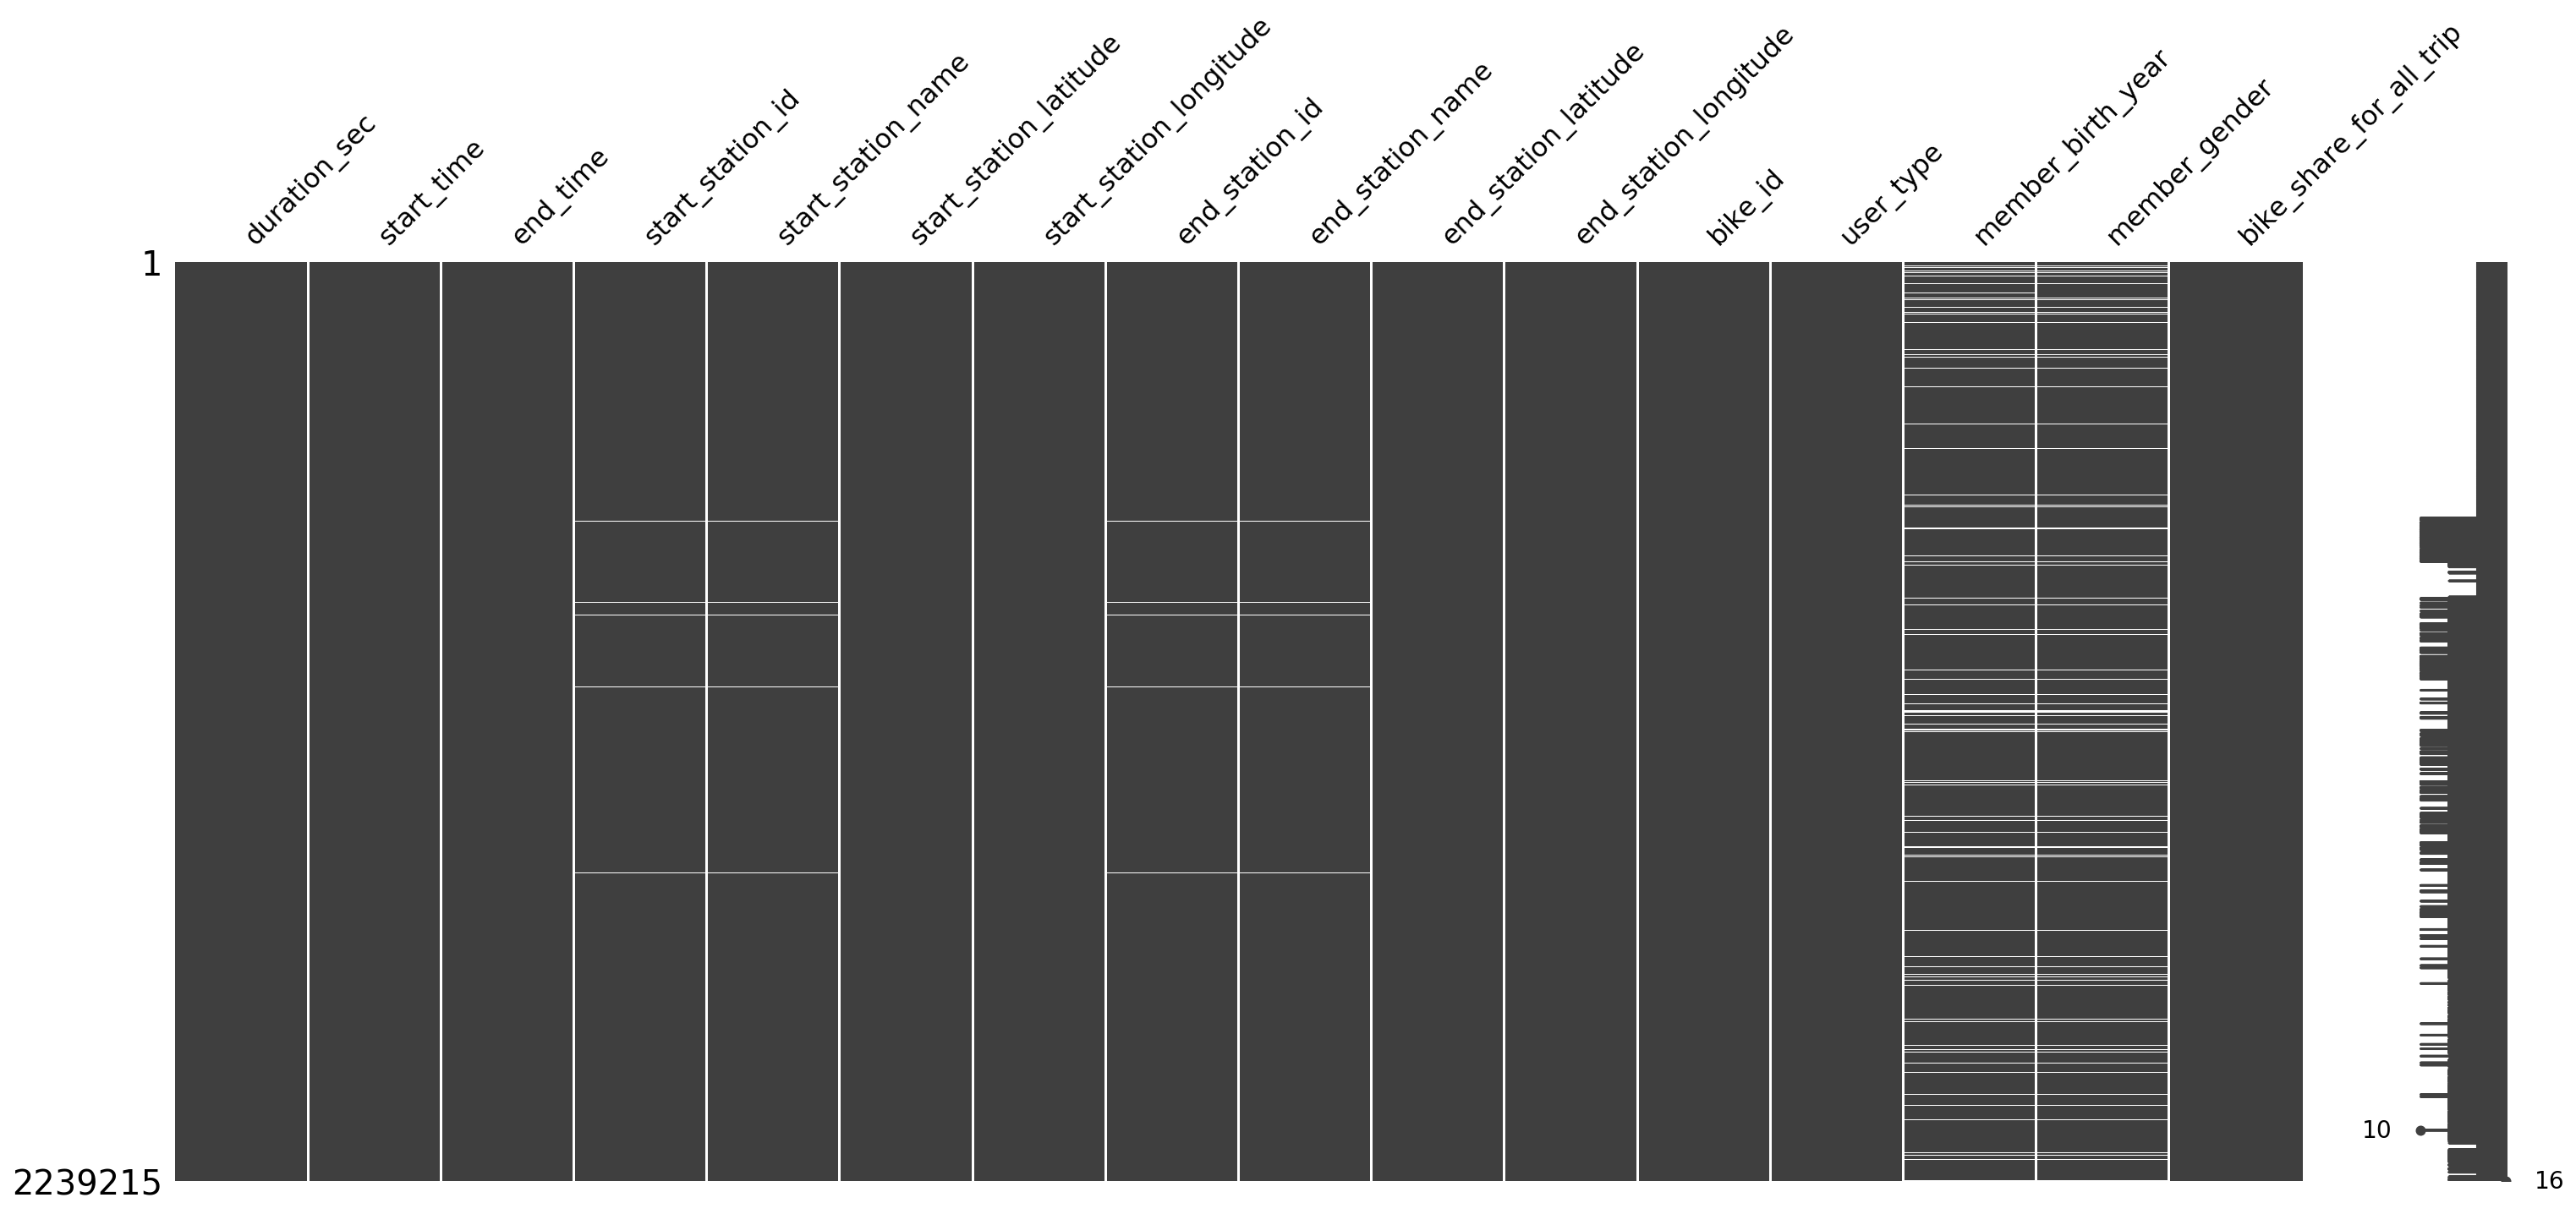

In [5]:
ms.matrix(df);

In [6]:
df[df.start_station_id.isnull()].head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
623364,5572,2018-06-30 20:58:31.8550,2018-06-30 22:31:24.5930,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4202,Customer,1989.0,Male,No
623376,573,2018-06-30 22:12:27.5110,2018-06-30 22:22:01.1740,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4095,Subscriber,1994.0,Male,Yes
623393,850,2018-06-30 22:01:25.5850,2018-06-30 22:15:36.1510,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.95,4122,Customer,1990.0,Male,No
623429,562,2018-06-30 21:52:05.1180,2018-06-30 22:01:27.4400,NaN,NaN,37.41,-121.94,NaN,NaN,37.42,-121.94,4184,Subscriber,1989.0,Male,No
623456,819,2018-06-30 21:37:34.5060,2018-06-30 21:51:13.7290,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.96,4137,Customer,1985.0,Male,No
623472,1176,2018-06-30 21:23:30.4880,2018-06-30 21:43:07.3310,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.94,4152,Customer,1961.0,Male,No
623479,160,2018-06-30 21:37:50.9260,2018-06-30 21:40:30.9300,NaN,NaN,37.41,-121.94,NaN,NaN,37.42,-121.94,4105,Subscriber,1990.0,Female,No
623548,7242,2018-06-30 19:19:19.5600,2018-06-30 21:20:02.1110,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4082,Customer,1990.0,Male,No
623549,725,2018-06-30 21:06:44.3580,2018-06-30 21:18:50.2180,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.96,4156,Customer,1983.0,Male,No
623550,694,2018-06-30 21:05:49.6180,2018-06-30 21:17:24.2670,NaN,NaN,37.40,-121.93,NaN,NaN,37.41,-121.94,4136,Customer,1987.0,Female,No


In [7]:
df[df.start_station_id.isnull()].tail(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
2211273,984,2019-02-06 08:39:02.6480,2019-02-06 08:55:26.6830,NaN,NaN,37.41,-121.94,NaN,NaN,37.40,-121.92,4249,Subscriber,1976.0,Male,No
2217203,1159,2019-02-05 14:53:30.4310,2019-02-05 15:12:49.4460,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4174,Customer,1986.0,Male,No
2217647,823,2019-02-05 13:28:05.5940,2019-02-05 13:41:49.3090,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.96,4092,Subscriber,1999.0,Male,No
2228284,3791,2019-02-03 14:53:55.9470,2019-02-03 15:57:07.0860,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4174,Subscriber,1977.0,Male,No
2230610,8209,2019-02-02 14:26:59.9650,2019-02-02 16:43:49.5180,NaN,NaN,37.40,-121.93,NaN,NaN,37.41,-121.94,4249,Subscriber,1993.0,Male,Yes
2231957,1447,2019-02-02 12:03:04.5440,2019-02-02 12:27:12.2670,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
2235533,309,2019-02-01 12:59:45.9690,2019-02-01 13:04:55.4260,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
2235773,659,2019-02-01 12:17:37.6750,2019-02-01 12:28:37.0140,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
2235909,2013,2019-02-01 11:33:55.1470,2019-02-01 12:07:28.9400,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No
2237004,312,2019-02-01 09:26:34.8030,2019-02-01 09:31:46.9210,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4208,Subscriber,1987.0,Male,No


In [8]:
df[df.start_station_id.isnull()].start_station_latitude.value_counts()

37.41    5017
37.40    4575
37.42    1233
37.39     843
37.38     412
37.34      37
37.43      23
37.37      17
37.35      17
37.33      17
37.36       8
45.51       4
40.66       3
37.44       3
37.32       2
44.95       2
45.50       2
37.45       1
Name: start_station_latitude, dtype: int64

In [9]:
df[df.start_station_id.isnull()].start_station_longitude.value_counts()

-121.94    4189
-121.93    2915
-121.96    2024
-121.95    1607
-121.92    1278
-121.97      52
-121.91      41
-121.98      33
-121.90      25
-121.89      21
-121.88       8
-73.57        6
-121.87       4
-121.84       3
-74.01        3
-121.86       3
-93.22        2
-121.83       1
-121.99       1
Name: start_station_longitude, dtype: int64

In [10]:
#all ids are a start and end point
start_station_id_list = list(df.start_station_id.drop_duplicates().dropna().astype("int"))
start_station_id_list.sort()

end_station_id_list = list(df.end_station_id.drop_duplicates().dropna().astype("int"))
end_station_id_list.sort()

start_station_id_list == end_station_id_list

True

In [11]:
df_station_names = df[["end_station_id", "end_station_name", "end_station_latitude", "end_station_longitude"]].copy()

df_station_names.rename(columns={"end_station_id": "id", 
                                 "end_station_name": "station_name", 
                                 "end_station_latitude": "station_latitude", 
                                 "end_station_longitude": "station_longitude"}, inplace = True)

df_station_names.drop_duplicates(inplace = True)
df_station_names.dropna(inplace = True)
df_station_names.sort_values("id", inplace = True)
df_station_names.reset_index(inplace = True, drop = True)

In [12]:
df_station_names.id.value_counts()[df_station_names.id.value_counts()>1]

192.0    3
205.0    3
130.0    3
221.0    3
244.0    3
212.0    3
208.0    3
233.0    3
101.0    3
280.0    3
250.0    2
364.0    2
234.0    2
358.0    2
224.0    2
281.0    2
344.0    2
245.0    2
302.0    2
321.0    2
173.0    2
272.0    2
345.0    2
80.0     2
Name: id, dtype: int64

In [116]:
df_station_names = df[["start_station_id", "start_station_name", "start_station_latitude", "start_station_longitude"]].copy()

df_station_names.rename(columns={"start_station_id": "id", 
                                 "start_station_name": "station_name", 
                                 "start_station_latitude": "station_latitude", 
                                 "start_station_longitude": "station_longitude"}, inplace = True)

df_station_names.drop_duplicates(inplace = True)
df_station_names.dropna(inplace = True)
df_station_names.sort_values("id", inplace = True)
df_station_names.reset_index(inplace = True, drop = True)

In [117]:
df_station_names.head()

,id,station_name,station_latitude,station_longitude
0,10,Washington St at Kearny St,37.795393,-122.404770
1,100,Bryant St at 15th St,37.767100,-122.410662
2,101,San Bruno Ave at 16th St,37.766008,-122.405677
3,101,15th St at Potrero Ave,37.767079,-122.407359
4,101,Potrero Ave at 15th St (Temporary Location),37.766629,-122.407706


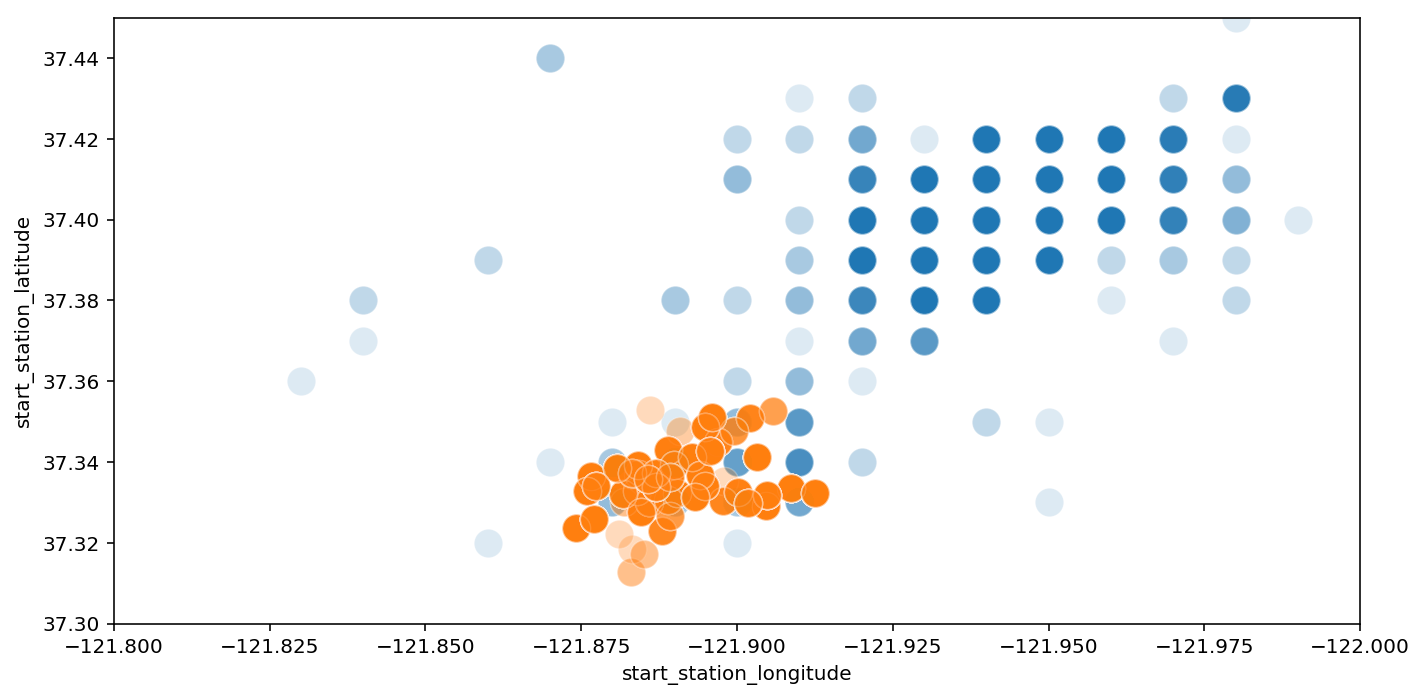

In [18]:
axes, figure = plt.subplots(figsize = (10,5))
sns.scatterplot(data = df[df.start_station_id.isnull()], x = "start_station_longitude", y = "start_station_latitude", alpha = 0.15, s = 200)
sns.scatterplot(data = df.dropna(subset=["start_station_id"]).sample(50000), x = "start_station_longitude", y = "start_station_latitude", alpha = 0.15, s = 200)
plt.xlim(-121.8,-122)
plt.ylim(37.3,37.45)
plt.tight_layout()

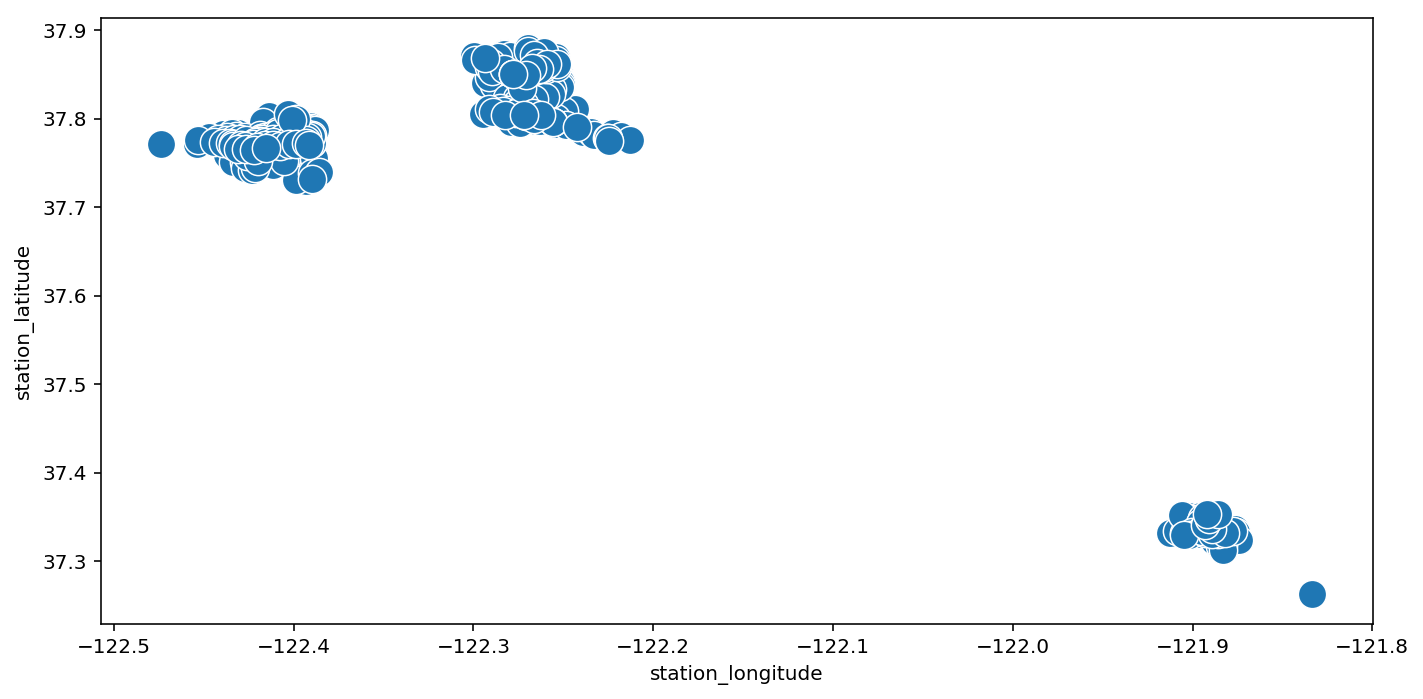

In [119]:
axes, figure = plt.subplots(figsize = (10,5))
#sns.scatterplot(data = df[df.start_station_id.isnull()], x = "start_station_longitude", y = "start_station_latitude", alpha = 0.15, s = 200)
sns.scatterplot(data = df_station_names, x = "station_longitude", y = "station_latitude", s = 200)

plt.tight_layout()

In [19]:
df_station_names.id.value_counts()[df_station_names.id.value_counts()>1]

192.0    3
205.0    3
130.0    3
221.0    3
244.0    3
212.0    3
208.0    3
233.0    3
101.0    3
280.0    3
250.0    2
364.0    2
234.0    2
358.0    2
224.0    2
281.0    2
344.0    2
245.0    2
302.0    2
321.0    2
173.0    2
272.0    2
345.0    2
80.0     2
Name: id, dtype: int64

In [20]:
df_station_names[df_station_names.duplicated("id", keep = False)]

,id,station_name,station_latitude,station_longitude
70,80.0,Townsend St at 5th St,37.775306,-122.397380
71,80.0,Townsend St at 5th St,37.775235,-122.397437
89,101.0,Potrero Ave at 15th St (Temporary Location),37.766629,-122.407706
90,101.0,San Bruno Ave at 16th St,37.766008,-122.405677
91,101.0,15th St at Potrero Ave,37.767079,-122.407359
116,130.0,22nd St Caltrain Station,37.757288,-122.392051
117,130.0,22nd St Caltrain Station,37.757369,-122.392057
118,130.0,22nd St Caltrain Station,37.757718,-122.391813
157,173.0,Shattuck Ave at 55th Ave,37.840364,-122.264488
158,173.0,Shattuck Ave at 55th St,37.840364,-122.264488


In [21]:
df_station_names.drop_duplicates(subset = ["id", "station_latitude", "station_longitude"]).id.value_counts().head(25) #excludes 4 cases

192.0    3
280.0    3
130.0    3
244.0    3
212.0    3
208.0    3
101.0    3
302.0    2
345.0    2
234.0    2
358.0    2
224.0    2
221.0    2
344.0    2
245.0    2
250.0    2
364.0    2
205.0    2
233.0    2
80.0     2
116.0    1
112.0    1
106.0    1
136.0    1
134.0    1
Name: id, dtype: int64

In [22]:
df_consistency = df[["end_station_id", "end_station_name", "end_station_latitude", "end_station_longitude"]].copy().merge(df_station_names, left_on = "end_station_id", right_on = "id", how = "outer")

df_consistency_issues = df_consistency.drop_duplicates().dropna()

In [23]:
df_stat_dist = df_consistency_issues[(df_consistency_issues.end_station_latitude != df_consistency_issues.station_latitude) & \
                                     (df_consistency_issues.end_station_longitude != df_consistency_issues.station_longitude)].copy()

In [24]:
#https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude/43211266#43211266

def calculate_coord_dist(col):
    coords_1 = (col[0], col[1])
    coords_2 = (col[2], col[3])
    
    return geopy.distance.distance(coords_1, coords_2).m

In [25]:
df_stat_dist["dist_in_m"] = df_stat_dist[["end_station_latitude", "end_station_longitude", "station_latitude", "station_longitude"]].apply(calculate_coord_dist, axis = 1)

In [26]:
df_stat_dist_data = df_stat_dist.drop_duplicates("dist_in_m").sort_values("dist_in_m", ascending = False)
df_stat_dist_data

,end_station_id,end_station_name,end_station_latitude,end_station_longitude,id,station_name,station_latitude,station_longitude,dist_in_m
2225145,302.0,Tamien Station,37.312854,-121.882941,302.0,Tamien Station,37.347721,-121.890856,3932.749001
2089615,208.0,S. 4th St at San Carlos St,37.332836,-121.883912,208.0,William St at 4th St (Temporary Location),37.329964,-121.881922,364.265416
2089614,208.0,S. 4th St at San Carlos St,37.332836,-121.883912,208.0,S. 4th St at San Carlos St,37.330040,-121.881821,361.415563
2064740,192.0,MLK Jr Way at 36th St (Temporary Location),37.825794,-122.269399,192.0,37th St at West St,37.826696,-122.271797,233.626394
2062975,192.0,37th St at West St,37.826696,-122.271795,192.0,MLK Jr Way at 36th St (Temporary Location),37.825794,-122.269399,233.531415
2114530,101.0,San Bruno Ave at 16th St,37.766008,-122.405677,101.0,Potrero Ave at 15th St (Temporary Location),37.766629,-122.407706,191.626231
2114532,101.0,San Bruno Ave at 16th St,37.766008,-122.405677,101.0,15th St at Potrero Ave,37.767079,-122.407359,189.950934
742449,205.0,Shafter Ave at Cavour St,37.837947,-122.257243,205.0,Miles Ave at Cavour St,37.838800,-122.258732,161.715577
1519216,212.0,Webster St at MacArthur Blvd (Temporary Location),37.825008,-122.261649,212.0,Mosswood Park,37.824893,-122.260437,107.512094
1510980,212.0,Mosswood Park,37.824931,-122.260479,212.0,Webster St at MacArthur Blvd (Temporary Location),37.825008,-122.261649,103.387088


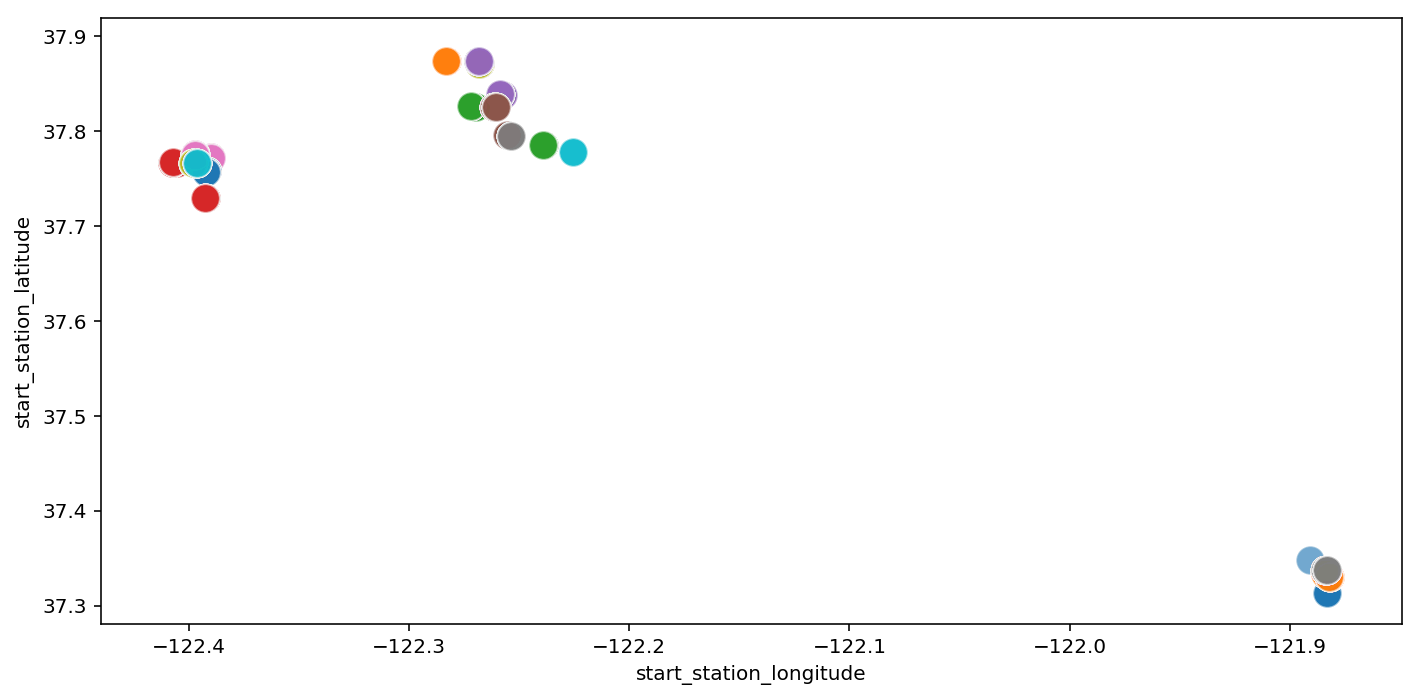

In [27]:
id_list = list(df_stat_dist_data.id.drop_duplicates())
fig, axes = plt.subplots(figsize = (10,5))

for id_ in id_list:
    sns.scatterplot(data = df.query(f"start_station_id == {id_}"), x = "start_station_longitude", y = "start_station_latitude", alpha = 0.15, s = 200)
        
plt.tight_layout()


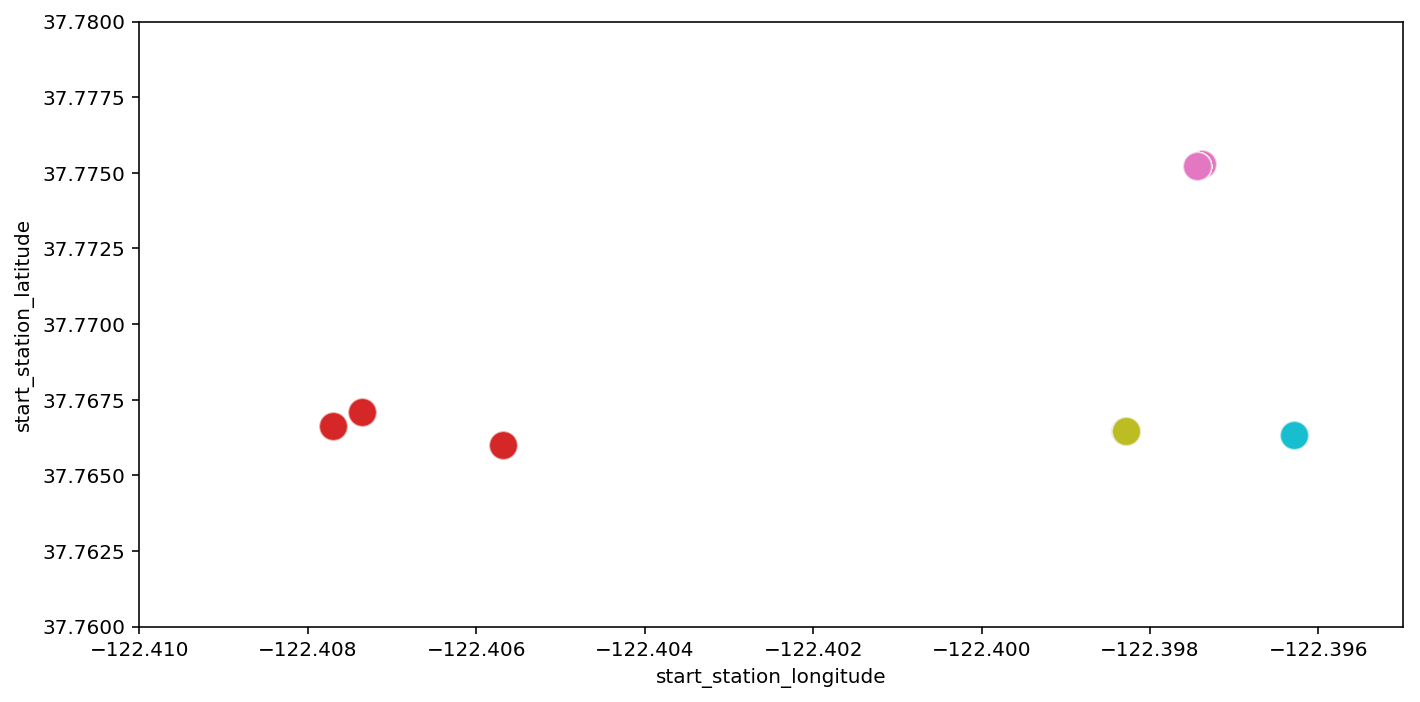

In [28]:
id_list = list(df_stat_dist_data.id.drop_duplicates())
fig, axes = plt.subplots(figsize = (10,5))

for id_ in id_list:
    sns.scatterplot(data = df.query(f"start_station_id == {id_}"), x = "start_station_longitude", y = "start_station_latitude", alpha = 0.15, s = 200)

plt.xlim(-122.41,-122.395)
plt.ylim(37.76,37.78)
plt.tight_layout()

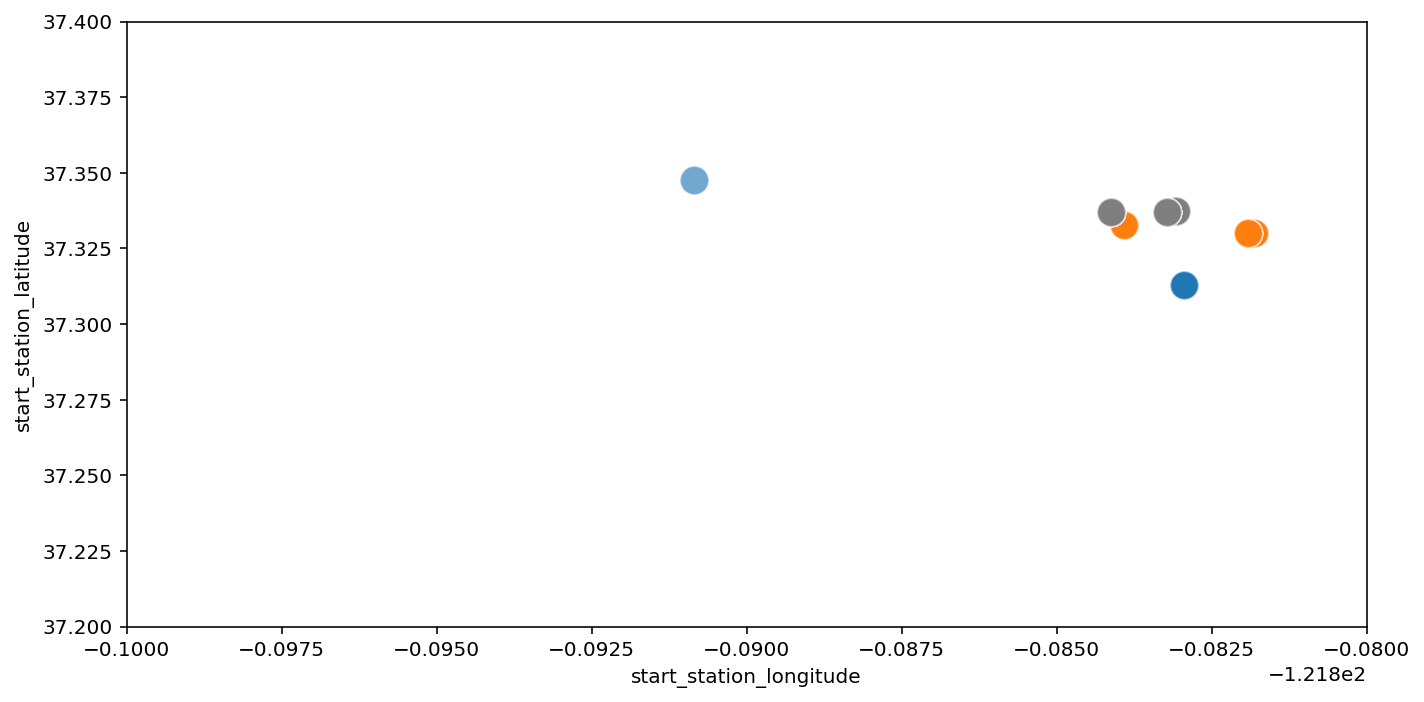

In [29]:
id_list = list(df_stat_dist_data.id.drop_duplicates())
fig, axes = plt.subplots(figsize = (10,5))

for id_ in id_list:
    sns.scatterplot(data = df.query(f"start_station_id == {id_}"), x = "start_station_longitude", y = "start_station_latitude", alpha = 0.15, s = 200)

plt.xlim(-121.9, -121.88)
plt.ylim(37.2,37.4)
plt.tight_layout()

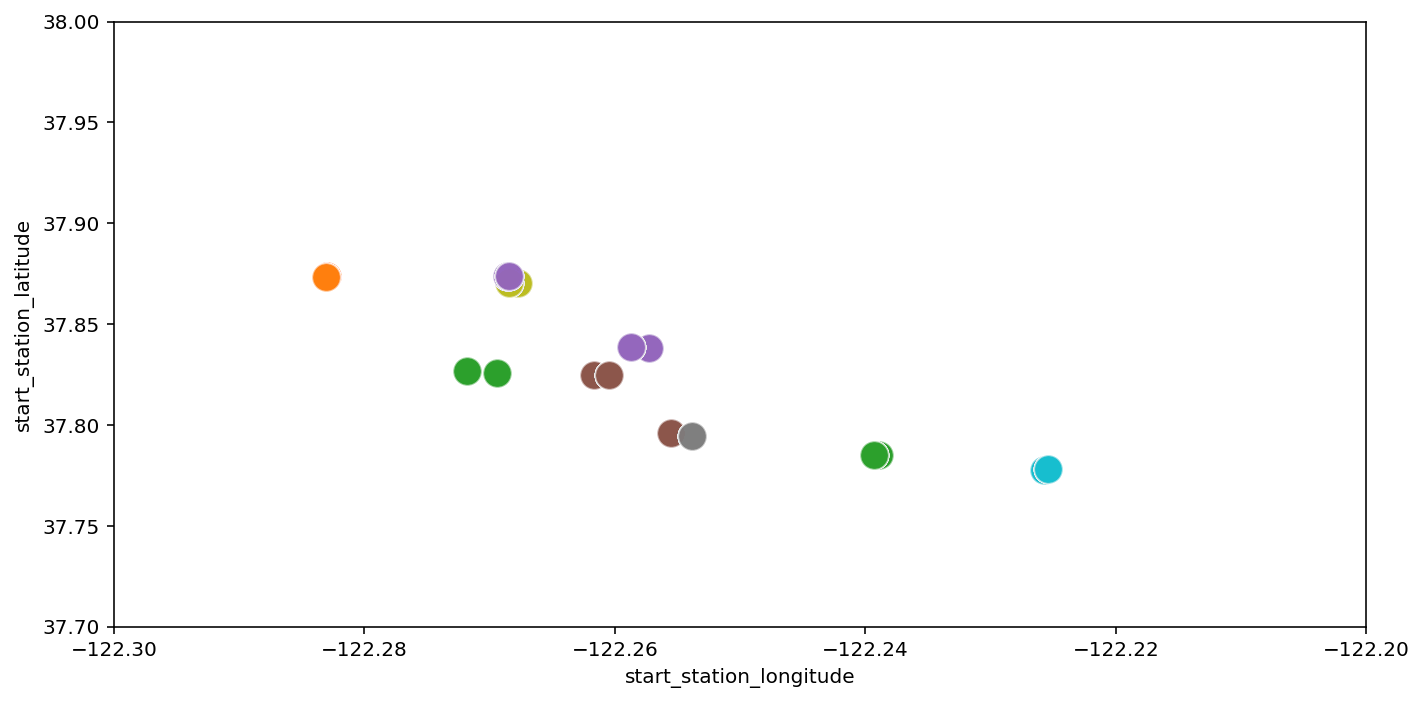

In [30]:
id_list = list(df_stat_dist_data.id.drop_duplicates())
fig, axes = plt.subplots(figsize = (10,5))

for id_ in id_list:
    sns.scatterplot(data = df.query(f"start_station_id == {id_}"), x = "start_station_longitude", y = "start_station_latitude", alpha = 0.15, s = 200)

plt.xlim(-122.3,-122.2)
plt.ylim(37.7,38)
plt.tight_layout()

In [31]:
df.describe().round(0)

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,2239215.0,2226999.0,2239215.0,2239215.0,2226999.0,2239215.0,2239215.0,2239215.0,2110512.0
mean,837.0,122.0,38.0,-122.0,121.0,38.0,-122.0,2624.0,1983.0
std,2276.0,102.0,0.0,0.0,102.0,0.0,0.0,1535.0,10.0
min,61.0,3.0,37.0,-122.0,3.0,37.0,-122.0,11.0,1878.0
25%,346.0,36.0,38.0,-122.0,30.0,38.0,-122.0,1378.0,1978.0
50%,550.0,90.0,38.0,-122.0,89.0,38.0,-122.0,2613.0,1986.0
75%,861.0,193.0,38.0,-122.0,191.0,38.0,-122.0,3676.0,1991.0
max,86366.0,398.0,46.0,-74.0,398.0,46.0,-74.0,6645.0,2001.0


In [32]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [33]:
df.query("duration_sec == 86366") #nearly 24 hrs

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
187716,86366,2018-02-03 17:32:04.0420,2018-02-04 17:31:30.7880,197.0,El Embarcadero at Grand Ave,37.808848,-122.24968,197.0,El Embarcadero at Grand Ave,37.808848,-122.24968,1486,Customer,NaN,NaN,No


In [34]:
df[df.member_birth_year.isnull()].head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
5,6477,2018-01-31 22:58:44.8670,2018-02-01 00:46:41.9080,236.0,Market St at 8th St,37.803686,-122.282497,160.0,West Oakland BART Station,37.805318,-122.294837,1306,Customer,NaN,NaN,No
10,1316,2018-01-31 23:24:00.4160,2018-01-31 23:45:56.8240,98.0,Valencia St at 16th St,37.765052,-122.421866,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,1278,Customer,NaN,NaN,No
18,350,2018-01-31 23:13:45.5290,2018-01-31 23:19:36.2650,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,274.0,Oregon St at Adeline St,37.857567,-122.267558,431,Subscriber,NaN,NaN,No


<a id='assessingsum'></a>
### Assessing Summary

#### Quality
##### df table
- there are missing values in the station_id, station_name, member_birth_year and member_gender columns
- the columns 'start_time' and 'end_time' are not datetime type
- the columns 'start_station_id', 'end_station_id', 'member_birth_year' and 'bike_id' are not object type
- some stations share the same ID while they changed the position over time (consistency problem)


#### Tidiness
##### df table
- None

<a id='cleaning'></a>
## Data Cleaning

### Issue #1
> #### Define #1
>- there are missing values in the station_id, station_name, member_birth_year and member_gender columns

> #### Clean #1

In [35]:
#there are multiple ways how to handle this - we could cluster them and give them a newly generated station id .. but they are not precise, so we will drop them

df.dropna(subset = ["start_station_id"], inplace = True)

In [211]:
#for the other two columns the user can freely decide if they want it or not, so we will fill the na with 0 and the member gender to a string
df.member_birth_year.fillna(0, inplace = True)
df.member_gender.fillna("not defined", inplace = True)


> #### Test #1

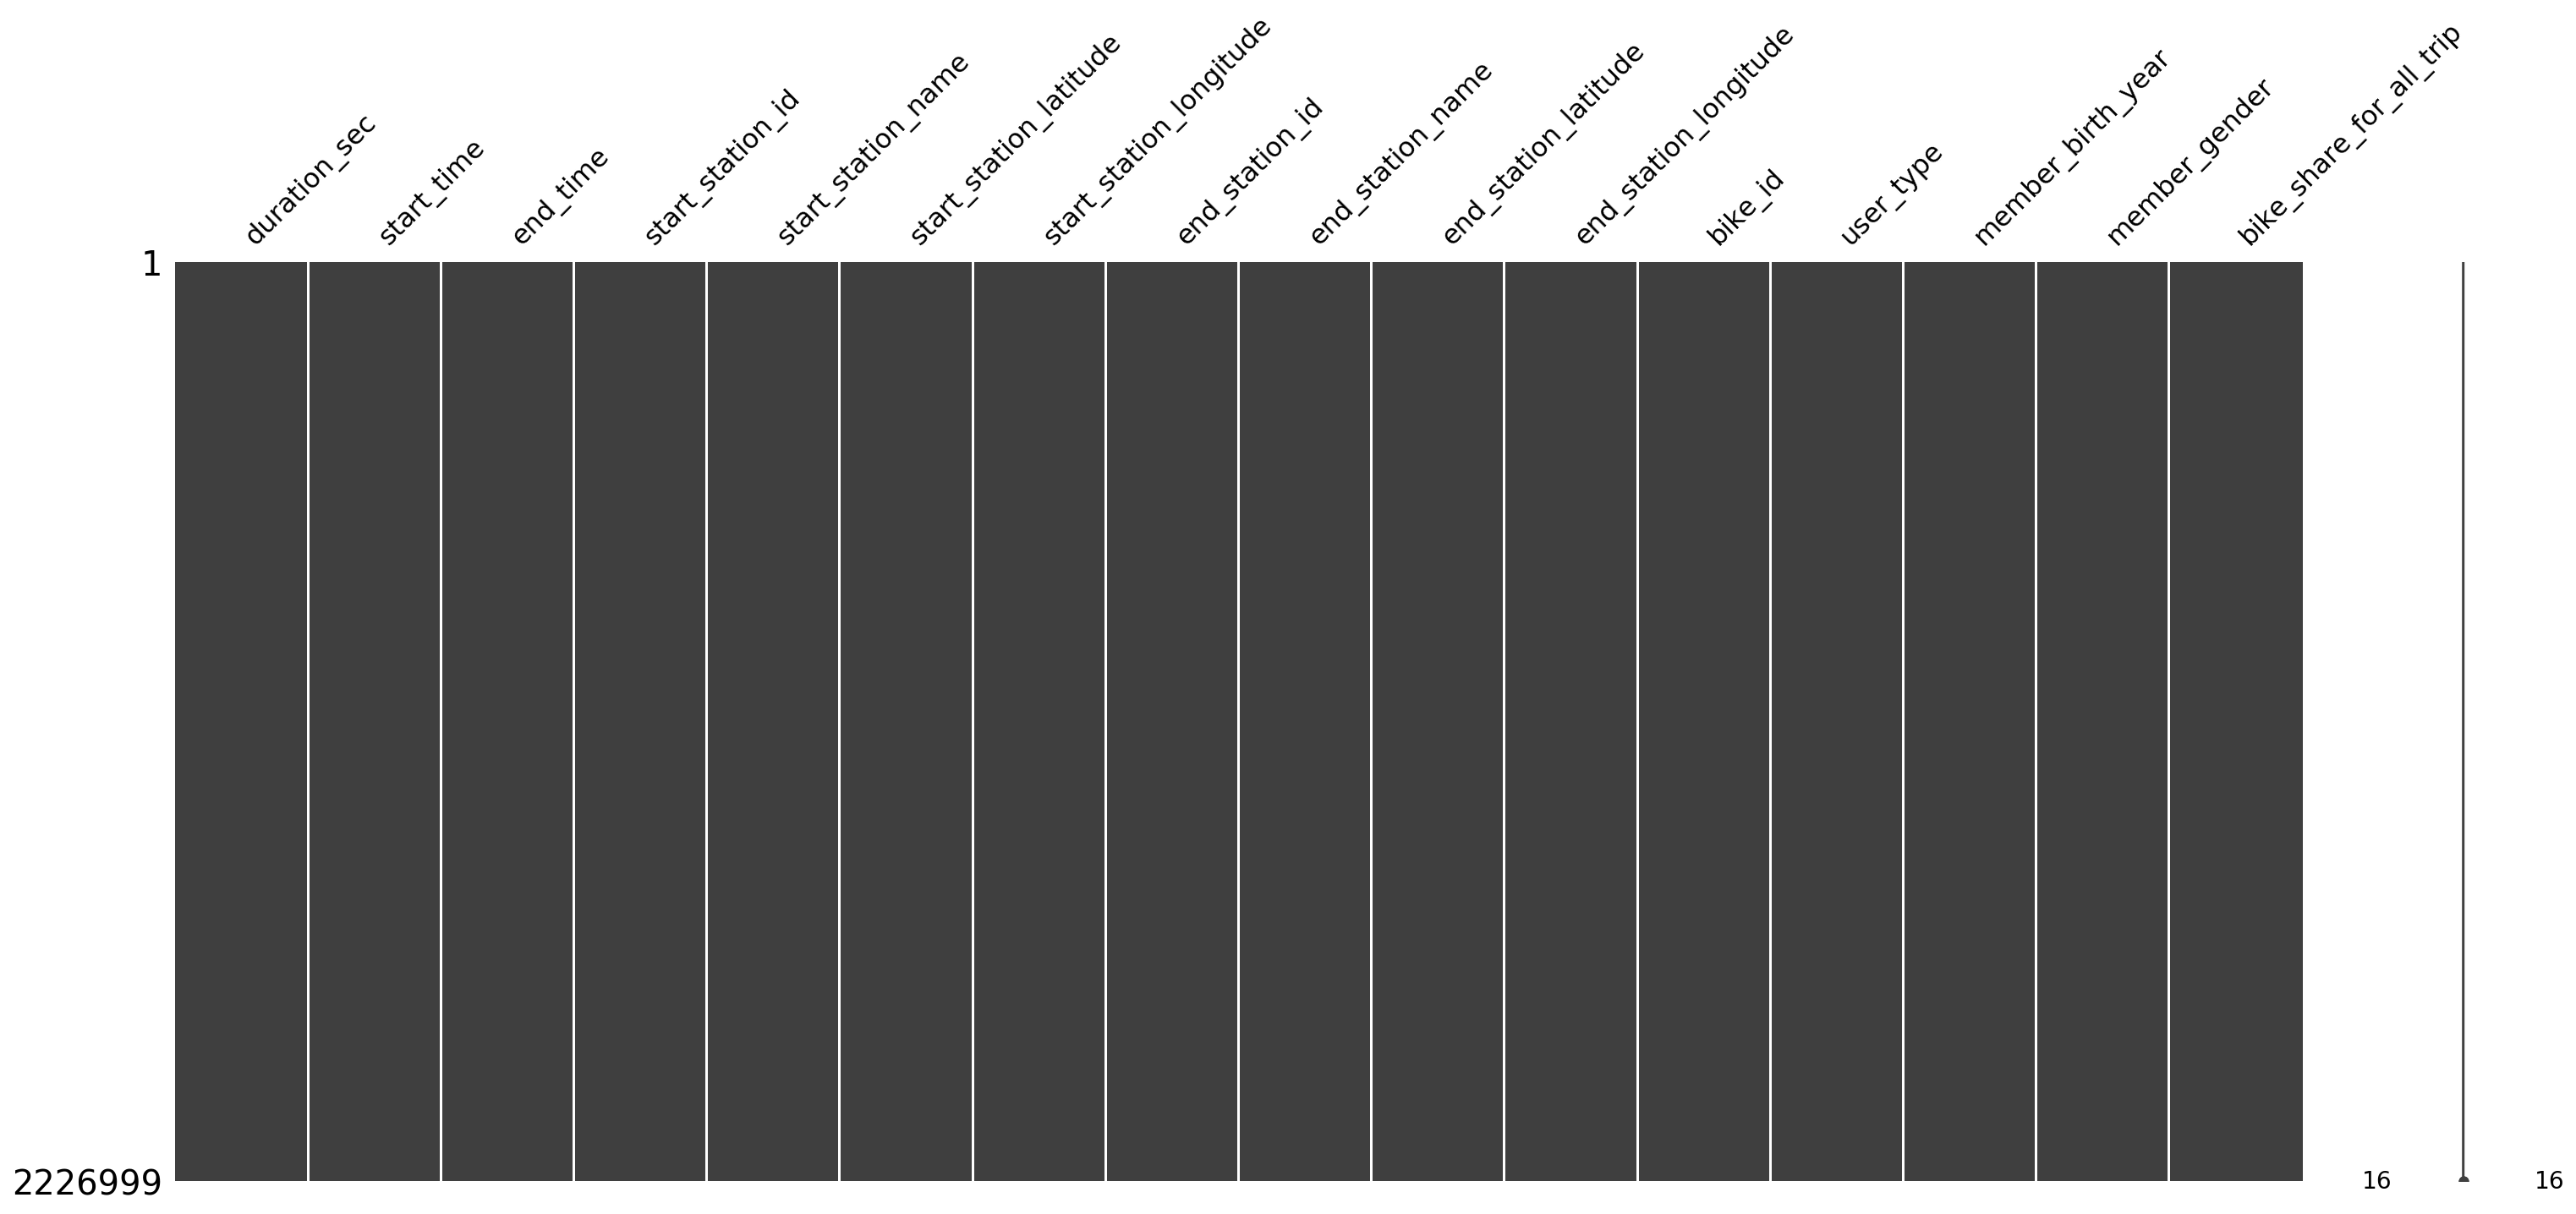

In [37]:
ms.matrix(df)

### Issue #2
> #### Define #2
>- the columns 'start_time' and 'end_time' are not datetime type
>- the columns 'start_station_id', 'end_station_id', 'member_birth_year' and 'bike_id' are not object type

> #### Clean #2

In [38]:
for col in ["start_time", "end_time"]:
    df[col] = pd.to_datetime(df[col])
    
for col in ["start_station_id", "end_station_id"]:
    df[col] = df[col].astype("int")

for col in ["start_station_id", "end_station_id", "member_birth_year", "bike_id"]:
    df[col] = df[col].astype("str")

> #### Test #2

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2226999 entries, 0 to 2239214
Data columns (total 16 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  object
member_birth_year          object
member_gender              object
bike_share_for_all_trip    object
dtypes: datetime64[ns](2), float64(4), int64(1), object(9)
memory usage: 288.8+ MB


### Issue #3
> #### Define #3
>- some stations share the same ID while they changed the position over time (consistency problem)

> #### Clean #3

In [40]:
df_stat_dist_data

,end_station_id,end_station_name,end_station_latitude,end_station_longitude,id,station_name,station_latitude,station_longitude,dist_in_m
2225145,302.0,Tamien Station,37.312854,-121.882941,302.0,Tamien Station,37.347721,-121.890856,3932.749001
2089615,208.0,S. 4th St at San Carlos St,37.332836,-121.883912,208.0,William St at 4th St (Temporary Location),37.329964,-121.881922,364.265416
2089614,208.0,S. 4th St at San Carlos St,37.332836,-121.883912,208.0,S. 4th St at San Carlos St,37.330040,-121.881821,361.415563
2064740,192.0,MLK Jr Way at 36th St (Temporary Location),37.825794,-122.269399,192.0,37th St at West St,37.826696,-122.271797,233.626394
2062975,192.0,37th St at West St,37.826696,-122.271795,192.0,MLK Jr Way at 36th St (Temporary Location),37.825794,-122.269399,233.531415
2114530,101.0,San Bruno Ave at 16th St,37.766008,-122.405677,101.0,Potrero Ave at 15th St (Temporary Location),37.766629,-122.407706,191.626231
2114532,101.0,San Bruno Ave at 16th St,37.766008,-122.405677,101.0,15th St at Potrero Ave,37.767079,-122.407359,189.950934
742449,205.0,Shafter Ave at Cavour St,37.837947,-122.257243,205.0,Miles Ave at Cavour St,37.838800,-122.258732,161.715577
1519216,212.0,Webster St at MacArthur Blvd (Temporary Location),37.825008,-122.261649,212.0,Mosswood Park,37.824893,-122.260437,107.512094
1510980,212.0,Mosswood Park,37.824931,-122.260479,212.0,Webster St at MacArthur Blvd (Temporary Location),37.825008,-122.261649,103.387088


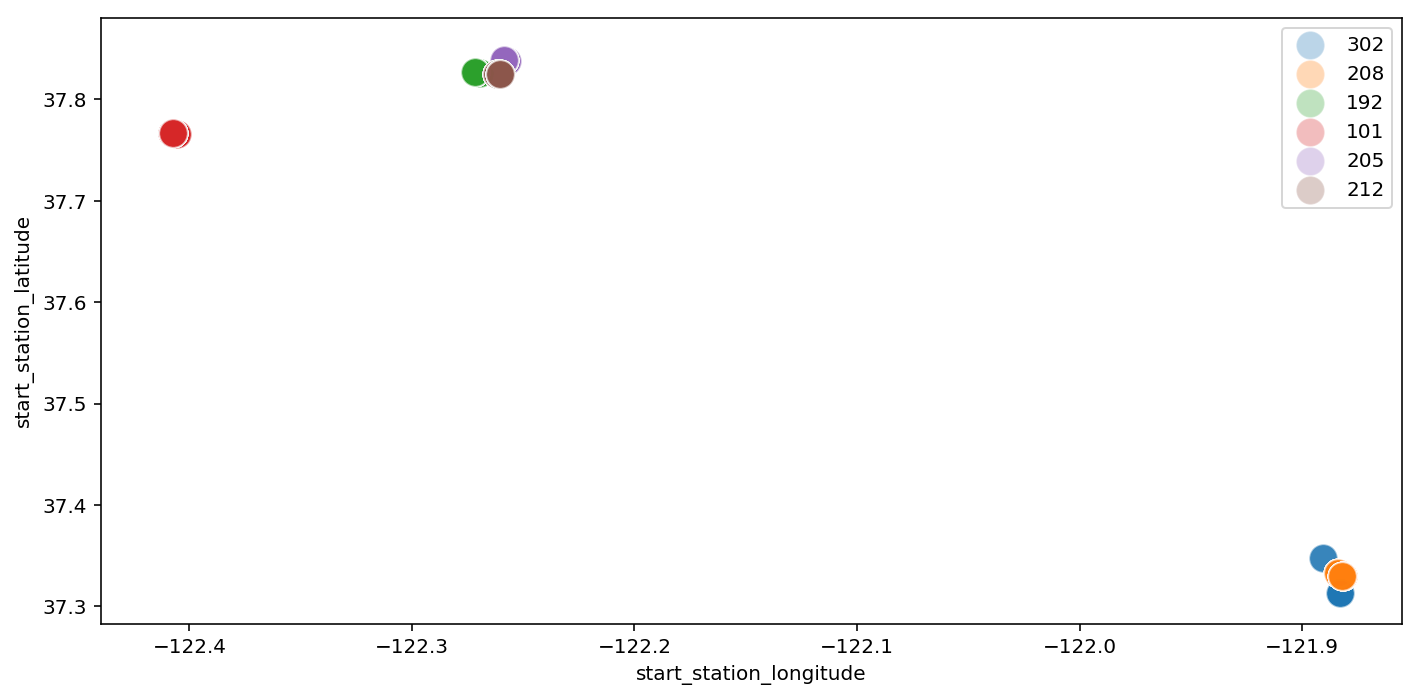

In [41]:
fig, axes = plt.subplots(figsize = (10,5))

for id_ in [302,208,192,101,205,212]:
    sns.scatterplot(data = df.query(f"start_station_id == '{id_}'"), x = "start_station_longitude", y = "start_station_latitude", alpha = 0.30, s = 200, label = id_)

plt.tight_layout()

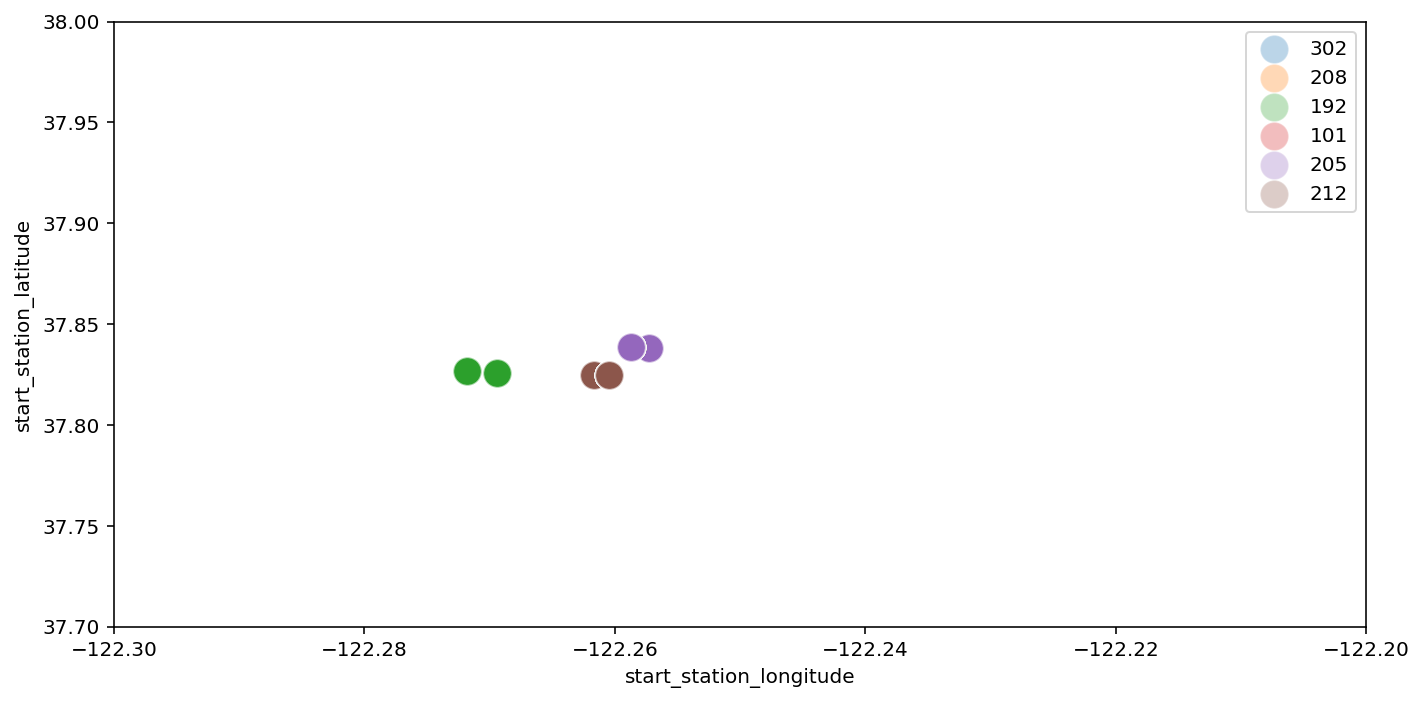

In [42]:
fig, axes = plt.subplots(figsize = (10,5))

for id_ in [302,208,192,101,205,212]:
    sns.scatterplot(data = df.query(f"start_station_id == '{id_}'"), x = "start_station_longitude", y = "start_station_latitude", alpha = 0.30, s = 200, label = id_)

plt.xlim(-122.3,-122.2)
plt.ylim(37.7,38)

plt.tight_layout()

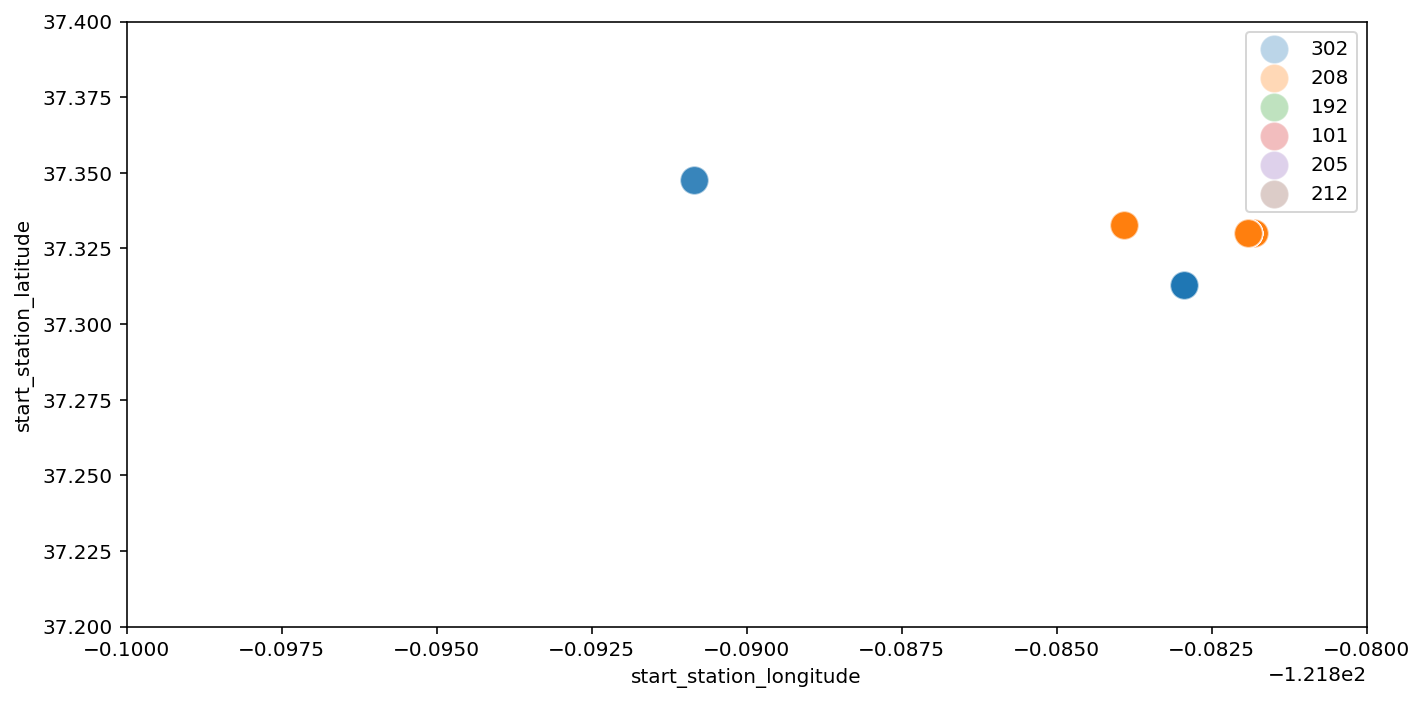

In [43]:
fig, axes = plt.subplots(figsize = (10,5))

for id_ in [302,208,192,101,205,212]:
    sns.scatterplot(data = df.query(f"start_station_id == '{id_}'"), x = "start_station_longitude", y = "start_station_latitude", alpha = 0.30, s = 200, label = id_)

plt.xlim(-121.9, -121.88)
plt.ylim(37.2,37.4)

plt.tight_layout()



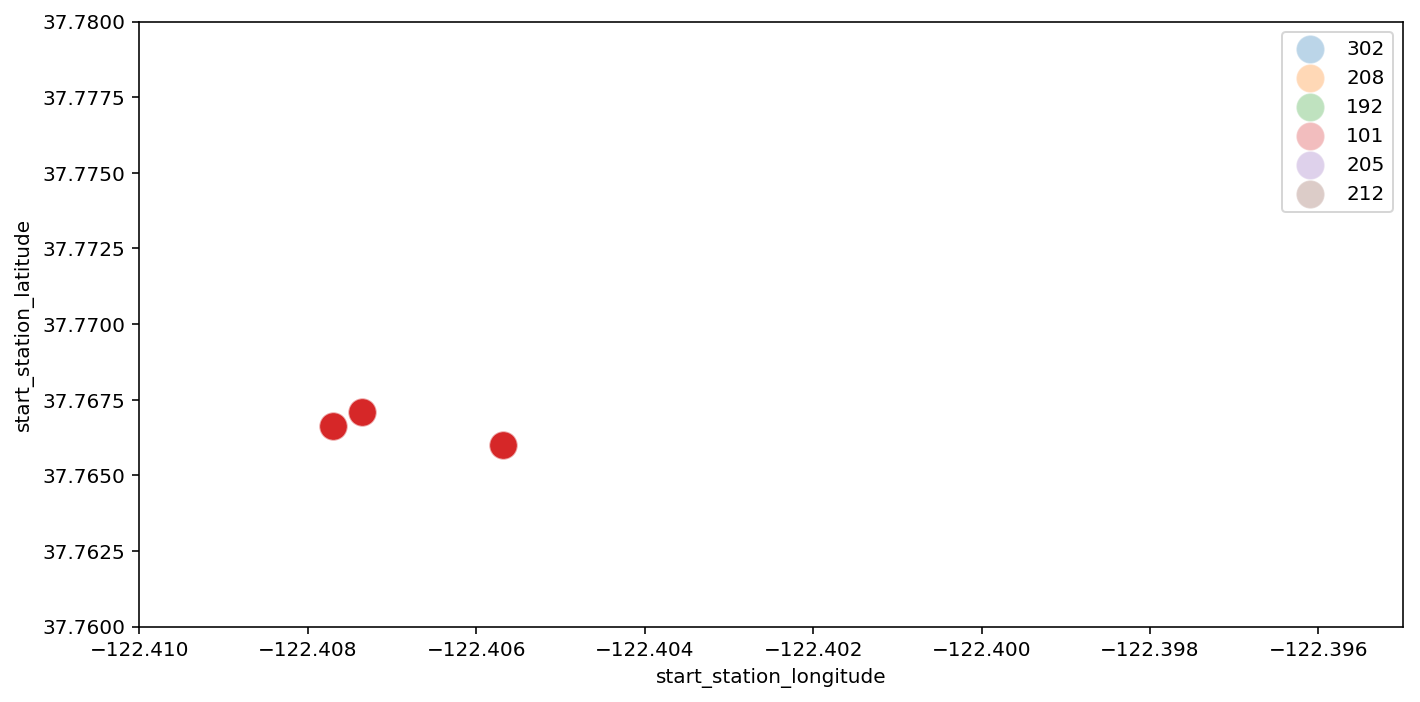

In [44]:
fig, axes = plt.subplots(figsize = (10,5))

for id_ in [302,208,192,101,205,212]:
    sns.scatterplot(data = df.query(f"start_station_id == '{id_}'"), x = "start_station_longitude", y = "start_station_latitude", alpha = 0.30, s = 200, label = id_)

plt.xlim(-122.41,-122.395)
plt.ylim(37.76,37.78)

plt.tight_layout()


In [ ]:
#since this is about visualization and the plots above are not really taking us anywhere, we will give the stations a separate subindex -
# if they changed, they also got a new name and if not, than the stations were pretty close to or pretty far away from each other, so for consistency we will give each id a new subindex based on their occurence

In [62]:
df.sort_values("start_time", inplace = True)
df.reset_index(inplace = True, drop = True)

In [63]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,13709,2018-01-01 00:01:53.847,2018-01-01 03:50:23.433,86,Market St at Dolores St,37.769305,-122.426826,119,18th St at Noe St,37.761047,-122.432642,2924,Customer,0.0,nan,No
1,145,2018-01-01 00:07:41.040,2018-01-01 00:10:06.241,316,San Salvador St at 1st St,37.330165,-121.885831,311,Paseo De San Antonio at 2nd St,37.333798,-121.886943,2473,Subscriber,1957.0,Male,No
2,714,2018-01-01 00:07:52.943,2018-01-01 00:19:47.075,74,Laguna St at Hayes St,37.776435,-122.426244,70,Central Ave at Fell St,37.773311,-122.444293,2423,Subscriber,1986.0,Male,No
3,1151,2018-01-01 00:09:31.745,2018-01-01 00:28:43.159,97,14th St at Mission St,37.768265,-122.420110,125,20th St at Bryant St,37.759200,-122.409851,3455,Subscriber,1992.0,Male,No
4,1359,2018-01-01 00:14:37.187,2018-01-01 00:37:16.445,11,Davis St at Jackson St,37.797280,-122.398436,323,Broadway at Kearny,37.798014,-122.405950,2173,Customer,1995.0,Male,No


In [153]:
def get_new_id(col):
    
    if col[0] not in id_data:
        id_data[col[0]] = [col[1], col[2], col[3], f"{col[0]}_0"]
        return id_data[col[0]][3]
    
    elif col[0] in id_data:
        if col[1] != id_data[col[0]][0]:
            new_ind = str(col[0]) + "_" + str(int(id_data[col[0]][3][-1])+1)
            id_data[col[0]][3] = new_ind
            id_data[col[0]][0] = col[1]
            return new_ind
        else:
            if id_data[col[0]][1] != col[2] or id_data[col[0]][2] != col[3]:
                coords_1 = (id_data[col[0]][1], id_data[col[0]][2])
                coords_2 = (col[2], col[3])
                
                if geopy.distance.distance(coords_1, coords_2).m > 100:
                    new_ind = str(col[0]) + "_" + str(int(id_data[col[0]][3][-1])+1)
                    id_data[col[0]][3] = new_ind
                    id_data[col[0]][1] = col[2]
                    id_data[col[0]][2] = col[3]
                  
                    return new_ind
                else:
                    return id_data[col[0]][3]
                
            else:
                return id_data[col[0]][3]
            
    else:
        return "Error"   

In [105]:
id_data = {}
df["start_station_id_new"] = df[["start_station_id", "start_station_name", "start_station_latitude", "start_station_longitude"]].apply(get_new_id, axis = 1)

In [106]:
id_data = {}
df["end_station_id_new"] = df[["end_station_id", "end_station_name", "end_station_latitude", "end_station_longitude"]].apply(get_new_id, axis = 1)

In [156]:
df_station_names.head()

,id,station_name,station_latitude,station_longitude,new_id
0,10,Washington St at Kearny St,37.795393,-122.404770,10_0
1,100,Bryant St at 15th St,37.767100,-122.410662,100_0
2,101,San Bruno Ave at 16th St,37.766008,-122.405677,101_0
3,101,15th St at Potrero Ave,37.767079,-122.407359,101_1
4,101,Potrero Ave at 15th St (Temporary Location),37.766629,-122.407706,101_2


In [155]:
id_data = {}
df_station_names["new_id"] = df_station_names[["id", "station_name", "station_latitude", "station_longitude"]].apply(get_new_id, axis = 1)

> #### Test #3

In [104]:
df.query("start_station_id == '208'").drop_duplicates("start_station_id_new")[["start_station_id", "start_station_name", "start_station_latitude", "start_station_longitude", "start_station_id_new"]]

,start_station_id,start_station_name,start_station_latitude,start_station_longitude,start_station_id_new
556,208,S. 4th St at San Carlos St,37.332836,-121.883912,208_0
817544,208,S. 4th St at San Carlos St,37.330040,-121.881821,208_1
1023793,208,William St at 4th St (Temporary Location),37.329964,-121.881922,208_2


In [107]:
df.query("end_station_id == '208'").drop_duplicates("end_station_id_new")[["end_station_id", "end_station_name", "end_station_latitude", "end_station_longitude", "end_station_id_new"]]

,end_station_id,end_station_name,end_station_latitude,end_station_longitude,end_station_id_new
478,208,S. 4th St at San Carlos St,37.332836,-121.883912,208_0
817103,208,S. 4th St at San Carlos St,37.330040,-121.881821,208_1
1016828,208,William St at 4th St (Temporary Location),37.329964,-121.881922,208_2


In [121]:
df_station_names = df[["start_station_id", "start_station_name", "start_station_latitude", "start_station_longitude"]].copy()

df_station_names.rename(columns={"start_station_id": "id", 
                                 "start_station_name": "station_name", 
                                 "start_station_latitude": "station_latitude", 
                                 "start_station_longitude": "station_longitude"}, inplace = True)

df_station_names.drop_duplicates(inplace = True)
df_station_names.dropna(inplace = True)
df_station_names.sort_values("id", inplace = True)
df_station_names.reset_index(inplace = True, drop = True)



In [157]:
df_station_names.to_csv("df_station_names.csv", index = False)
df.to_csv("result_clean.csv", index = False)

<a id='analysis'></a>
## Data Visualization

**Source:** <a href = https://kepler.gl/>kepler.gl</a>

![All Stations](Images/stations_kepler.png)
![Upper Two Cluster](Images/stations_1.png)
![Lower Cluster](Images/stations_2.png)

In [2]:
df = pd.read_csv("result_clean.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226999 entries, 0 to 2226998
Data columns (total 18 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           int64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             int64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
start_station_id_new       object
end_station_id_new         object
dtypes: float64(5), int64(4), object(9)
memory usage: 305.8+ MB


In [3]:
for col in ["start_time", "end_time"]:
    df[col] = pd.to_datetime(df[col])
    
for col in ["member_birth_year"]:
    df[col] = df[col].astype("int")

for col in ["start_station_id", "end_station_id", "member_birth_year", "bike_id"]:
    df[col] = df[col].astype("str")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226999 entries, 0 to 2226998
Data columns (total 18 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  object
member_birth_year          object
member_gender              object
bike_share_for_all_trip    object
start_station_id_new       object
end_station_id_new         object
dtypes: datetime64[ns](2), float64(4), int64(1), object(11)
memory usage: 305.8+ MB


In [6]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_station_id_new,end_station_id_new
0,13709,2018-01-01 00:01:53.847,2018-01-01 03:50:23.433,86,Market St at Dolores St,37.769305,-122.426826,119,18th St at Noe St,37.761047,-122.432642,2924,Customer,0,NaN,No,86_0,119_0
1,145,2018-01-01 00:07:41.040,2018-01-01 00:10:06.241,316,San Salvador St at 1st St,37.330165,-121.885831,311,Paseo De San Antonio at 2nd St,37.333798,-121.886943,2473,Subscriber,1957,Male,No,316_0,311_0
2,714,2018-01-01 00:07:52.943,2018-01-01 00:19:47.075,74,Laguna St at Hayes St,37.776435,-122.426244,70,Central Ave at Fell St,37.773311,-122.444293,2423,Subscriber,1986,Male,No,74_0,70_0
3,1151,2018-01-01 00:09:31.745,2018-01-01 00:28:43.159,97,14th St at Mission St,37.768265,-122.420110,125,20th St at Bryant St,37.759200,-122.409851,3455,Subscriber,1992,Male,No,97_0,125_0
4,1359,2018-01-01 00:14:37.187,2018-01-01 00:37:16.445,11,Davis St at Jackson St,37.797280,-122.398436,323,Broadway at Kearny,37.798014,-122.405950,2173,Customer,1995,Male,No,11_0,323_0


In [158]:
df_station_names = pd.read_csv("df_station_names.csv")

In [159]:
df_station_names.head()

,id,station_name,station_latitude,station_longitude,new_id
0,10,Washington St at Kearny St,37.795393,-122.404770,10_0
1,100,Bryant St at 15th St,37.767100,-122.410662,100_0
2,101,San Bruno Ave at 16th St,37.766008,-122.405677,101_0
3,101,15th St at Potrero Ave,37.767079,-122.407359,101_1
4,101,Potrero Ave at 15th St (Temporary Location),37.766629,-122.407706,101_2


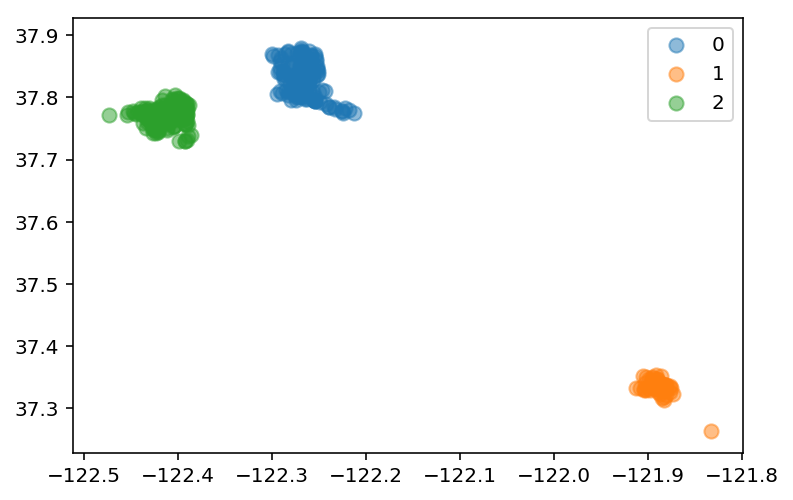

In [160]:
#https://datatofish.com/k-means-clustering-python/

kmeans = KMeans(n_clusters=3).fit(df_station_names[["station_longitude", "station_latitude"]])

df_station_names["label"] = kmeans.labels_

for x in set(list(df_cluster.label)):
    
    df_plot_cluster = df_station_names.query(f"label == {x}")

    plt.scatter(df_plot_cluster['station_longitude'], df_plot_cluster["station_latitude"], s=50, alpha=0.5, label = x);

plt.legend()


In [166]:
df_station_names.label.value_counts()

2    172
0    146
1     56
Name: label, dtype: int64

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226999 entries, 0 to 2226998
Data columns (total 18 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  object
member_birth_year          object
member_gender              object
bike_share_for_all_trip    object
start_station_id_new       object
end_station_id_new         object
dtypes: datetime64[ns](2), float64(4), int64(1), object(11)
memory usage: 305.8+ MB


In [167]:
df = df.merge(df_station_names[["new_id", "label"]], left_on = "start_station_id_new", right_on = "new_id")

In [170]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_station_id_new,end_station_id_new,new_id,label
0,13709,2018-01-01 00:01:53.847,2018-01-01 03:50:23.433,86,Market St at Dolores St,37.769305,-122.426826,119,18th St at Noe St,37.761047,-122.432642,2924,Customer,0,NaN,No,86_0,119_0,86_0,2
1,9996,2018-01-01 04:37:08.115,2018-01-01 07:23:44.143,86,Market St at Dolores St,37.769305,-122.426826,223,16th St Mission BART Station 2,37.764765,-122.420091,2728,Customer,0,NaN,No,86_0,223_0,86_0,2
2,197,2018-01-01 09:29:57.079,2018-01-01 09:33:14.662,86,Market St at Dolores St,37.769305,-122.426826,85,Church St at Duboce Ave,37.770083,-122.429156,2084,Subscriber,1957,Male,No,86_0,85_0,86_0,2
3,183,2018-01-01 11:25:27.634,2018-01-01 11:28:31.059,86,Market St at Dolores St,37.769305,-122.426826,75,Market St at Franklin St,37.773793,-122.421239,24,Subscriber,1987,Male,No,86_0,75_0,86_0,2
4,893,2018-01-01 12:07:39.271,2018-01-01 12:22:32.393,86,Market St at Dolores St,37.769305,-122.426826,42,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,2562,Customer,0,NaN,No,86_0,42_0,86_0,2


<a id='uni'></a>
### Univariate Exploration


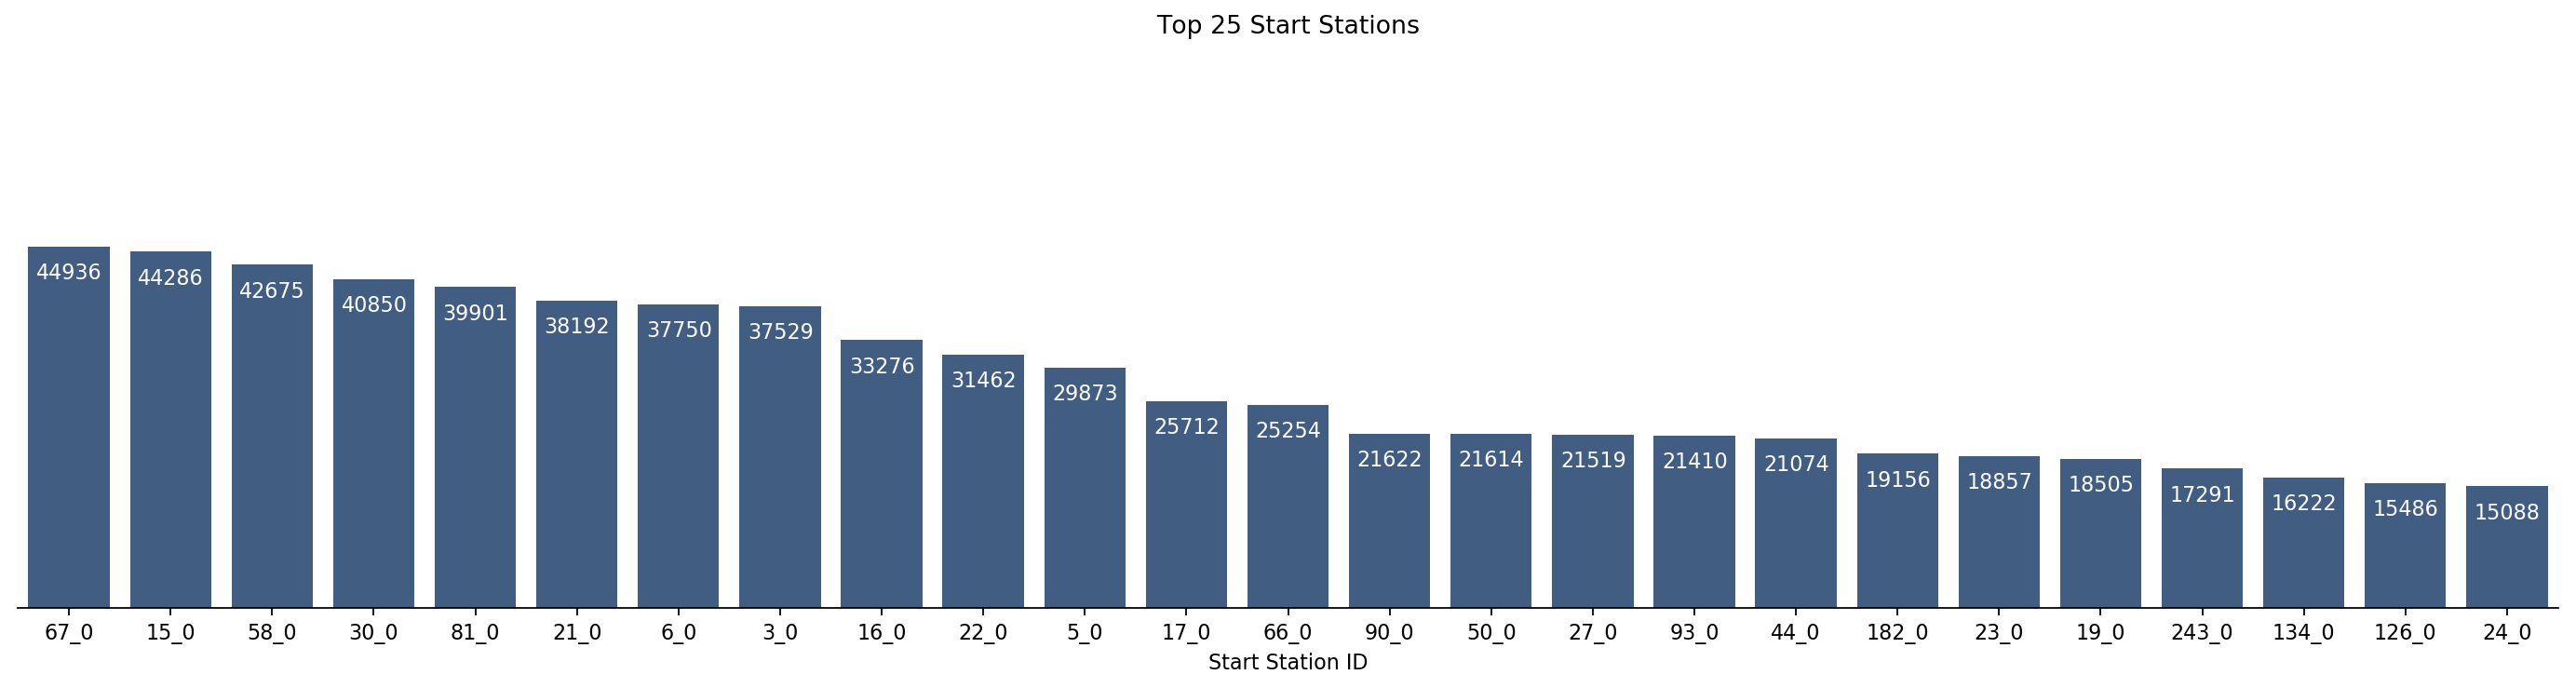

In [7]:
#https://codeyarns.com/2015/06/29/how-to-hide-axis-of-plot-in-matplotlib/

value_ct = df.start_station_id_new.value_counts().iloc[:25]

fig, ax = plt.subplots(figsize = (22,5), dpi = 80)
color = sns.color_palette("viridis")[1]
sns.countplot(x = "start_station_id_new", data = df, order=value_ct.index, color = color);

plt.ylim(0,70000)

cur_axes = plt.gca()
#cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)

sns.despine(fig, left = True)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.08, p.get_height()-4000), color = "white")

plt.title("Top 25 Start Stations");
plt.xlabel("Start Station ID");

In [8]:
for x in value_ct.index:
    print(x + " - " + str(df.query(f"start_station_id_new == '{x}'").start_station_name.drop_duplicates().get_values()))

67_0 - ['San Francisco Caltrain Station 2  (Townsend St at 4th St)']
15_0 - ['San Francisco Ferry Building (Harry Bridges Plaza)']
58_0 - ['Market St at 10th St']
30_0 - ['San Francisco Caltrain (Townsend St at 4th St)']
81_0 - ['Berry St at 4th St']
21_0 - ['Montgomery St BART Station (Market St at 2nd St)']
6_0 - ['The Embarcadero at Sansome St']
3_0 - ['Powell St BART Station (Market St at 4th St)']
16_0 - ['Steuart St at Market St']
22_0 - ['Howard St at Beale St']
5_0 - ['Powell St BART Station (Market St at 5th St)']
17_0 - ['Embarcadero BART Station (Beale St at Market St)']
66_0 - ['3rd St at Townsend St']
90_0 - ['Townsend St at 7th St']
50_0 - ['2nd St at Townsend St']
27_0 - ['Beale St at Harrison St']
93_0 - ['4th St at Mission Bay Blvd S']
44_0 - ['Civic Center/UN Plaza BART Station (Market St at McAllister St)']
182_0 - ['19th Street BART Station']
23_0 - ['The Embarcadero at Steuart St']
19_0 - ['Post St at Kearny St']
243_0 - ['Bancroft Way at College Ave']
134_0 - ['Va

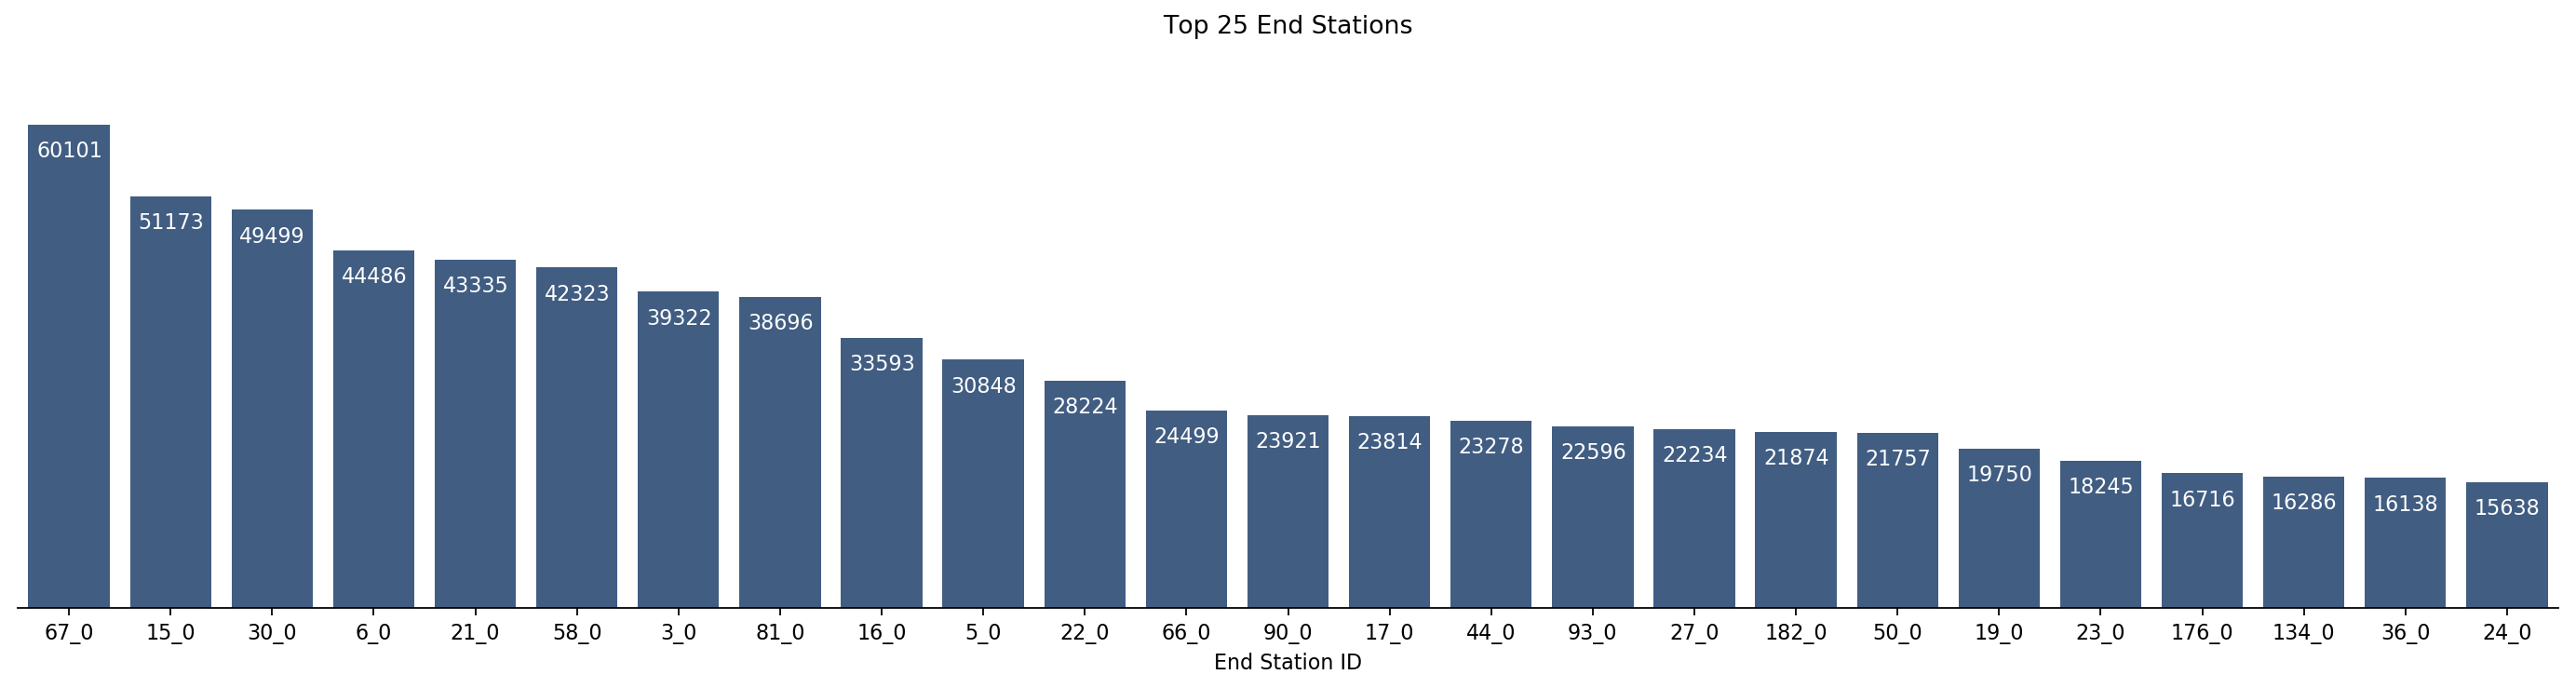

In [308]:
#https://codeyarns.com/2015/06/29/how-to-hide-axis-of-plot-in-matplotlib/

value_ct = df.end_station_id_new.value_counts().iloc[:25]

fig, ax = plt.subplots(figsize = (22,5), dpi = 80)
color = sns.color_palette("viridis")[1]
sns.countplot(x = "end_station_id_new", data = df, order=value_ct.index, color = color);

plt.ylim(0,70000)

cur_axes = plt.gca()
#cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)

sns.despine(fig, left = True)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.08, p.get_height()-4000), color = "white")

plt.title("Top 25 End Stations");
plt.xlabel("End Station ID");

In [10]:
for x in value_ct.index:
    print(x + " - " + str(df.query(f"end_station_id_new == '{x}'").end_station_name.drop_duplicates().get_values()))

67_0 - ['San Francisco Caltrain Station 2  (Townsend St at 4th St)']
15_0 - ['San Francisco Ferry Building (Harry Bridges Plaza)']
30_0 - ['San Francisco Caltrain (Townsend St at 4th St)']
6_0 - ['The Embarcadero at Sansome St']
21_0 - ['Montgomery St BART Station (Market St at 2nd St)']
58_0 - ['Market St at 10th St']
3_0 - ['Powell St BART Station (Market St at 4th St)']
81_0 - ['Berry St at 4th St']
16_0 - ['Steuart St at Market St']
5_0 - ['Powell St BART Station (Market St at 5th St)']
22_0 - ['Howard St at Beale St']
66_0 - ['3rd St at Townsend St']
90_0 - ['Townsend St at 7th St']
17_0 - ['Embarcadero BART Station (Beale St at Market St)']
44_0 - ['Civic Center/UN Plaza BART Station (Market St at McAllister St)']
93_0 - ['4th St at Mission Bay Blvd S']
27_0 - ['Beale St at Harrison St']
182_0 - ['19th Street BART Station']
50_0 - ['2nd St at Townsend St']
19_0 - ['Post St at Kearny St']
23_0 - ['The Embarcadero at Steuart St']
176_0 - ['MacArthur BART Station']
134_0 - ['Valenci

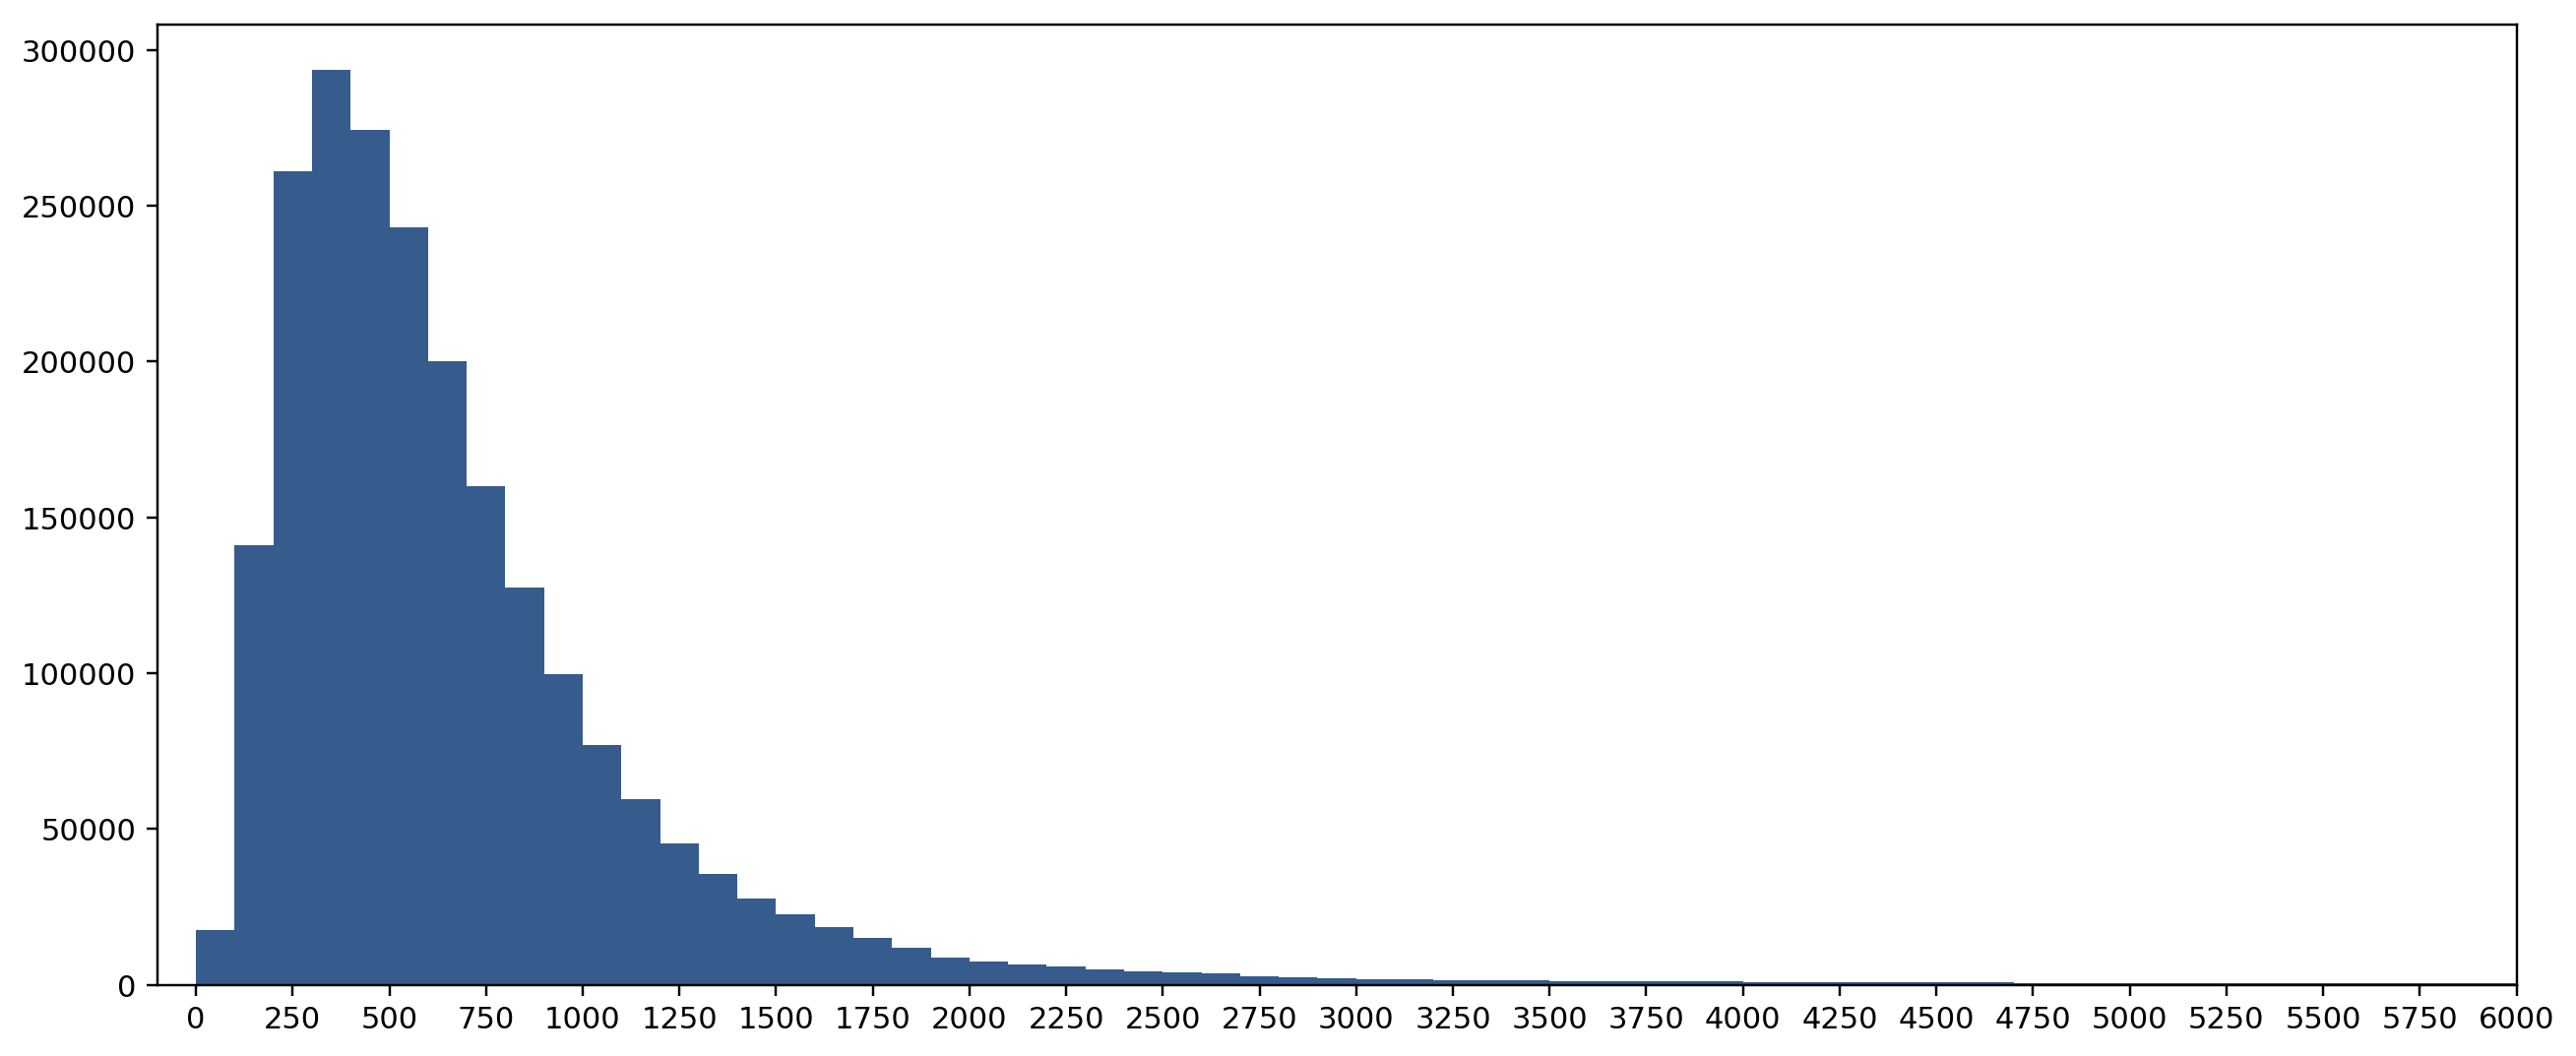

In [309]:
#maybe a customer forgot to log off
bin_size = 100
bins = np.arange(0,df.duration_sec.max()+bin_size,bin_size)

fig, axes = plt.subplots(figsize = (12,5), dpi = 110)

plt.hist(df.duration_sec, bins = bins, color= color);
plt.xticks(ticks = [x for x in range(0,7000,250)])
plt.xlim(-100,6000);
plt.tight_layout()

In [12]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_station_id_new,end_station_id_new
0,13709,2018-01-01 00:01:53.847,2018-01-01 03:50:23.433,86,Market St at Dolores St,37.769305,-122.426826,119,18th St at Noe St,37.761047,-122.432642,2924,Customer,0,NaN,No,86_0,119_0
1,145,2018-01-01 00:07:41.040,2018-01-01 00:10:06.241,316,San Salvador St at 1st St,37.330165,-121.885831,311,Paseo De San Antonio at 2nd St,37.333798,-121.886943,2473,Subscriber,1957,Male,No,316_0,311_0
2,714,2018-01-01 00:07:52.943,2018-01-01 00:19:47.075,74,Laguna St at Hayes St,37.776435,-122.426244,70,Central Ave at Fell St,37.773311,-122.444293,2423,Subscriber,1986,Male,No,74_0,70_0
3,1151,2018-01-01 00:09:31.745,2018-01-01 00:28:43.159,97,14th St at Mission St,37.768265,-122.420110,125,20th St at Bryant St,37.759200,-122.409851,3455,Subscriber,1992,Male,No,97_0,125_0
4,1359,2018-01-01 00:14:37.187,2018-01-01 00:37:16.445,11,Davis St at Jackson St,37.797280,-122.398436,323,Broadway at Kearny,37.798014,-122.405950,2173,Customer,1995,Male,No,11_0,323_0


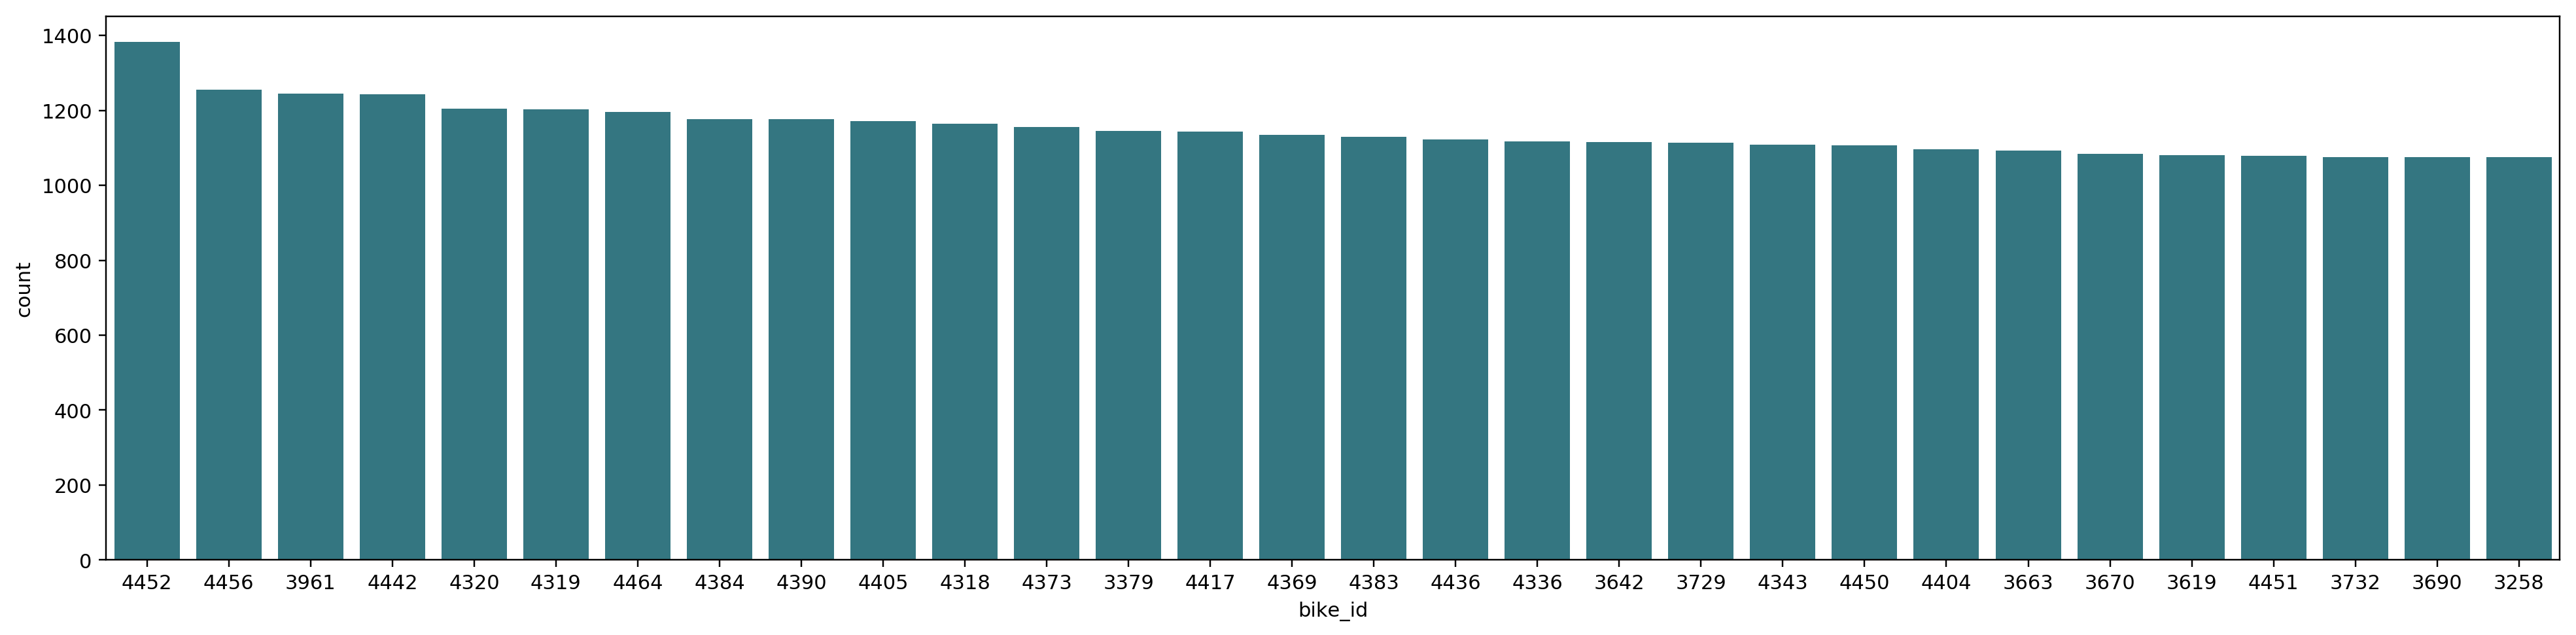

In [353]:
value_ct = df.bike_id.value_counts().iloc[:30]

fig, ax = plt.subplots(figsize = (22,5), dpi = 110)
color = sns.color_palette("viridis")[2]
sns.countplot(x = "bike_id", data = df, order=value_ct.index, color = color);

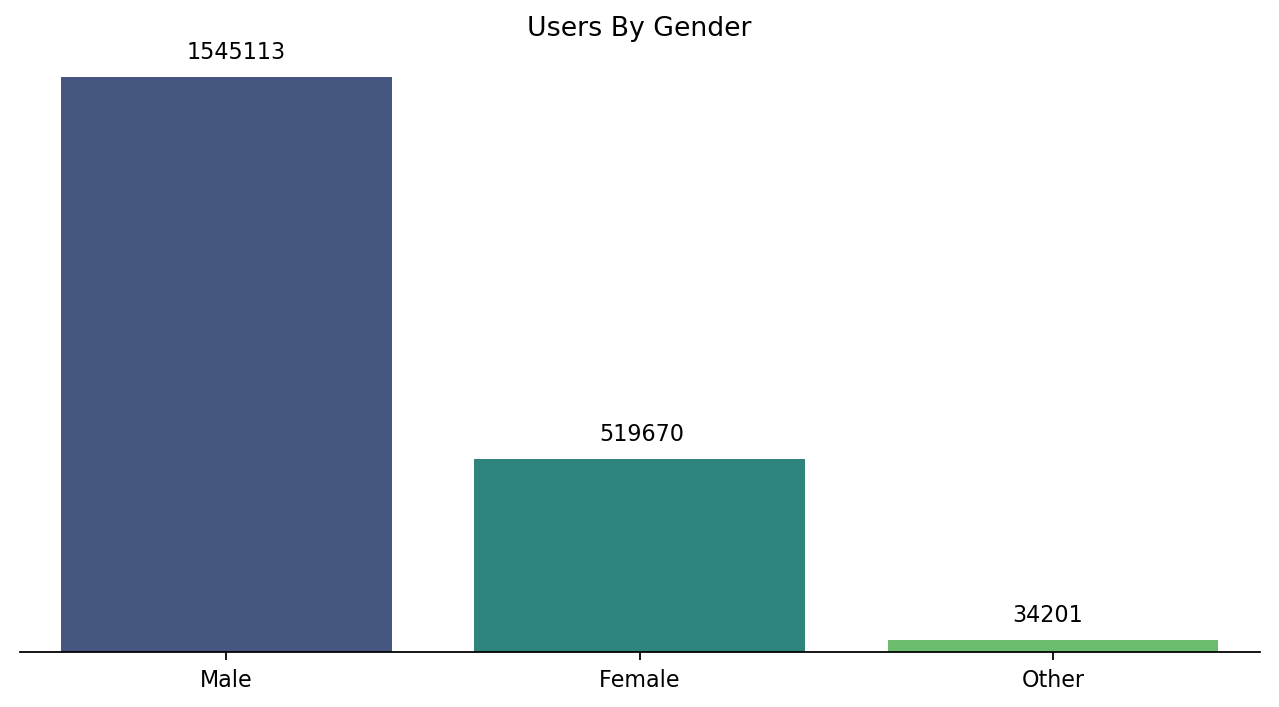

In [336]:
fig, ax = plt.subplots(figsize = (10,5), dpi = 80)
sns.countplot(x = "member_gender", data = df, palette = "viridis");

cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sns.despine(fig, left = True)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.303, p.get_height()+50000))

plt.title("Users By Gender");
plt.xlabel("");

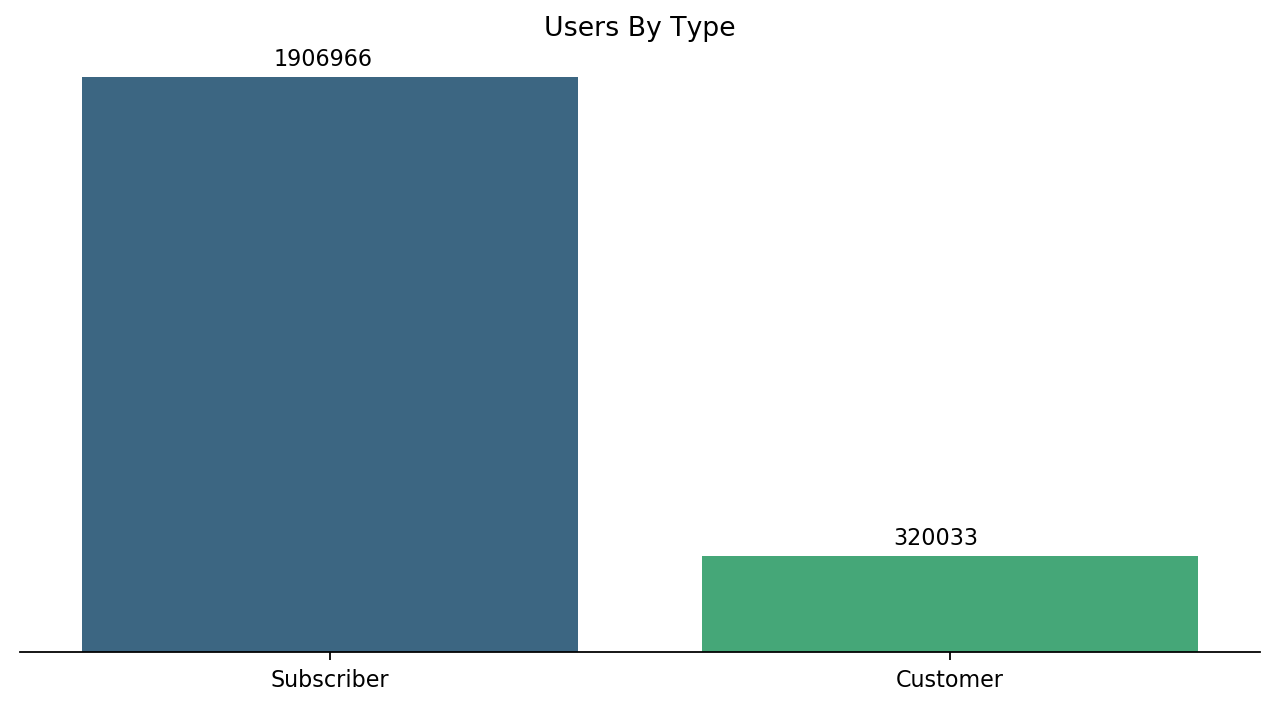

In [340]:
value_ct = df.user_type.value_counts().iloc[:31]

fig, ax = plt.subplots(figsize = (10,5), dpi = 80)
sns.countplot(x = "user_type", data = df, order=value_ct.index, palette = "viridis");

cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sns.despine(fig, left = True)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.31, p.get_height()+40000))

plt.title("Users By Type");
plt.xlabel("");

In [5]:
df["age"] = df["member_birth_year"].apply(lambda x: 2018 - int(x))

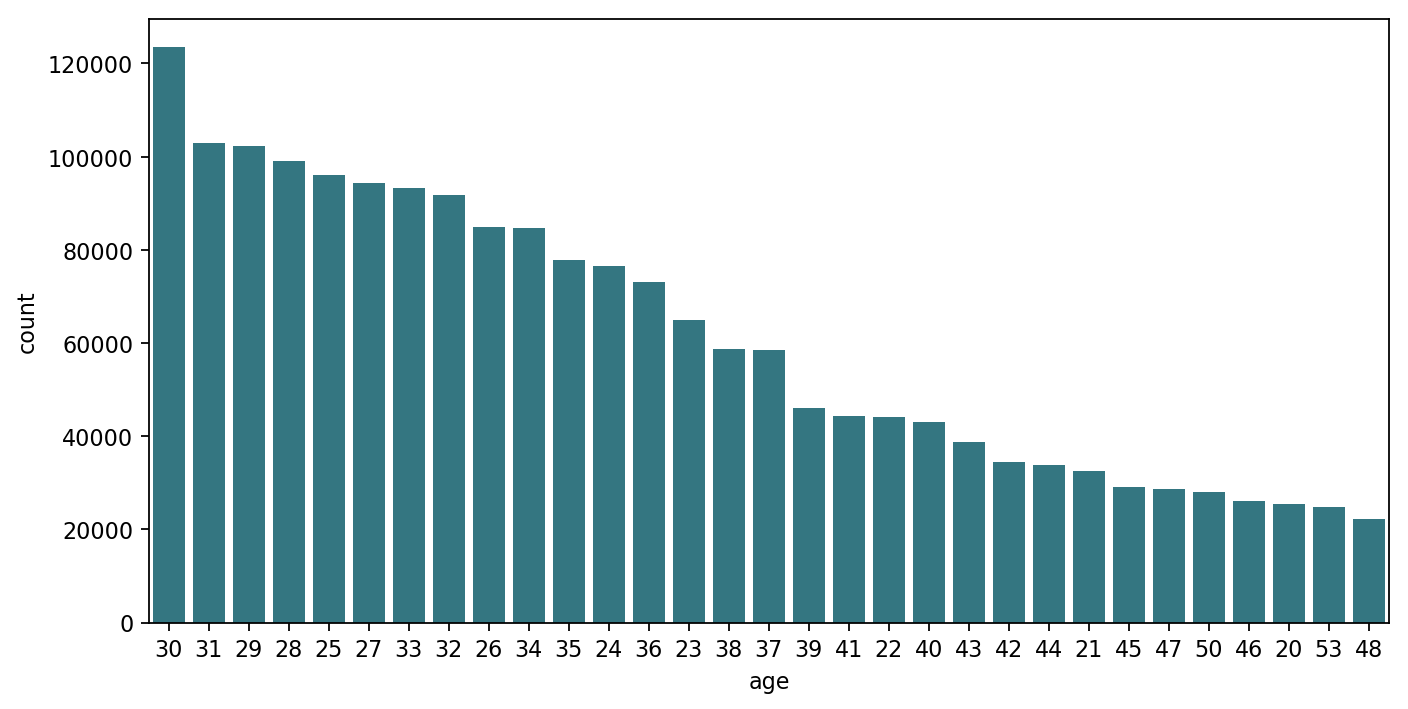

In [17]:
value_ct = df.query("age != 2018").age.value_counts().iloc[:31]

fig, ax = plt.subplots(figsize = (10,5), dpi = 80)
color = sns.color_palette("viridis")[2]
sns.countplot(x = "age", data = df.query("age != 2018"), order=value_ct.index, color = color);

In [18]:
df.query("age != 2018").age.mean()

34.69976603784374

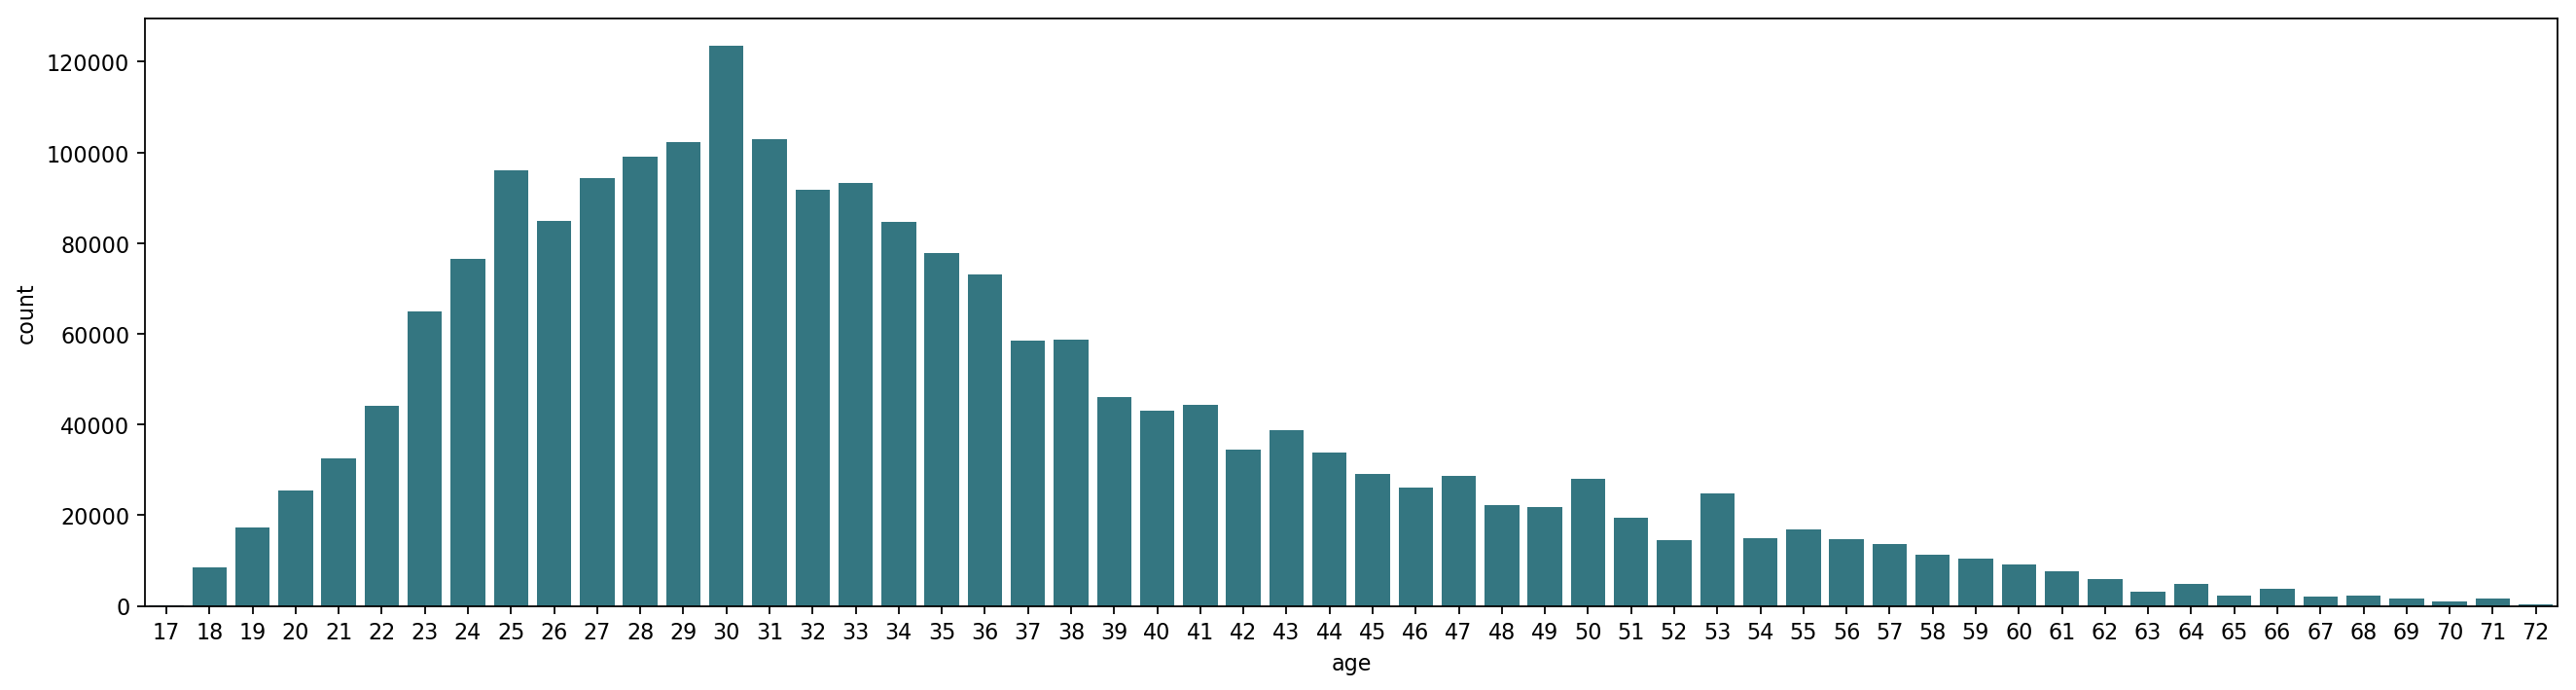

In [19]:
fig, ax = plt.subplots(figsize = (20,5), dpi = 80)
color = sns.color_palette("viridis")[2]
sns.countplot(x = "age", data = df.query("age != 2018 and age < 73").sort_values("age"), color = color);

In [6]:
df["dayofweek"] = df["start_time"].apply(lambda x: x.dayofweek)

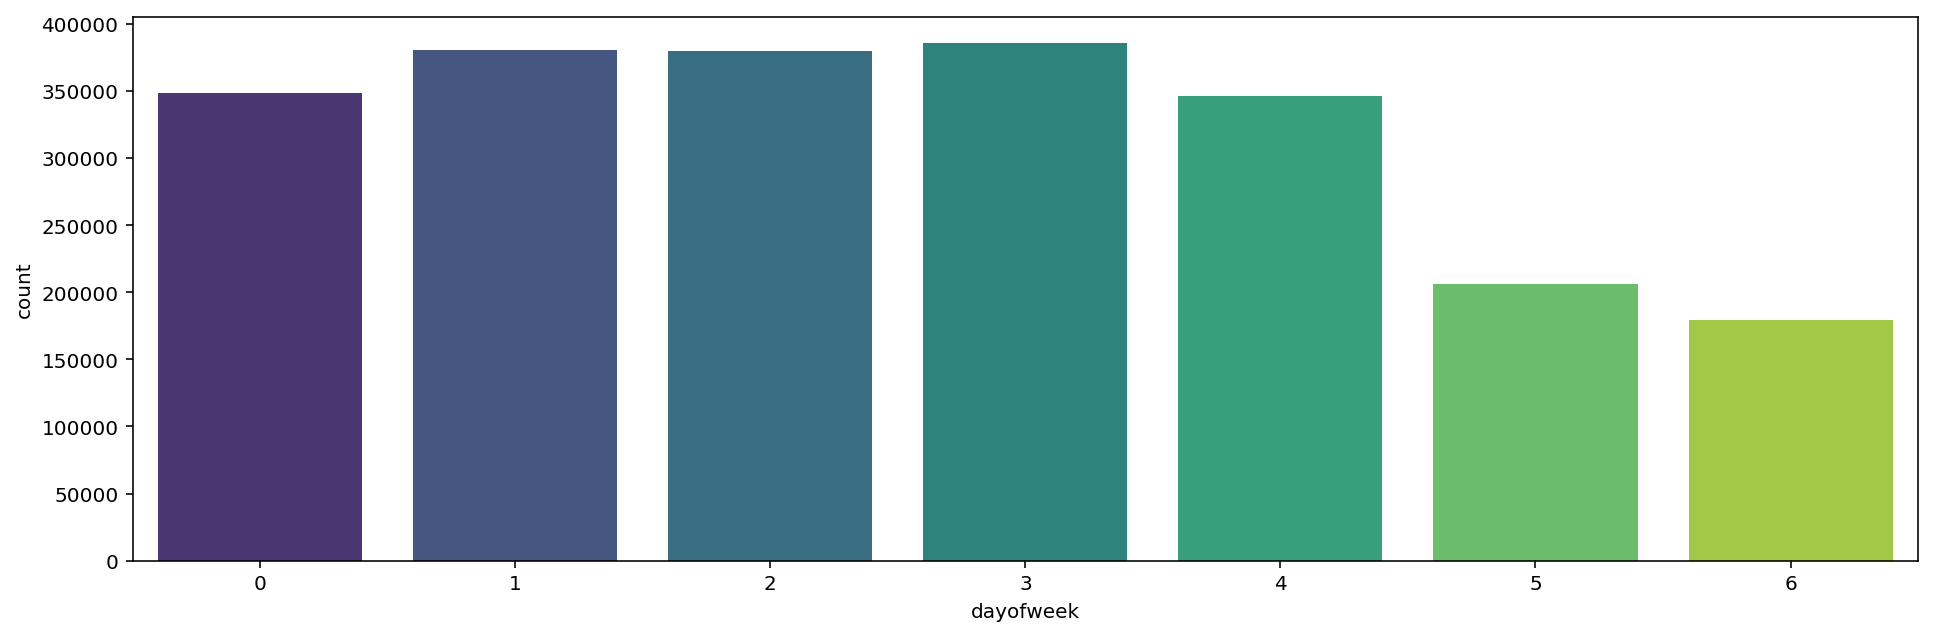

In [21]:
fig, ax = plt.subplots(figsize = (16,5))
sns.countplot(x = "dayofweek", data = df, palette = "viridis");

In [22]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_station_id_new,end_station_id_new,age,dayofweek
0,13709,2018-01-01 00:01:53.847,2018-01-01 03:50:23.433,86,Market St at Dolores St,37.769305,-122.426826,119,18th St at Noe St,37.761047,-122.432642,2924,Customer,0,NaN,No,86_0,119_0,2018,0
1,145,2018-01-01 00:07:41.040,2018-01-01 00:10:06.241,316,San Salvador St at 1st St,37.330165,-121.885831,311,Paseo De San Antonio at 2nd St,37.333798,-121.886943,2473,Subscriber,1957,Male,No,316_0,311_0,61,0
2,714,2018-01-01 00:07:52.943,2018-01-01 00:19:47.075,74,Laguna St at Hayes St,37.776435,-122.426244,70,Central Ave at Fell St,37.773311,-122.444293,2423,Subscriber,1986,Male,No,74_0,70_0,32,0
3,1151,2018-01-01 00:09:31.745,2018-01-01 00:28:43.159,97,14th St at Mission St,37.768265,-122.420110,125,20th St at Bryant St,37.759200,-122.409851,3455,Subscriber,1992,Male,No,97_0,125_0,26,0
4,1359,2018-01-01 00:14:37.187,2018-01-01 00:37:16.445,11,Davis St at Jackson St,37.797280,-122.398436,323,Broadway at Kearny,37.798014,-122.405950,2173,Customer,1995,Male,No,11_0,323_0,23,0


In [7]:
df['month_year'] = pd.to_datetime(df["start_time"]).dt.to_period('M')

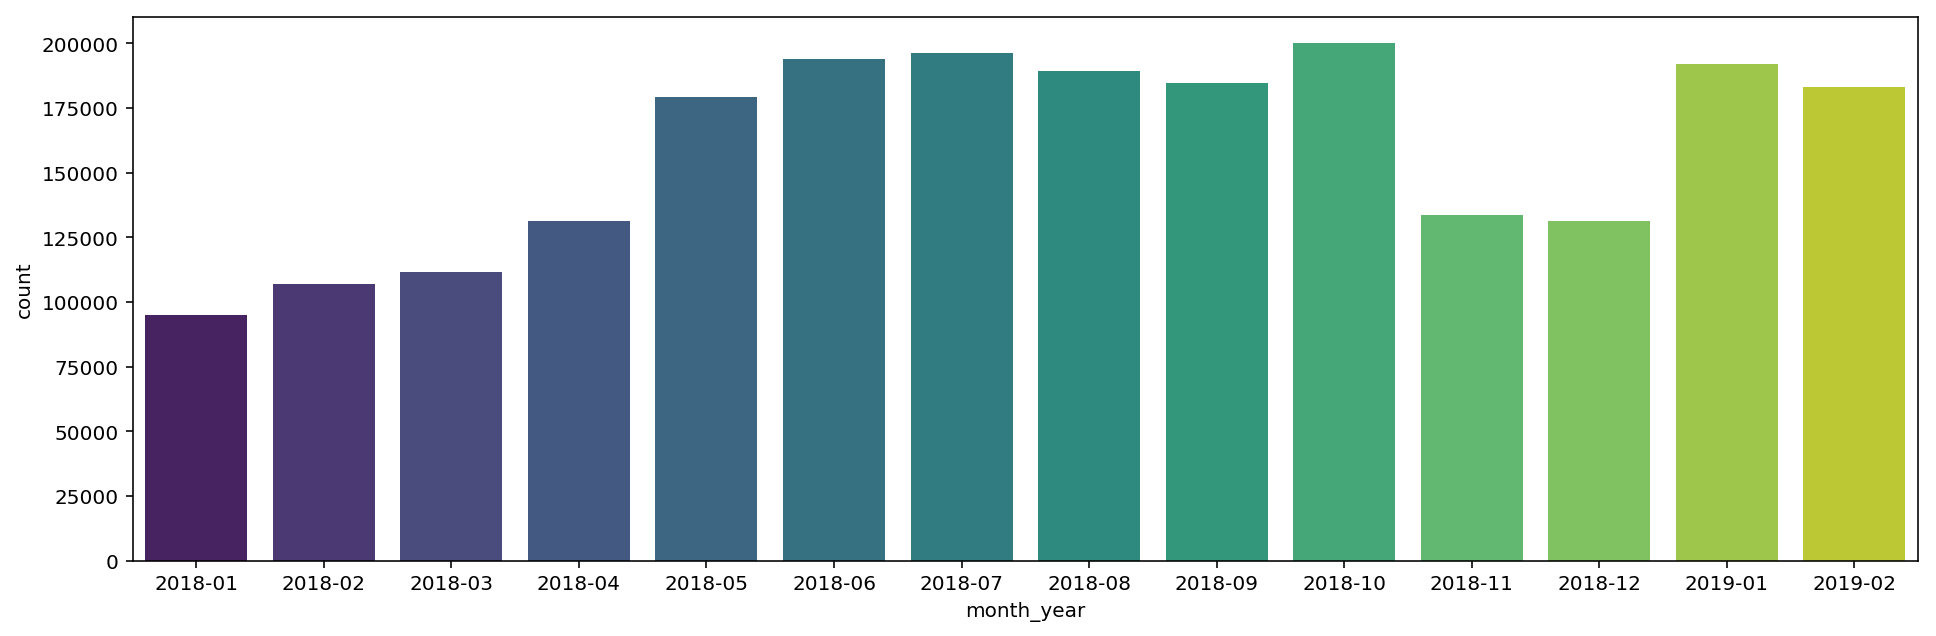

In [24]:
fig, ax = plt.subplots(figsize = (16,5))
sns.countplot(x = "month_year", data = df, palette = "viridis");

In [8]:
df['day_month_year'] = pd.to_datetime(df["start_time"]).dt.to_period('D')

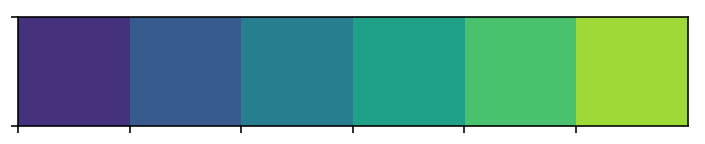

In [26]:
#https://seaborn.pydata.org/generated/seaborn.color_palette.html
sns.palplot(sns.color_palette("viridis"))

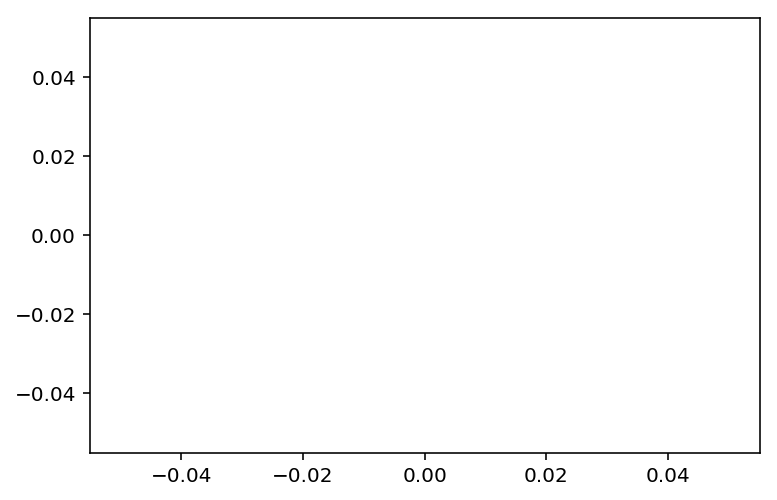

In [27]:
#https://stackoverflow.com/questions/35143672/seaborn-conditional-colors-based-on-value

custom_palette = {}
for q in set(df.day_month_year):
    if q.dayofweek == 0:
        custom_palette[q] = sns.color_palette("viridis")[0]
    elif q.dayofweek == 1:
        custom_palette[q] = sns.color_palette("viridis")[1]
    elif q.dayofweek == 2:
        custom_palette[q] = sns.color_palette("viridis")[2]
    elif q.dayofweek == 3:
        custom_palette[q] = sns.color_palette("viridis")[3]
    elif q.dayofweek == 4:
        custom_palette[q] = sns.color_palette("viridis")[4]
    elif q.dayofweek == 5:
        custom_palette[q] = sns.color_palette("viridis")[5]
    elif q.dayofweek == 6:
        custom_palette[q] = (224/255, 228/255, 65/255)
    else:
        custom_palette[q] = 'g'
        
legend_obj = []

colors = [sns.color_palette("viridis")[0],
          sns.color_palette("viridis")[1],
          sns.color_palette("viridis")[2],
          sns.color_palette("viridis")[3],
          sns.color_palette("viridis")[4],
          sns.color_palette("viridis")[5],
          (224/255, 228/255, 65/255)]

days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

for i, s in enumerate(days):
    legend_obj.append(plt.scatter([],[],color = colors[i]));  

In [28]:
#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
def plot_data_time(start_date="12.31.17", end_date="03.01.18"):
    fig, ax = plt.subplots(figsize = (30,5), dpi = 100)
    sns.countplot(x = "day_month_year", data = df[(df["start_time"] < pd.to_datetime(end_date)) & (df["start_time"] > pd.to_datetime(start_date))], palette = custom_palette);
    plt.xticks(rotation = 90);
    plt.ylim(0,10000);
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(legend_obj, days, loc='center left', bbox_to_anchor=(1, 0.5))

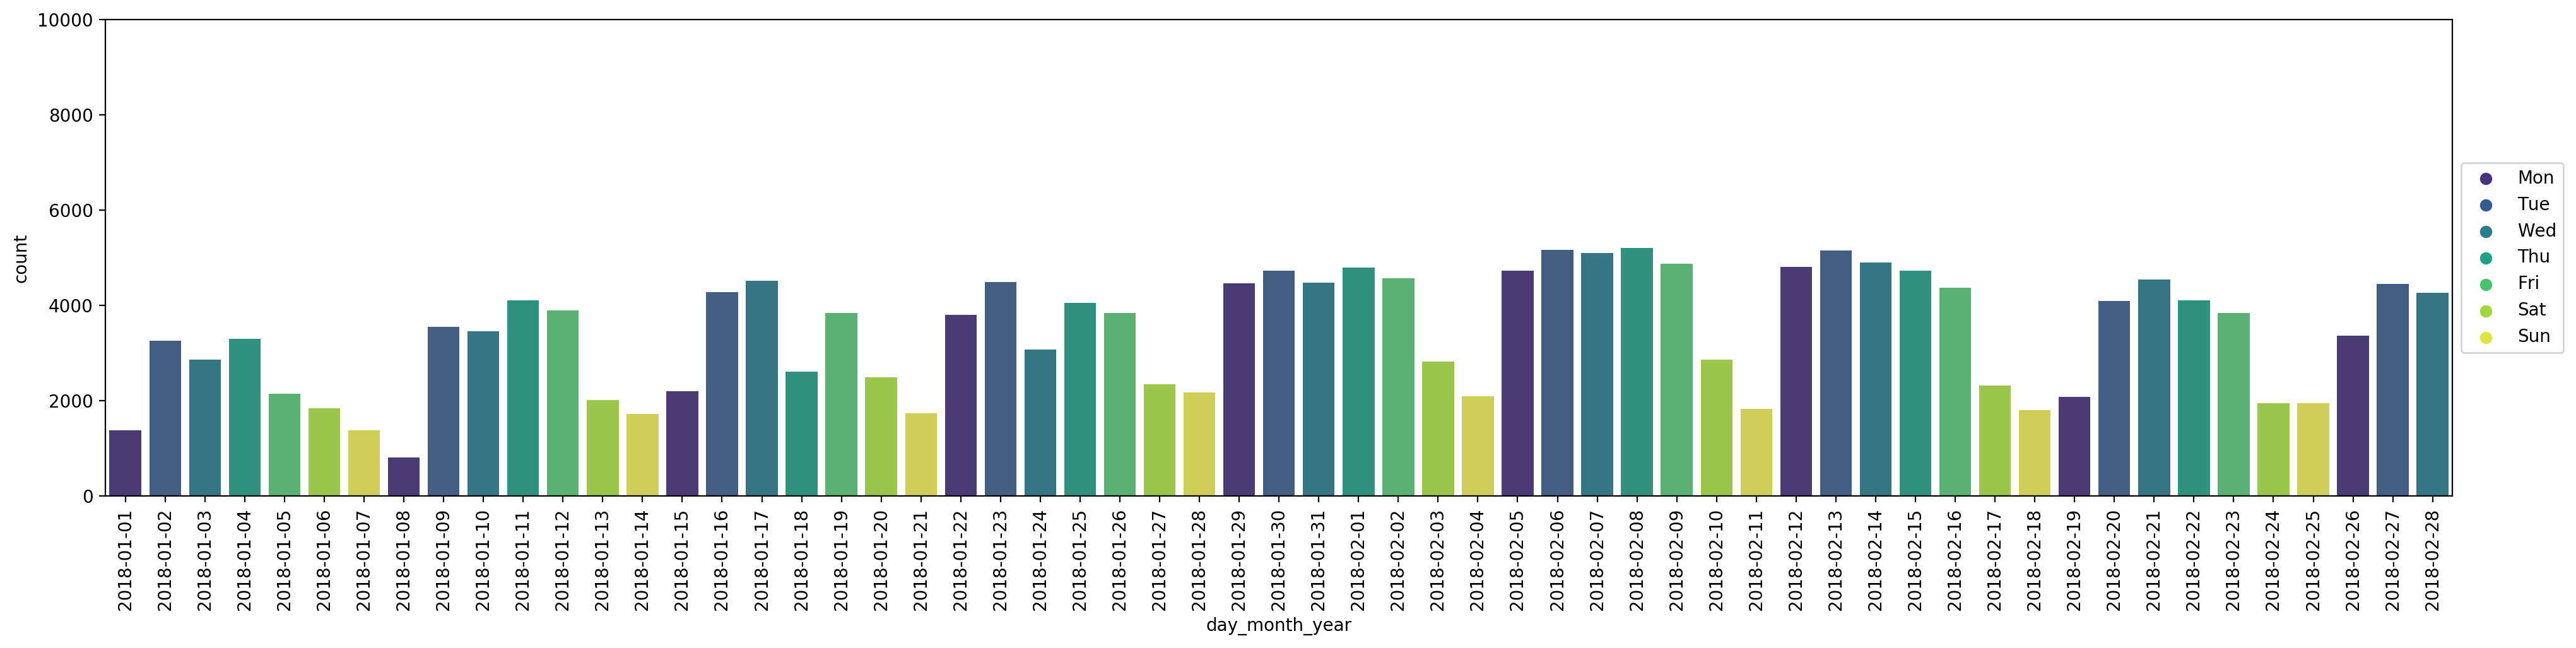

In [29]:
plot_data_time()

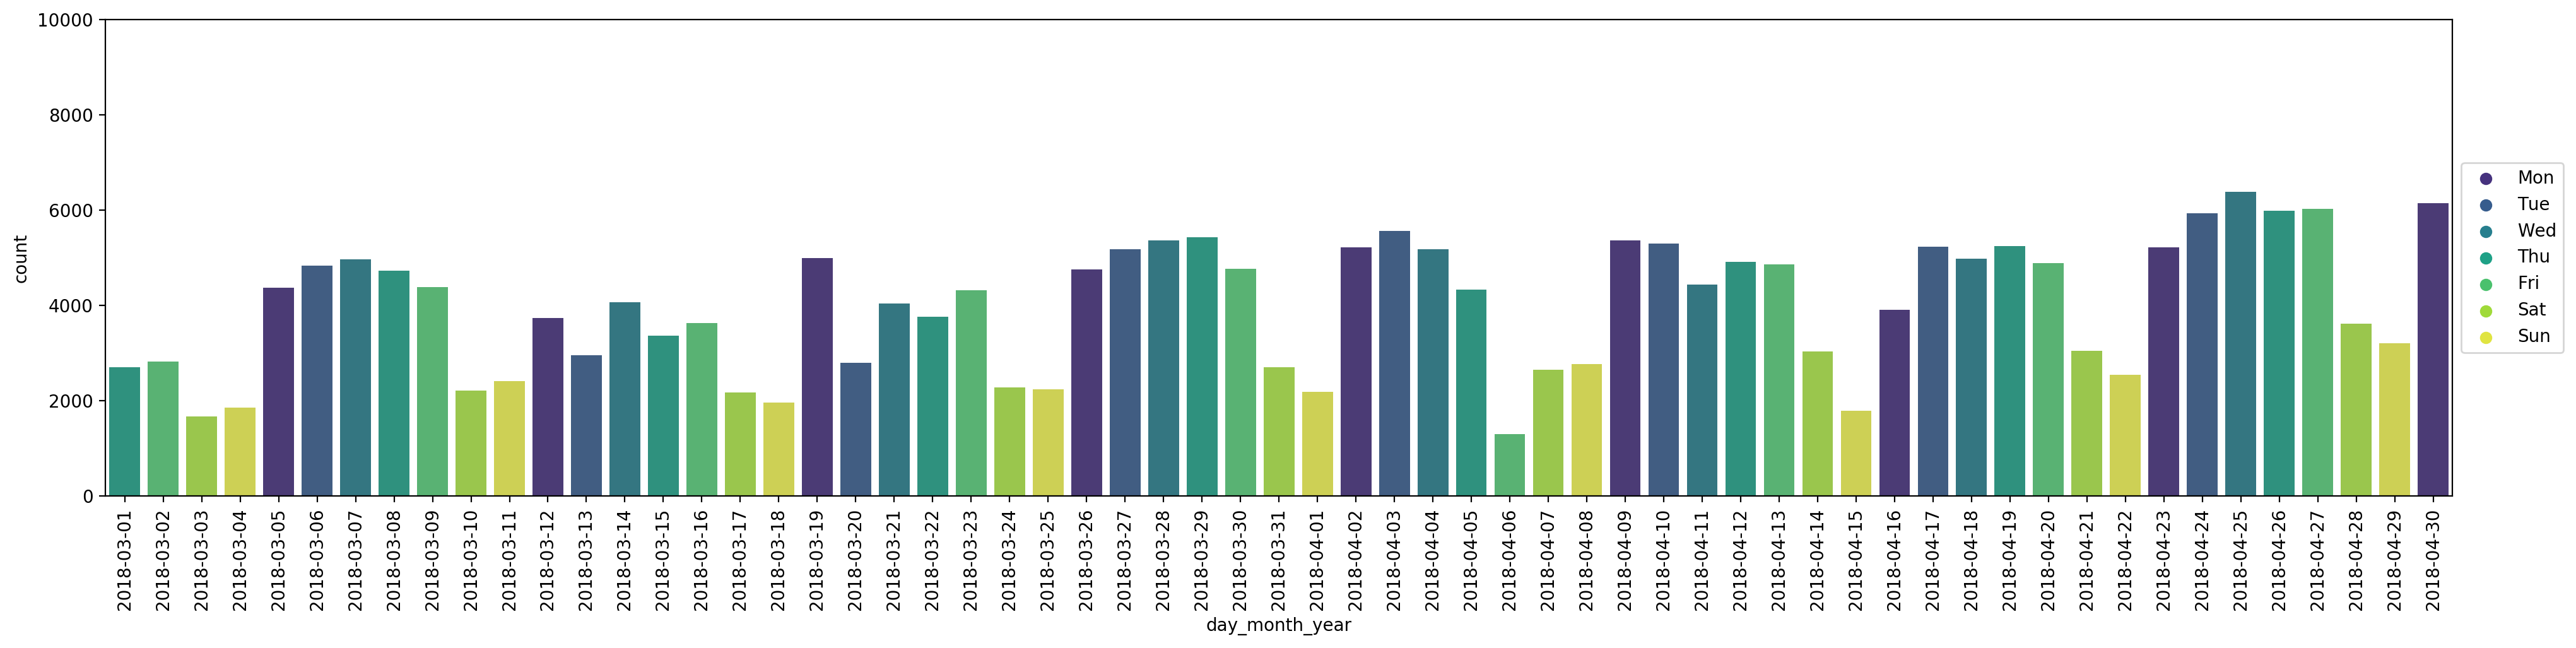

In [30]:
plot_data_time("03.01.18","05.01.18")

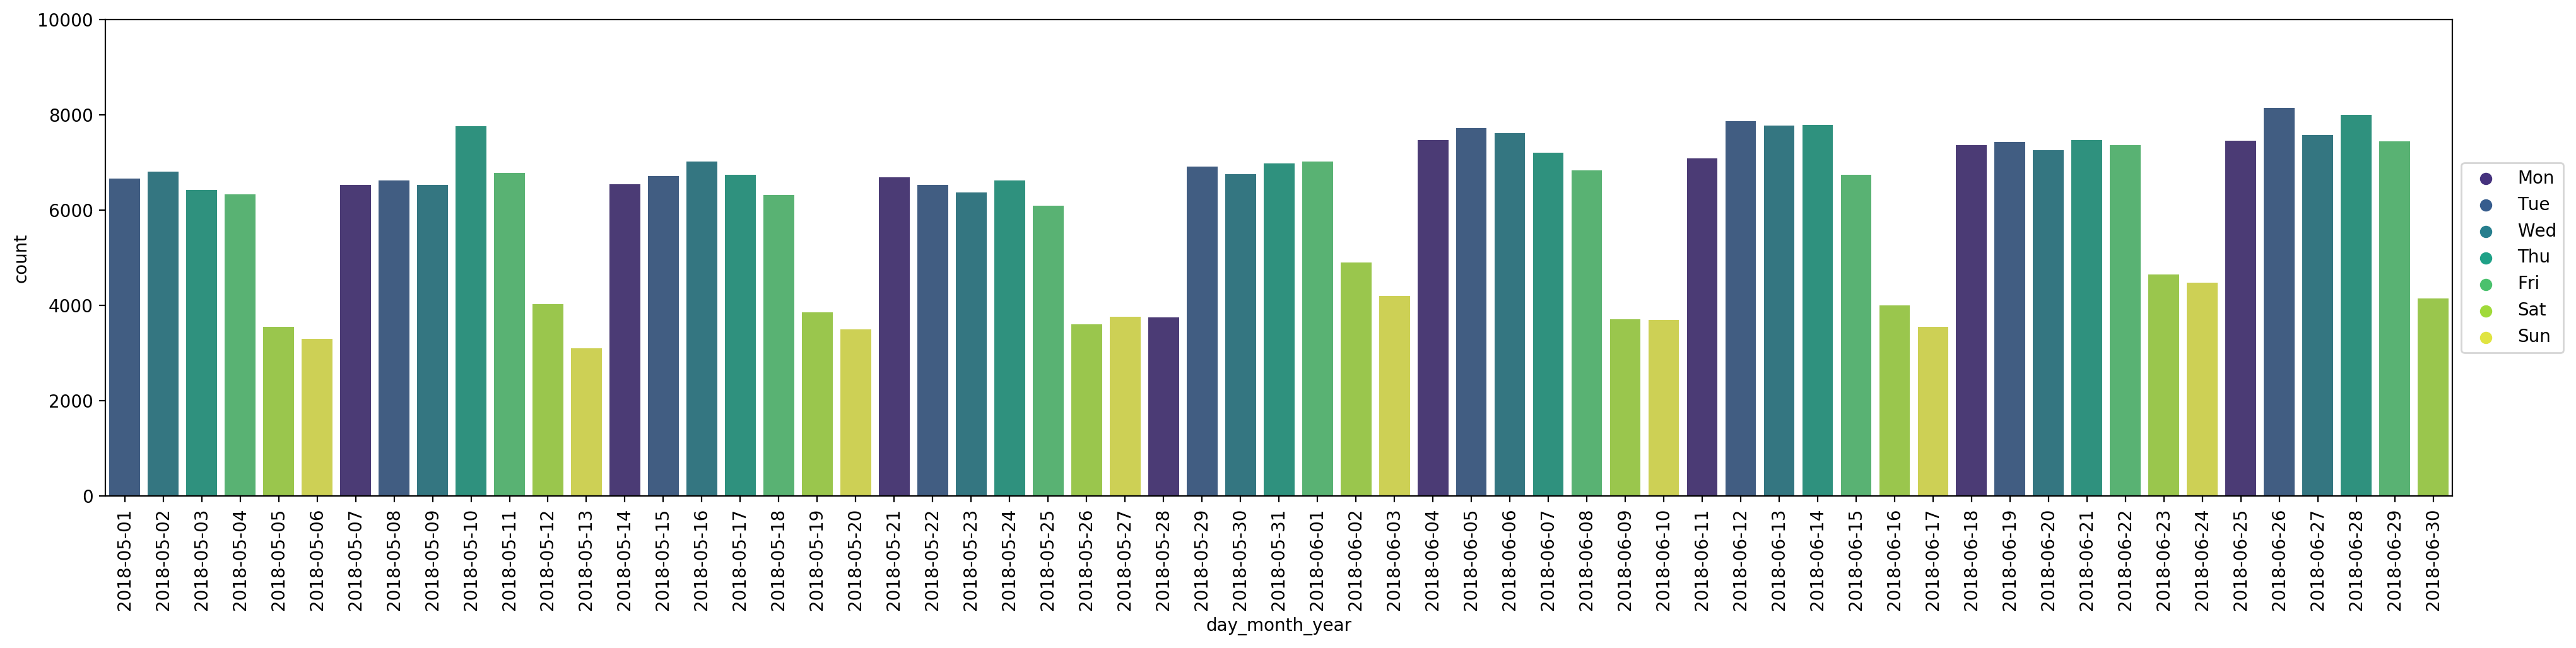

In [31]:
plot_data_time("05.01.18","07.01.18")

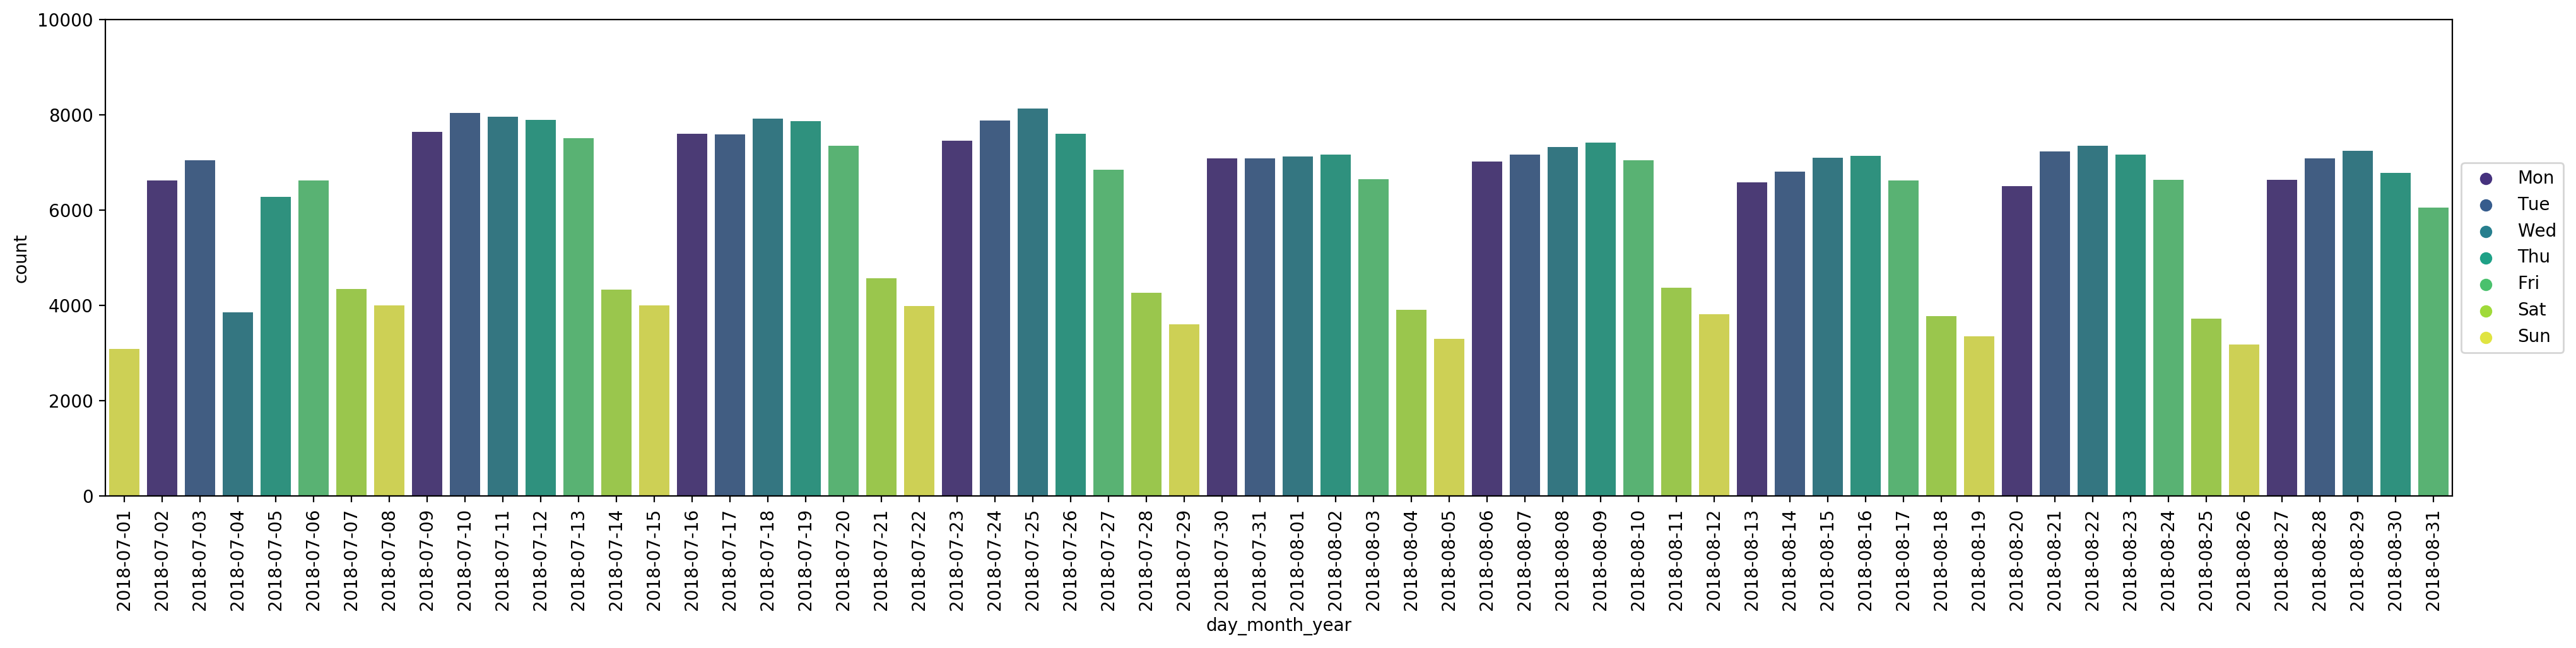

In [32]:
plot_data_time("07.01.18","09.01.18")

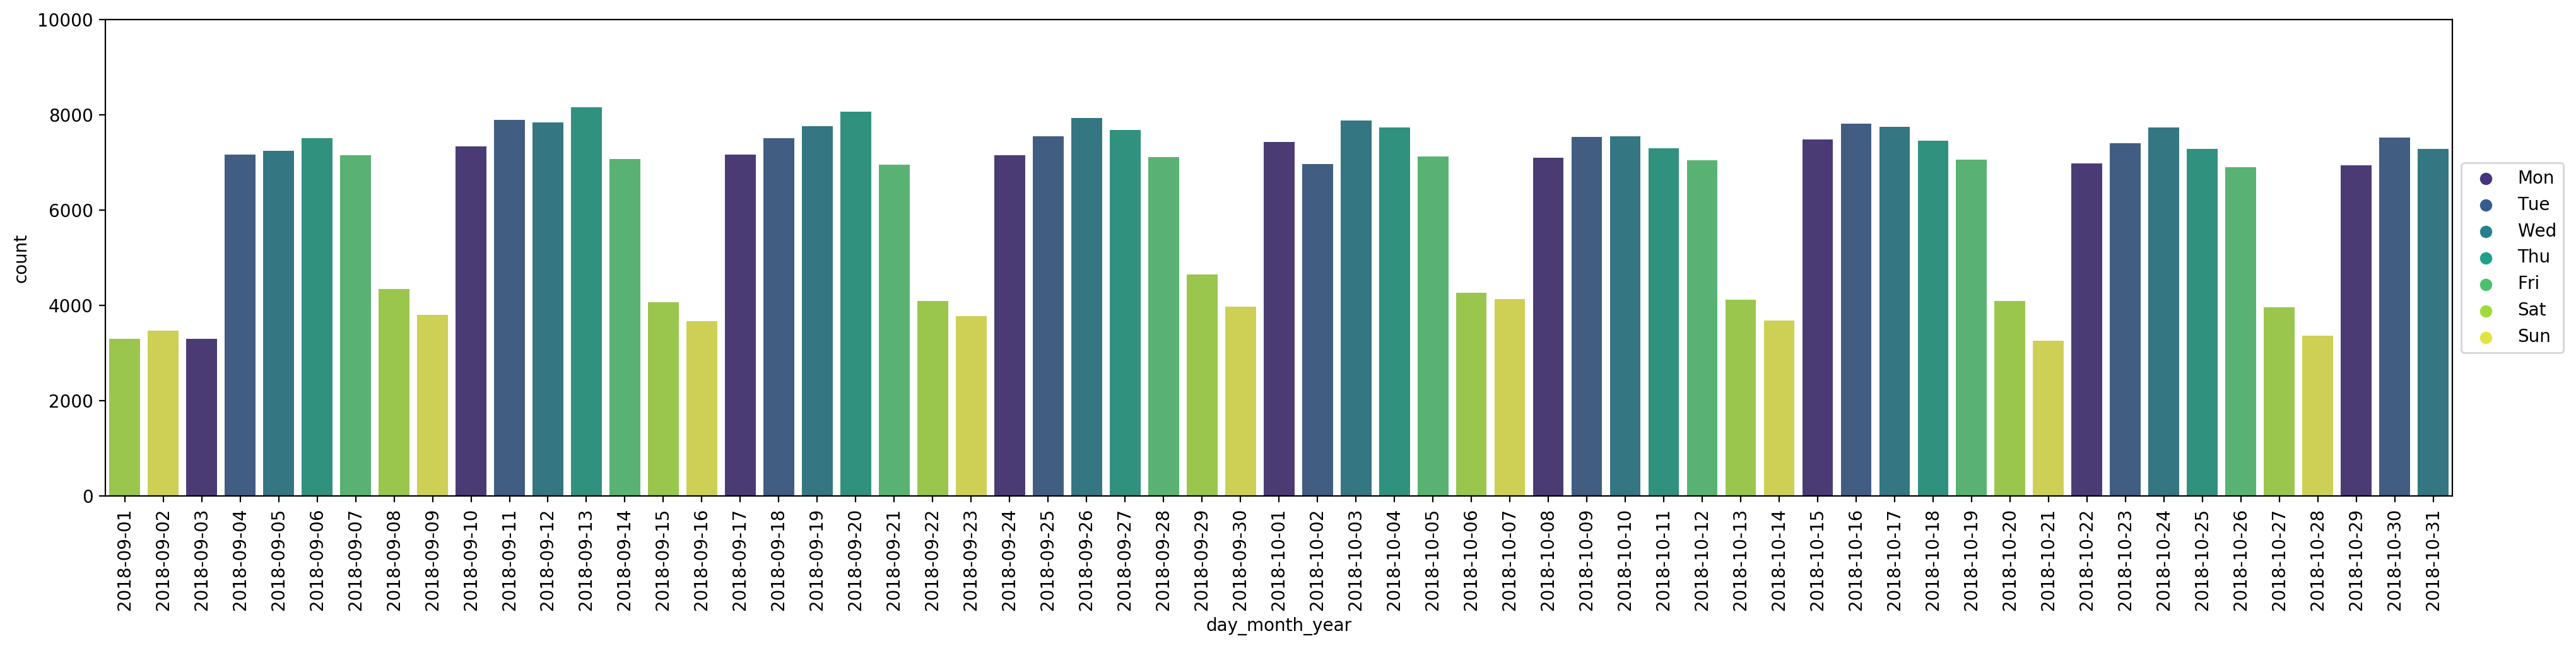

In [33]:
plot_data_time("09.01.18","11.01.18")

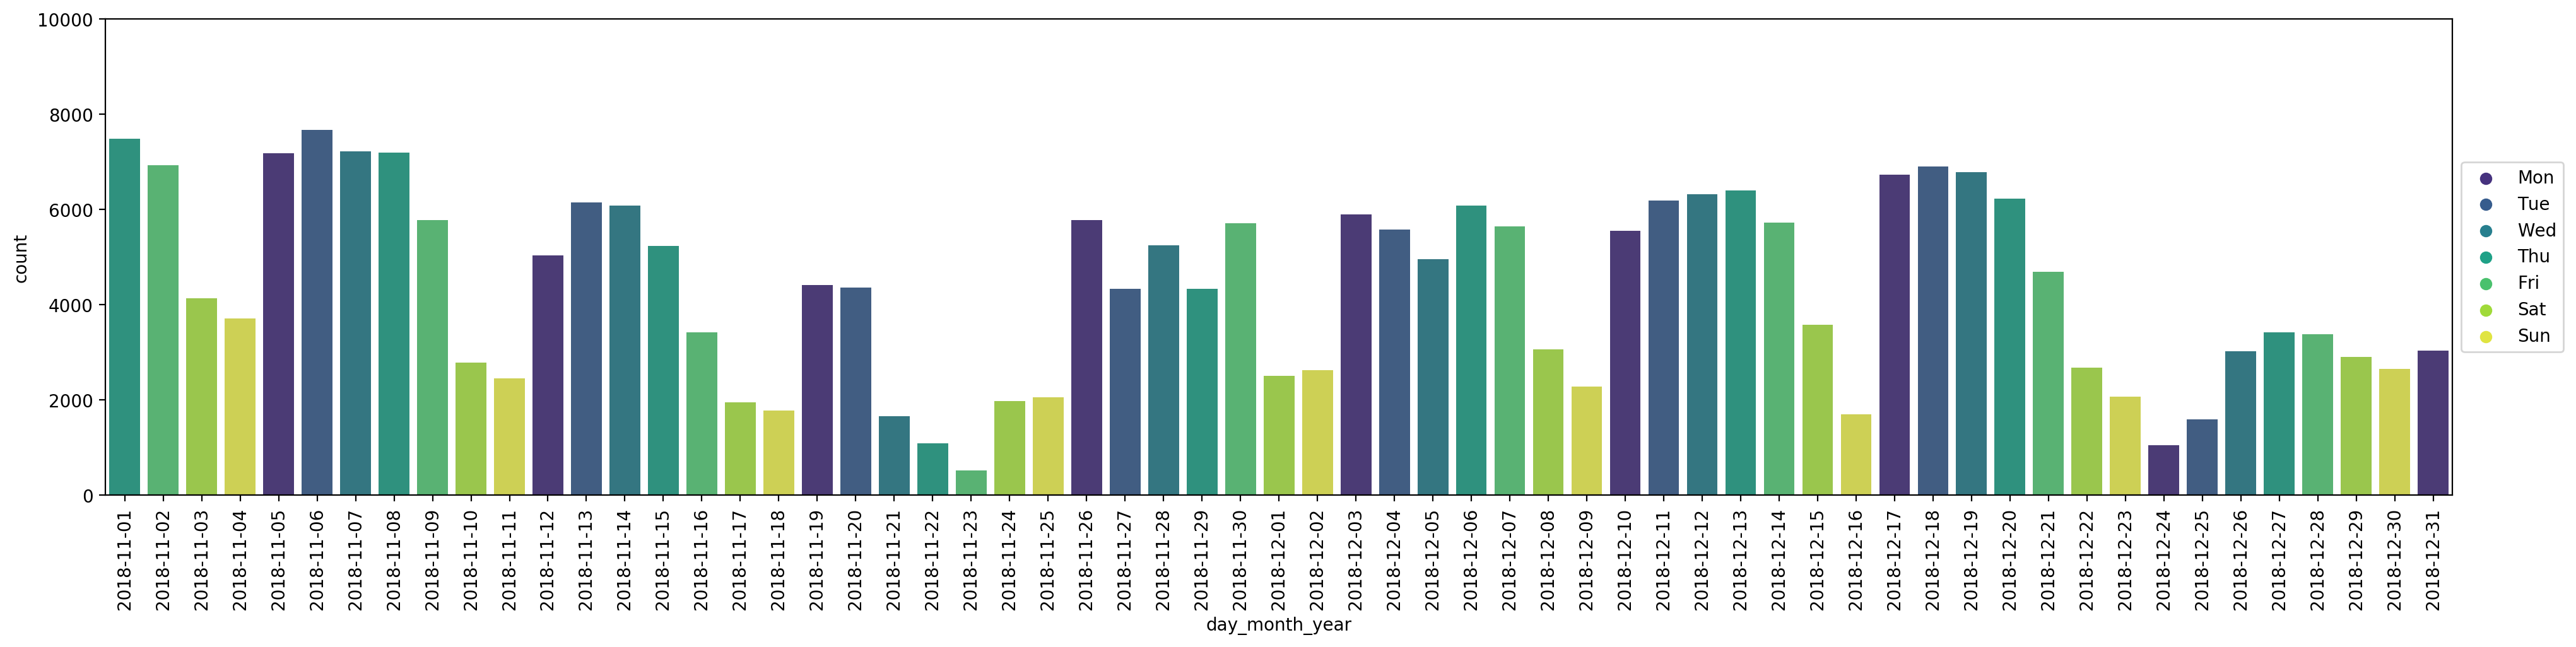

In [34]:
plot_data_time("11.01.18","01.01.19")

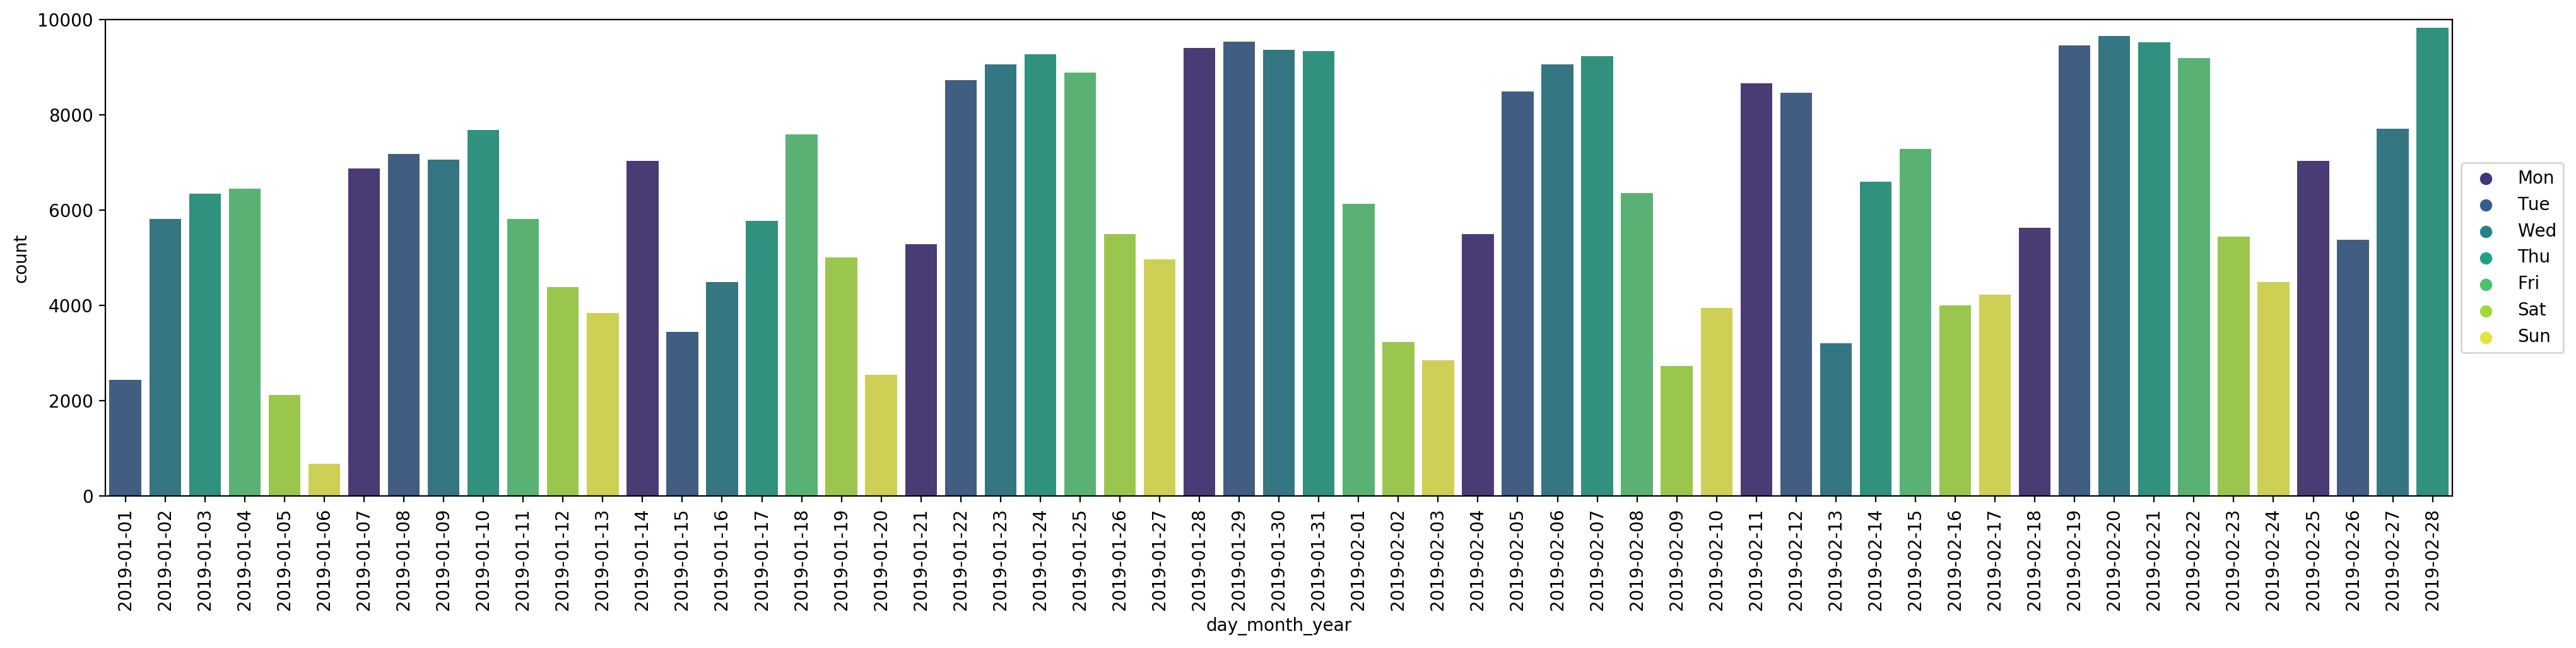

In [35]:
plot_data_time("01.01.19","03.01.19")

In [9]:
df["start_hr"] = df["start_time"].apply(lambda x: x.hour)
df["end_hr"] = df["end_time"].apply(lambda x: x.hour)

Nope


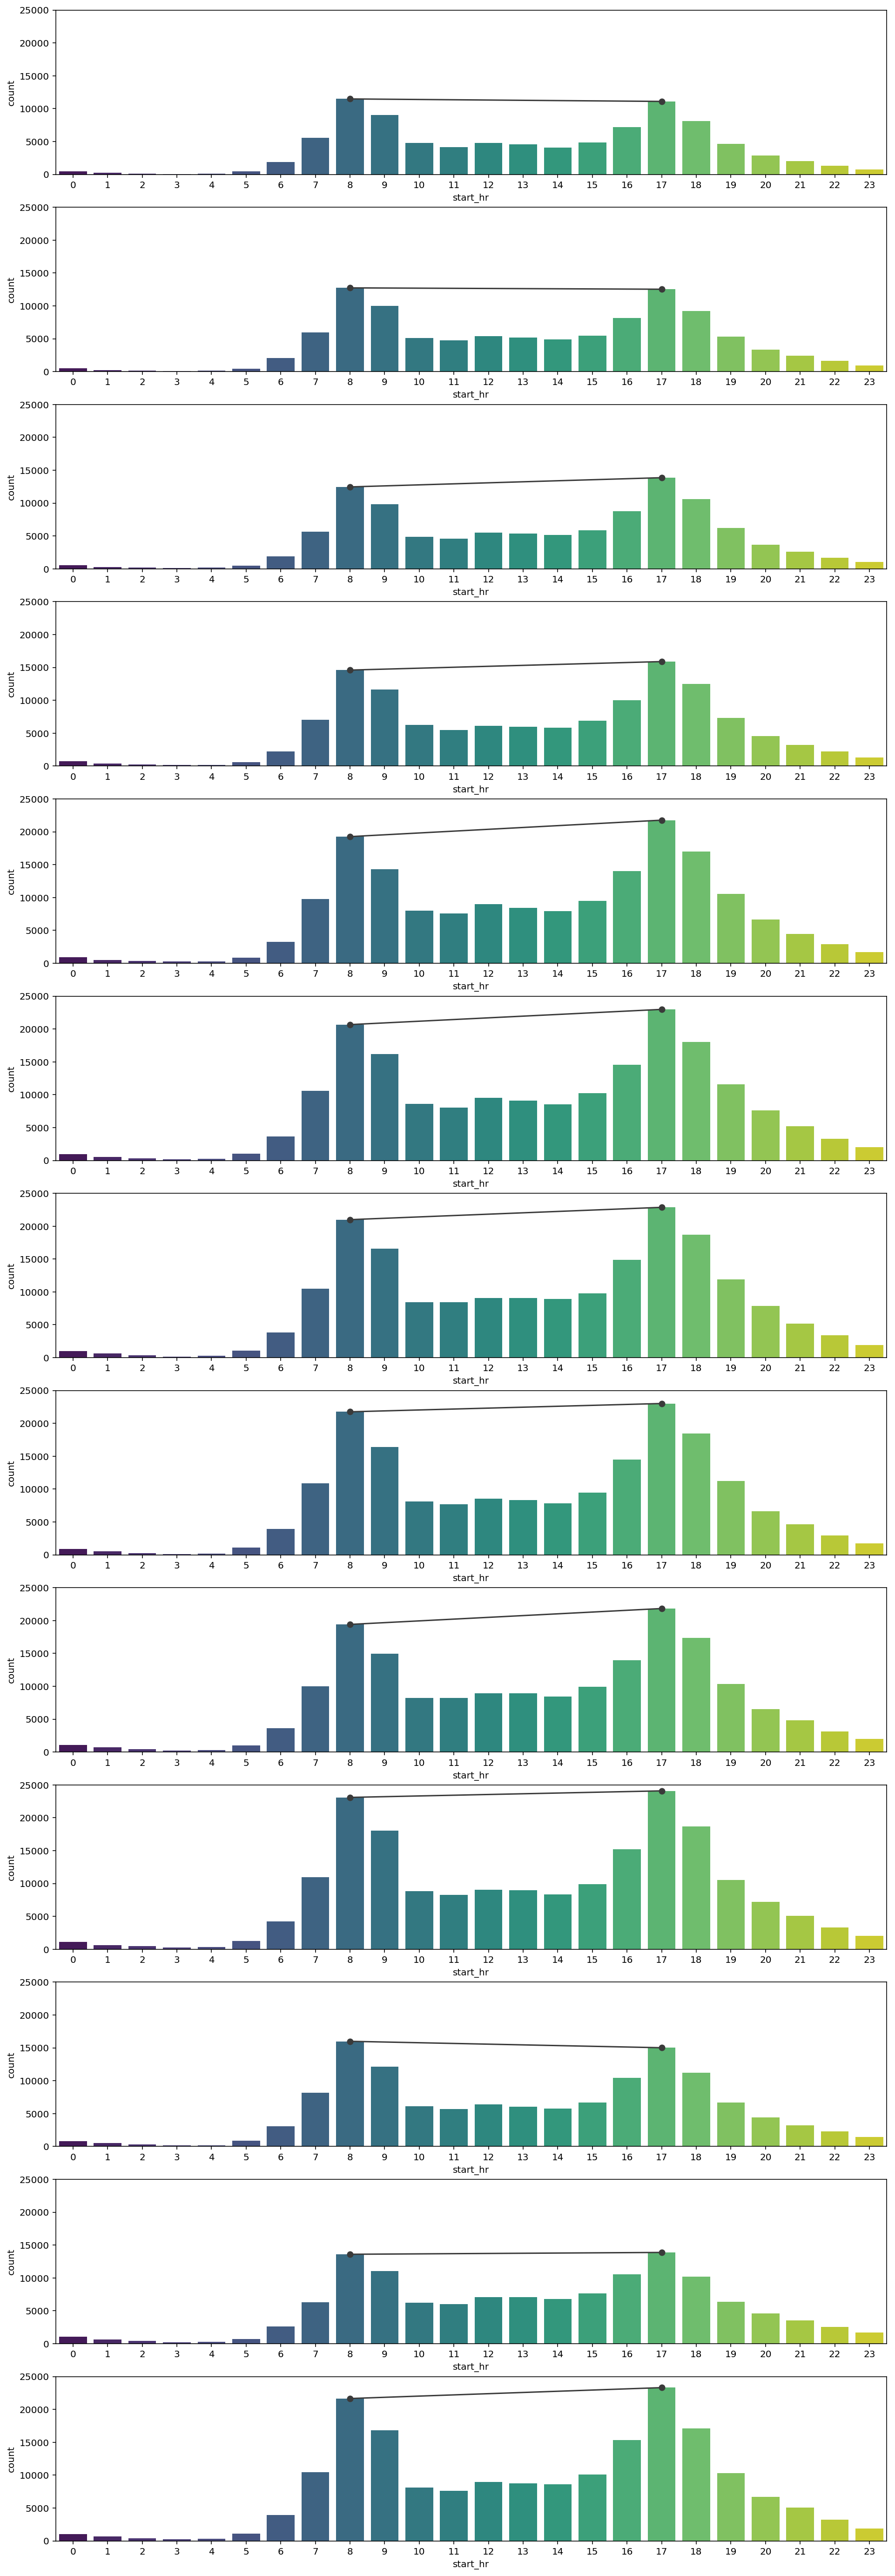

In [46]:
fig, ax = plt.subplots(13,1,figsize = (16,50))

dates = [pd.to_datetime(f"2018-{x}") for x in range(1,13)] + [pd.to_datetime(f"2019-{x}")for x in range(1,3)]

for i, date in enumerate(dates):
    try:
        sns.countplot(x = "start_hr", data = df[(df['start_time'] < dates[i+1])&(df['start_time'] >= date)], palette = "viridis", ax = ax[i]);
        ax[i].set_ylim(0,25000)
        ax[i].set_xlim(-0.5,23.5)
        ax[i].plot([8,17], [ax[i].patches[8].get_height(),ax[i].patches[17].get_height()], 'o-', color = "#3a3a3a")
        
        
    except:
        print("Nope")
        pass

In [66]:
for i, date in enumerate(dates):
    try:
        print(str(df[(df['start_time'] < dates[i+1])&(df['start_time'] >= date)].start_hr.value_counts().head(2)))
    except:
        pass

8     11480
17    11103
Name: start_hr, dtype: int64
8     12738
17    12532
Name: start_hr, dtype: int64
17    13864
8     12460
Name: start_hr, dtype: int64
17    15889
8     14596
Name: start_hr, dtype: int64
17    21765
8     19261
Name: start_hr, dtype: int64
17    22980
8     20665
Name: start_hr, dtype: int64
17    22866
8     20994
Name: start_hr, dtype: int64
17    23025
8     21762
Name: start_hr, dtype: int64
17    21836
8     19420
Name: start_hr, dtype: int64
17    24098
8     23104
Name: start_hr, dtype: int64
8     15999
17    15022
Name: start_hr, dtype: int64
17    13882
8     13602
Name: start_hr, dtype: int64
17    23316
8     21660
Name: start_hr, dtype: int64


<a id='bi'></a>
### Bivariate Exploration
> Relationships

In [38]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_station_id_new,end_station_id_new,age,dayofweek,month_year,day_month_year
0,13709,2018-01-01 00:01:53.847,2018-01-01 03:50:23.433,86,Market St at Dolores St,37.769305,-122.426826,119,18th St at Noe St,37.761047,...,Customer,0,NaN,No,86_0,119_0,2018,0,2018-01,2018-01-01
1,145,2018-01-01 00:07:41.040,2018-01-01 00:10:06.241,316,San Salvador St at 1st St,37.330165,-121.885831,311,Paseo De San Antonio at 2nd St,37.333798,...,Subscriber,1957,Male,No,316_0,311_0,61,0,2018-01,2018-01-01
2,714,2018-01-01 00:07:52.943,2018-01-01 00:19:47.075,74,Laguna St at Hayes St,37.776435,-122.426244,70,Central Ave at Fell St,37.773311,...,Subscriber,1986,Male,No,74_0,70_0,32,0,2018-01,2018-01-01
3,1151,2018-01-01 00:09:31.745,2018-01-01 00:28:43.159,97,14th St at Mission St,37.768265,-122.420110,125,20th St at Bryant St,37.759200,...,Subscriber,1992,Male,No,97_0,125_0,26,0,2018-01,2018-01-01
4,1359,2018-01-01 00:14:37.187,2018-01-01 00:37:16.445,11,Davis St at Jackson St,37.797280,-122.398436,323,Broadway at Kearny,37.798014,...,Customer,1995,Male,No,11_0,323_0,23,0,2018-01,2018-01-01


In [115]:
df["combi"] = df["start_station_id_new"] + " - " + df["end_station_id_new"]
df.combi.value_counts().head(10)

15_0 - 6_0       8352
6_0 - 16_0       5403
81_0 - 15_0      5238
196_0 - 182_0    4607
182_0 - 196_0    4355
6_0 - 15_0       4171
16_0 - 6_0       3685
15_0 - 81_0      3620
90_0 - 67_0      3417
195_0 - 182_0    3396
Name: combi, dtype: int64

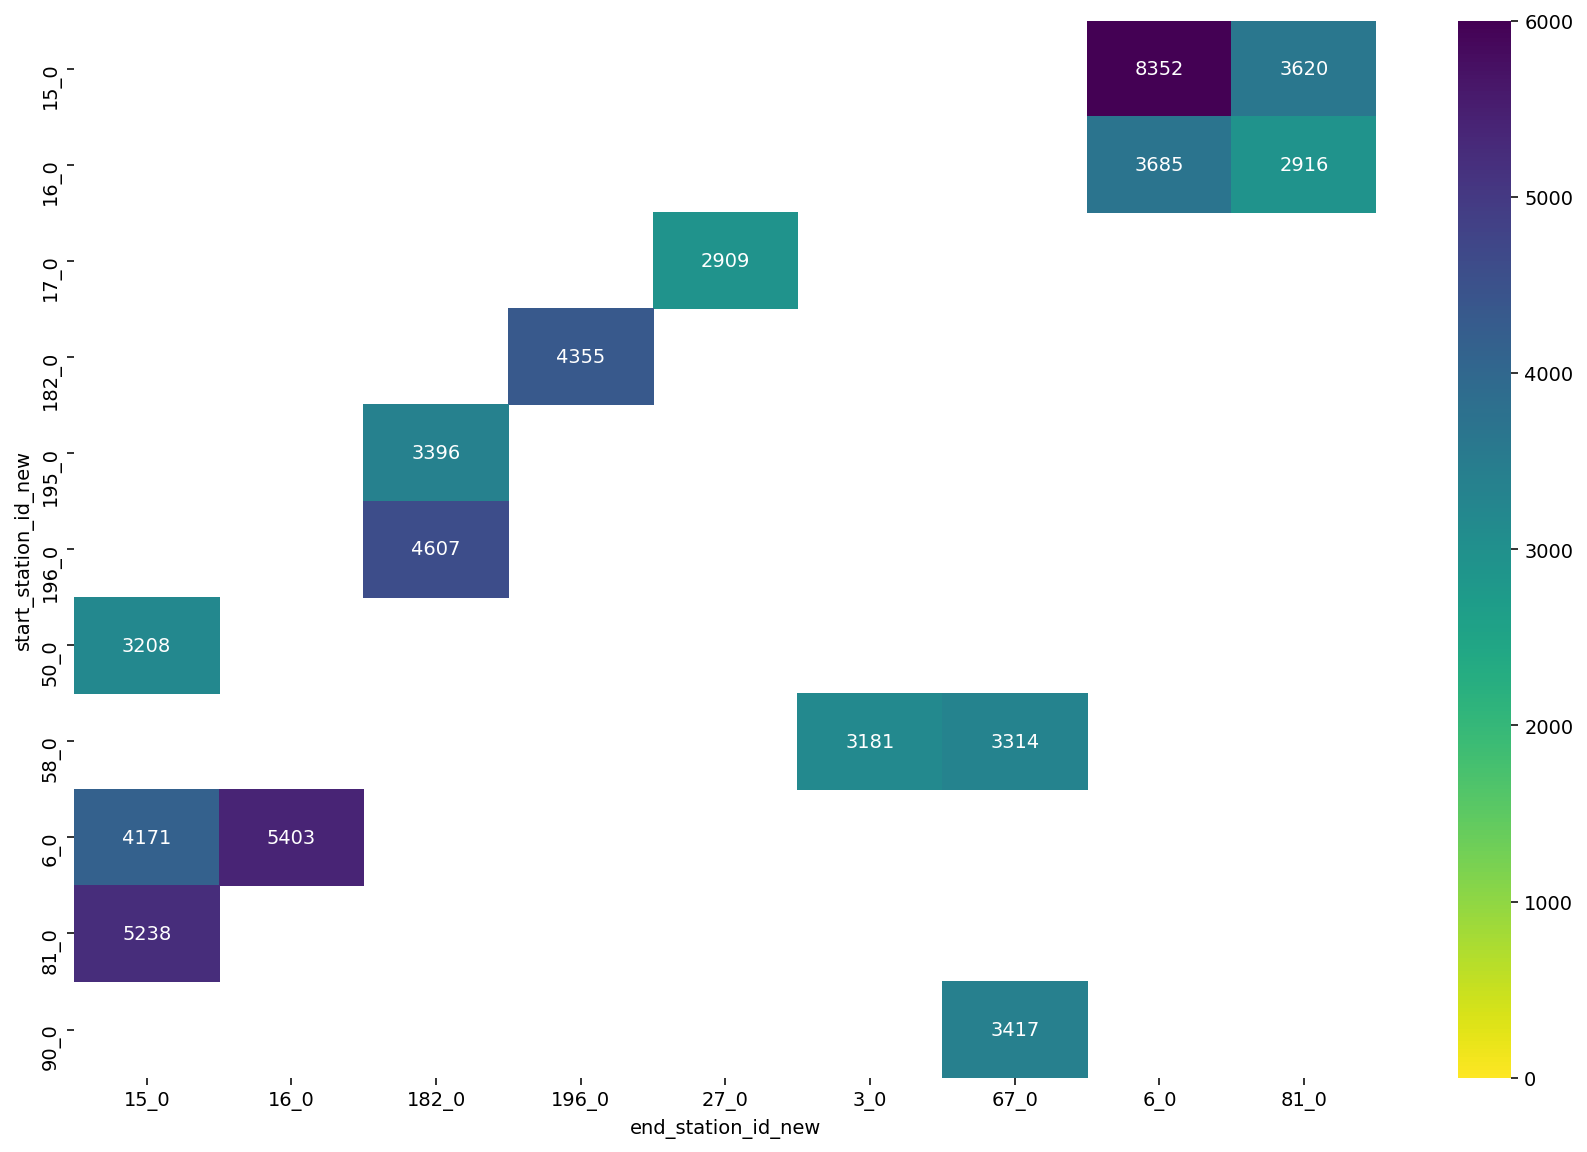

In [354]:
combi_list = df.combi.value_counts().head(15).keys()

df_criteria = df[df["combi"].isin(combi_list)]

df_pivot = df_criteria.pivot_table(index="start_station_id_new", columns = "end_station_id_new", values = "start_time", aggfunc = "count", fill_value = 0)

fig, axes = plt.subplots(figsize = (15,10), dpi = 70)
sns.heatmap(df_pivot, annot = True, cmap = "viridis_r", fmt='g', vmin = 1, vmax = 6000, mask= df_pivot == 0)

In [266]:
for i, x in enumerate(combi_list):
    start, end = x.split(" - ")
    start_name = df.query(f"start_station_id_new == '{start}'").start_station_name.drop_duplicates().get_values()
    end_name = df.query(f"end_station_id_new == '{end}'").end_station_name.drop_duplicates().get_values()
    print(start," ",start_name[0], " - ",end, " ", end_name[0])


6_0   The Embarcadero at Sansome St  -  15_0   San Francisco Ferry Building (Harry Bridges Plaza)
16_0   Steuart St at Market St  -  6_0   The Embarcadero at Sansome St
15_0   San Francisco Ferry Building (Harry Bridges Plaza)  -  81_0   Berry St at 4th St
182_0   19th Street BART Station  -  196_0   Grand Ave at Perkins St
196_0   Grand Ave at Perkins St  -  182_0   19th Street BART Station
15_0   San Francisco Ferry Building (Harry Bridges Plaza)  -  6_0   The Embarcadero at Sansome St
6_0   The Embarcadero at Sansome St  -  16_0   Steuart St at Market St
81_0   Berry St at 4th St  -  15_0   San Francisco Ferry Building (Harry Bridges Plaza)
67_0   San Francisco Caltrain Station 2  (Townsend St at 4th St)  -  90_0   Townsend St at 7th St
182_0   19th Street BART Station  -  195_0   Bay Pl at Vernon St


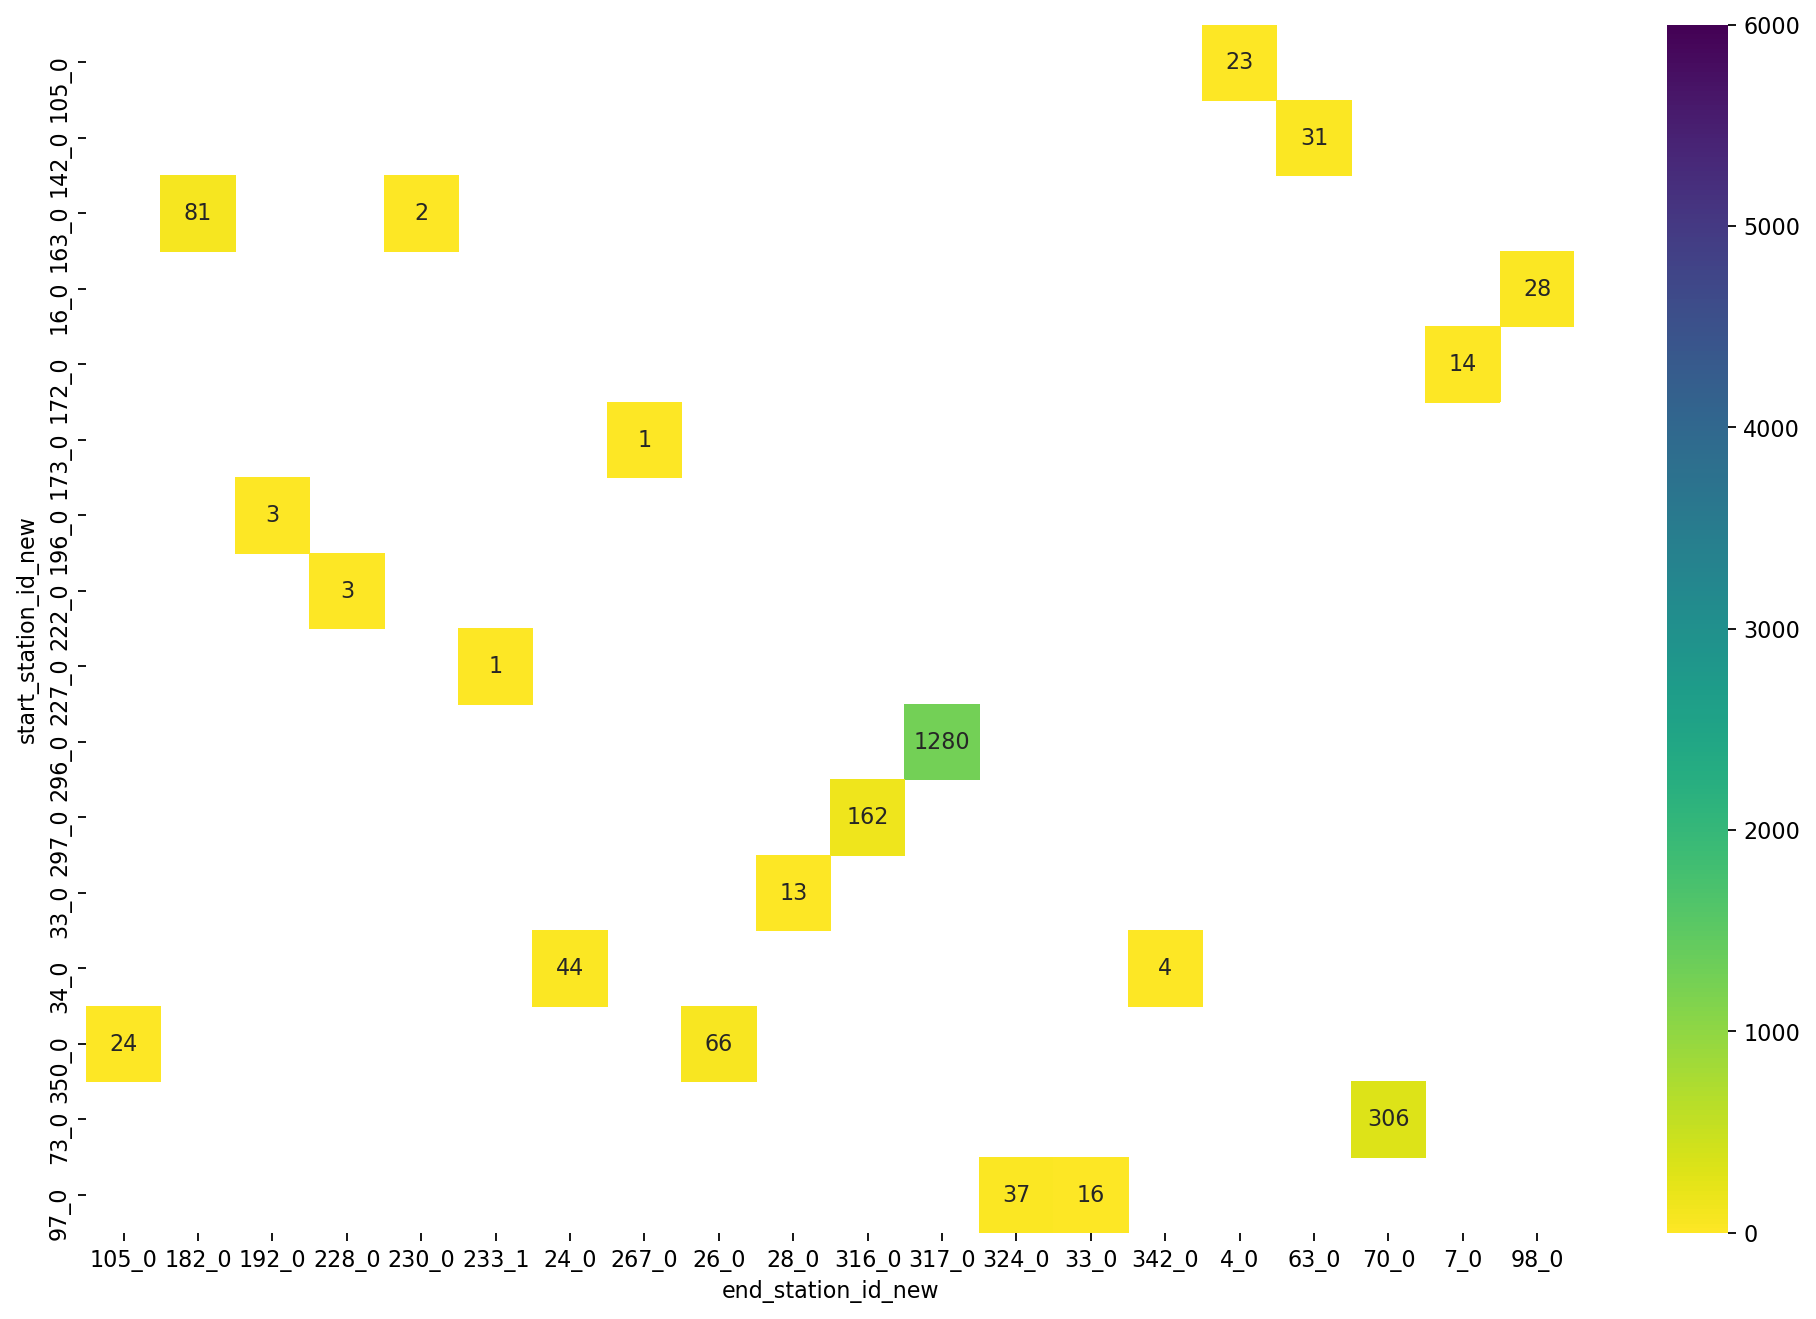

In [162]:
combi_list = df.combi.value_counts().sample(20).keys()

df_criteria = df[df["combi"].isin(combi_list)]

df_pivot = df_criteria.pivot_table(index="start_station_id_new", columns = "end_station_id_new", values = "start_time", aggfunc = "count", fill_value = 0)

fig, axes = plt.subplots(figsize = (15,10), dpi = 80)
sns.heatmap(df_pivot, annot = True, cmap = "viridis_r", fmt='g', vmin = 1, vmax = 6000, mask= df_pivot == 0)

In [163]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_station_id_new,end_station_id_new,age,dayofweek,month_year,day_month_year,combi
0,13709,2018-01-01 00:01:53.847,2018-01-01 03:50:23.433,86,Market St at Dolores St,37.769305,-122.426826,119,18th St at Noe St,37.761047,...,0,NaN,No,86_0,119_0,2018,0,2018-01,2018-01-01,86_0 - 119_0
1,145,2018-01-01 00:07:41.040,2018-01-01 00:10:06.241,316,San Salvador St at 1st St,37.330165,-121.885831,311,Paseo De San Antonio at 2nd St,37.333798,...,1957,Male,No,316_0,311_0,61,0,2018-01,2018-01-01,316_0 - 311_0
2,714,2018-01-01 00:07:52.943,2018-01-01 00:19:47.075,74,Laguna St at Hayes St,37.776435,-122.426244,70,Central Ave at Fell St,37.773311,...,1986,Male,No,74_0,70_0,32,0,2018-01,2018-01-01,74_0 - 70_0
3,1151,2018-01-01 00:09:31.745,2018-01-01 00:28:43.159,97,14th St at Mission St,37.768265,-122.420110,125,20th St at Bryant St,37.759200,...,1992,Male,No,97_0,125_0,26,0,2018-01,2018-01-01,97_0 - 125_0
4,1359,2018-01-01 00:14:37.187,2018-01-01 00:37:16.445,11,Davis St at Jackson St,37.797280,-122.398436,323,Broadway at Kearny,37.798014,...,1995,Male,No,11_0,323_0,23,0,2018-01,2018-01-01,11_0 - 323_0


In [ ]:
legend_obj = []

colors = [sns.color_palette("viridis")[0],
          sns.color_palette("viridis")[1],
          sns.color_palette("viridis")[2],
          sns.color_palette("viridis")[3],
          sns.color_palette("viridis")[4],
          sns.color_palette("viridis")[5],
          (163/255, 199/255, 70/255)]

days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

for i, s in enumerate(days):
    legend_obj.append(plt.scatter([],[],color = colors[i]));  



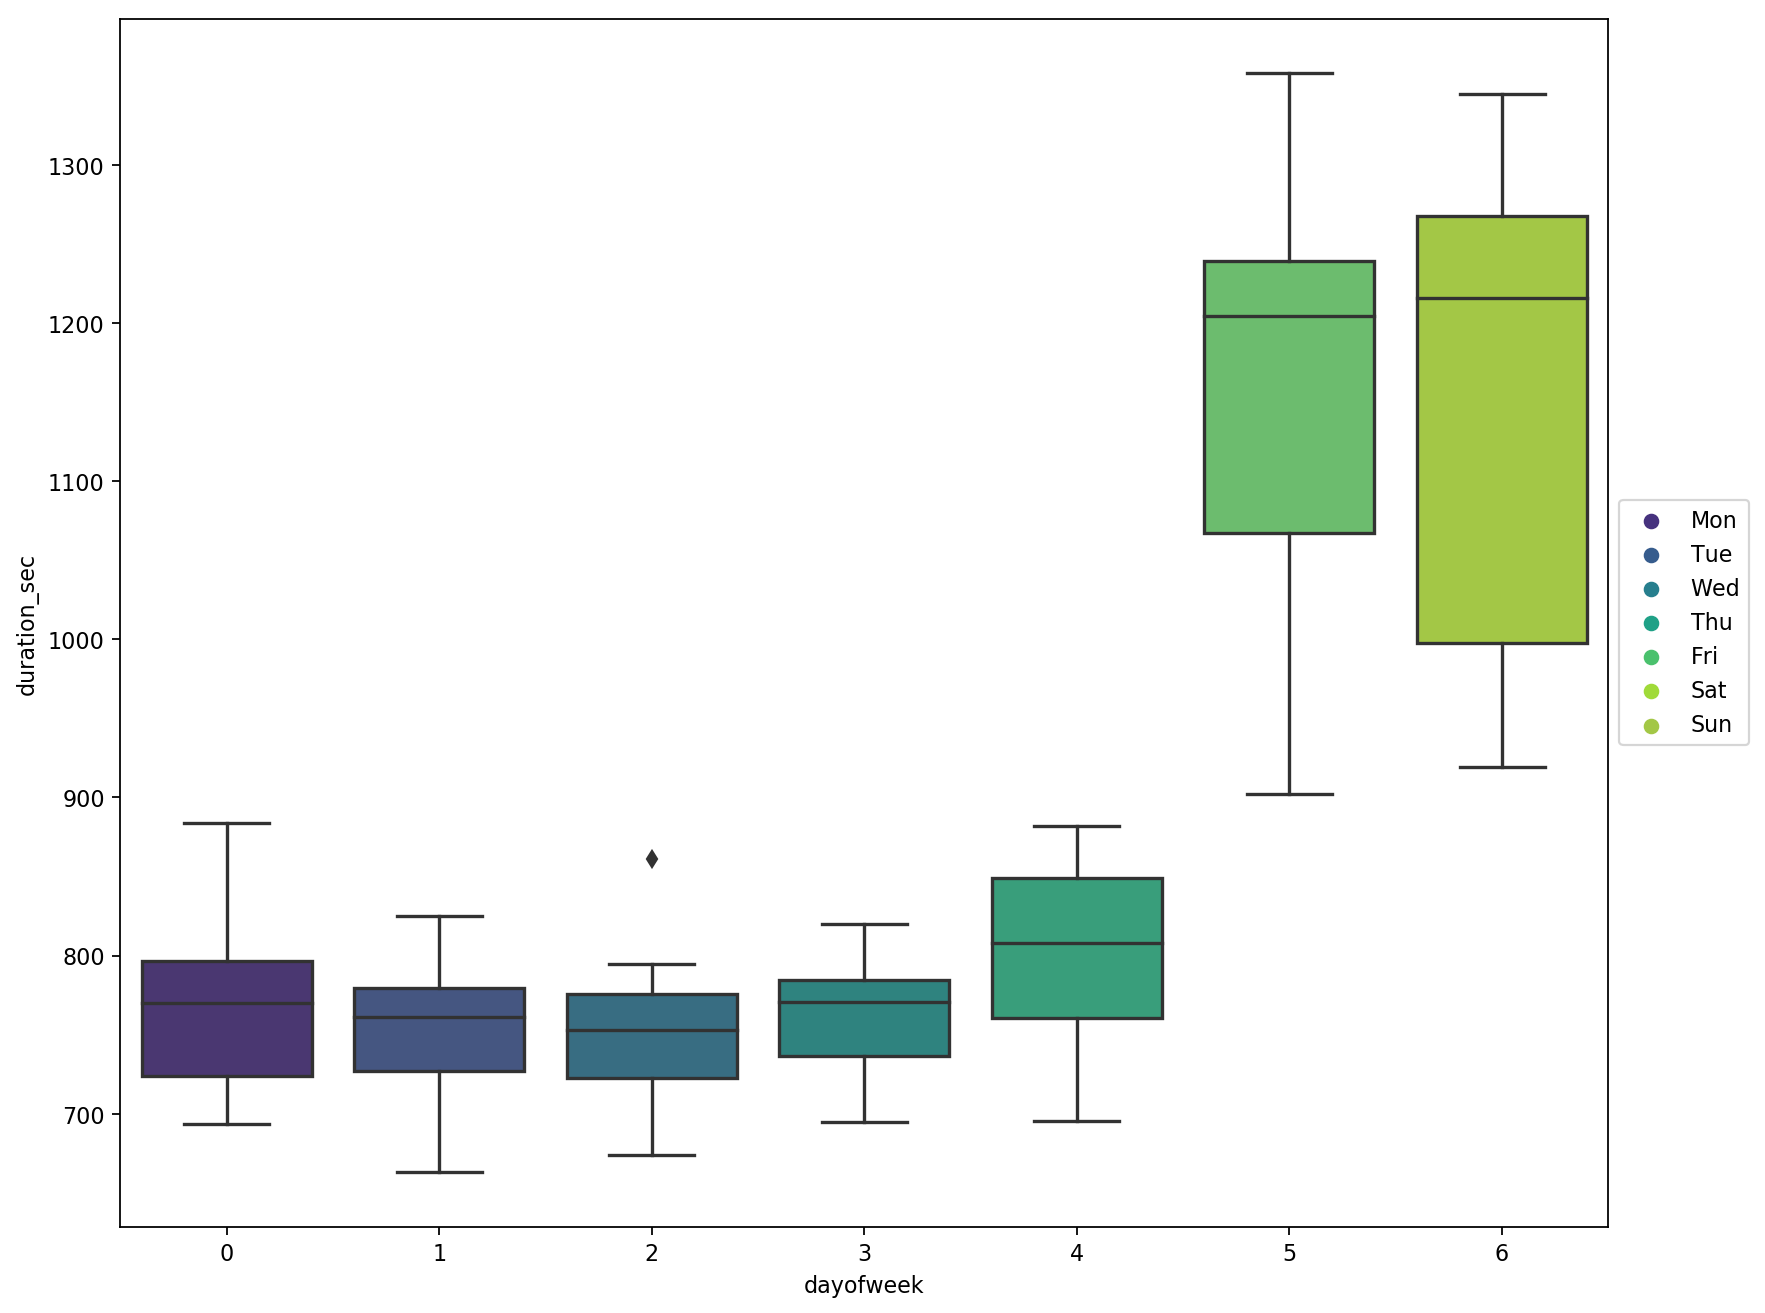

In [195]:
fig, ax = plt.subplots(figsize = (15,10), dpi = 80)
sns.boxplot(x = "dayofweek", y = "duration_sec", data = df.groupby(["dayofweek", "month_year"], as_index = False).mean(), palette = "viridis")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(legend_obj, days, loc='center left', bbox_to_anchor=(1, 0.5))

In [218]:
df_age = df.query("age != 2018 and age < 100").copy()

In [227]:
df_age["age_bins"] = pd.cut(df_age["age"], 12, precision = 0, include_lowest=True)

(250, 1250)

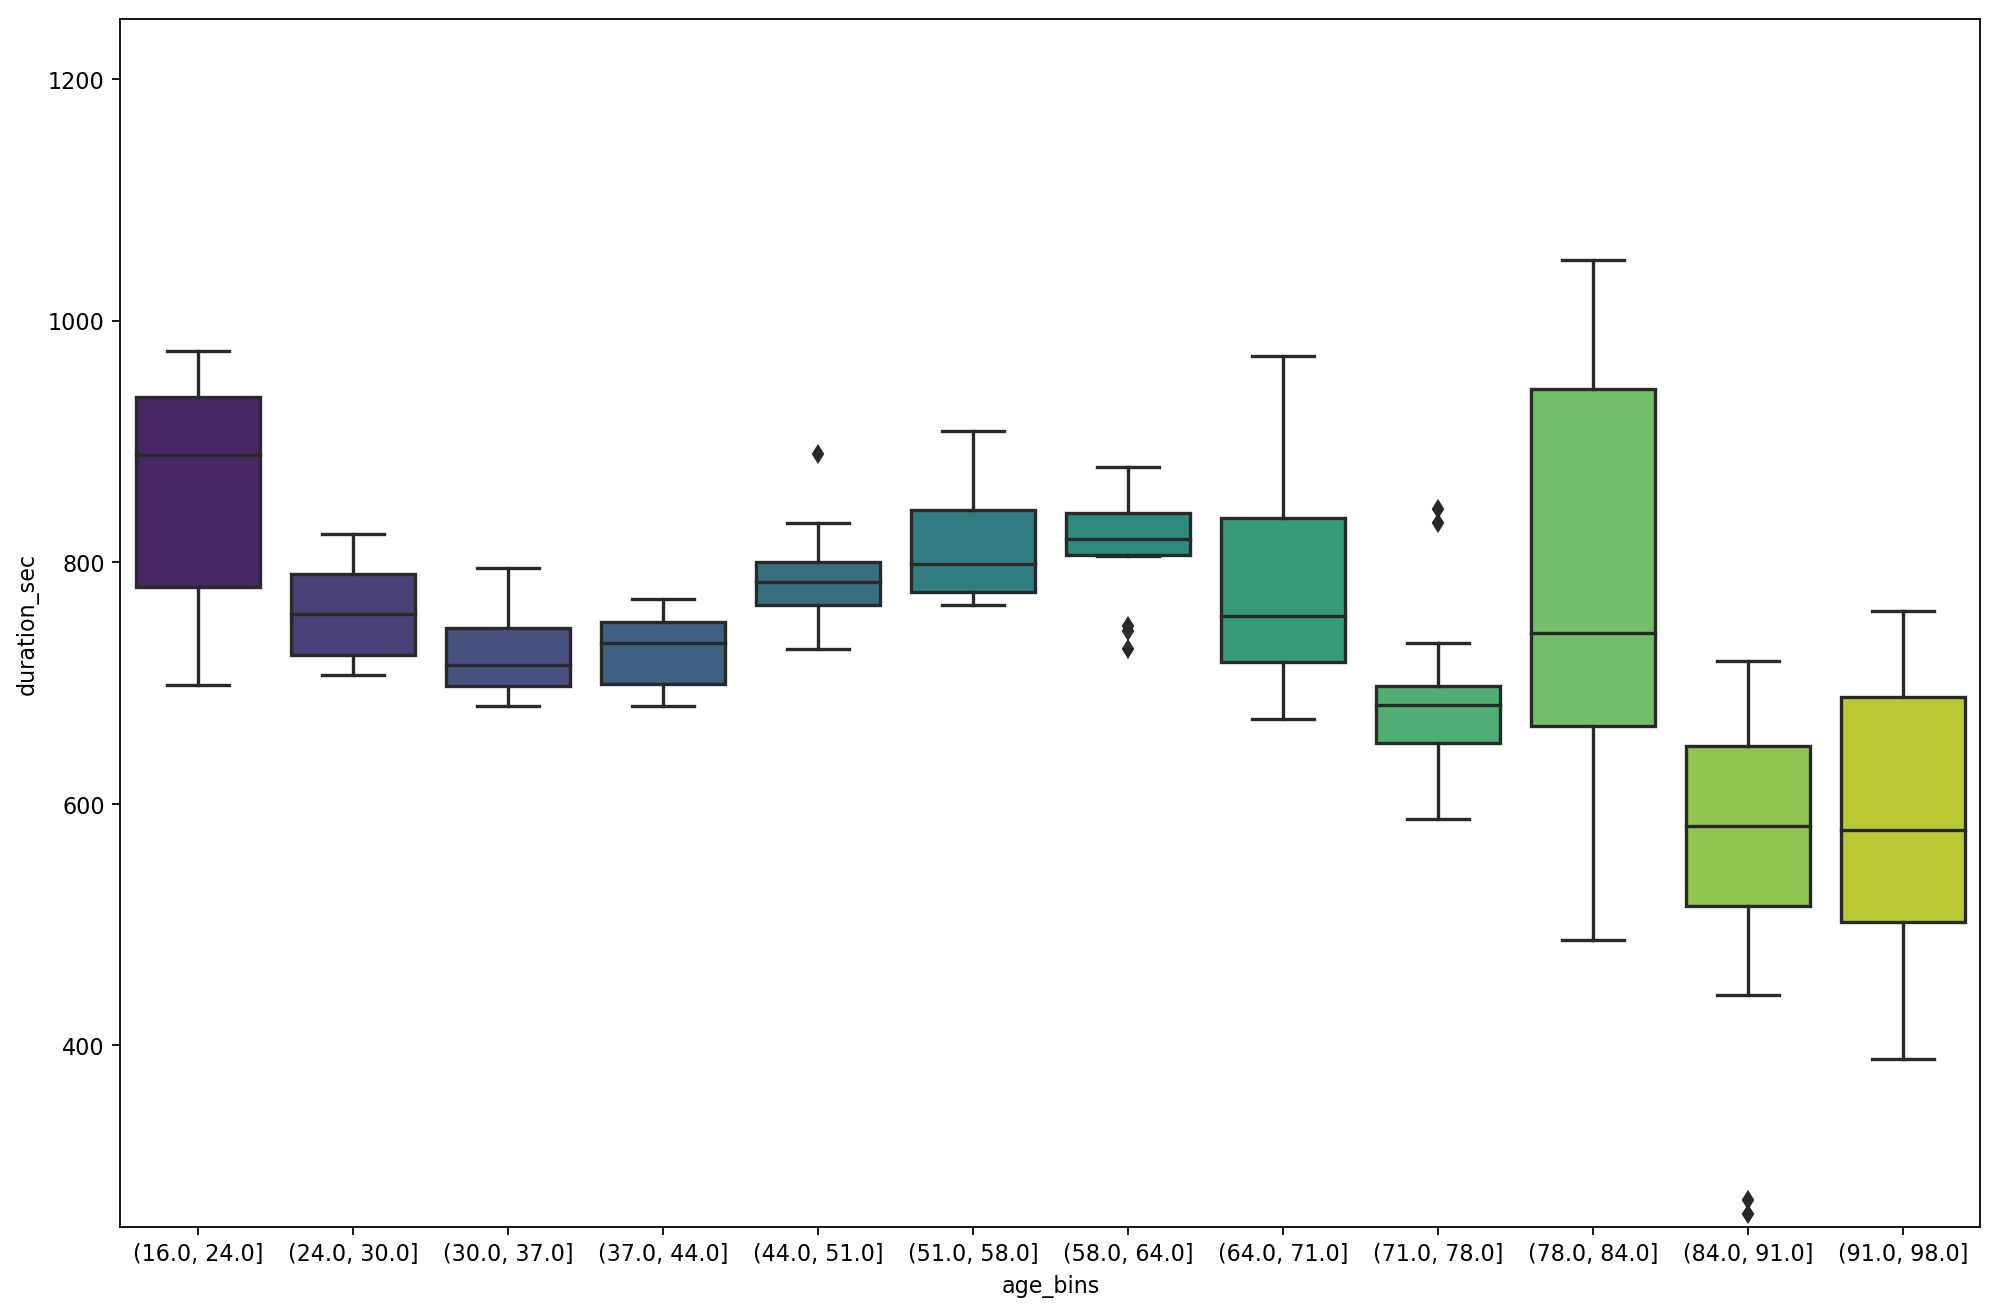

In [228]:
fig, ax = plt.subplots(figsize = (15,10), dpi = 80)
sns.boxplot(x = "age_bins", y = "duration_sec", data = df_age.groupby(["age_bins", "month_year"], as_index = False).mean(), palette = "viridis")
plt.ylim(250,1250)


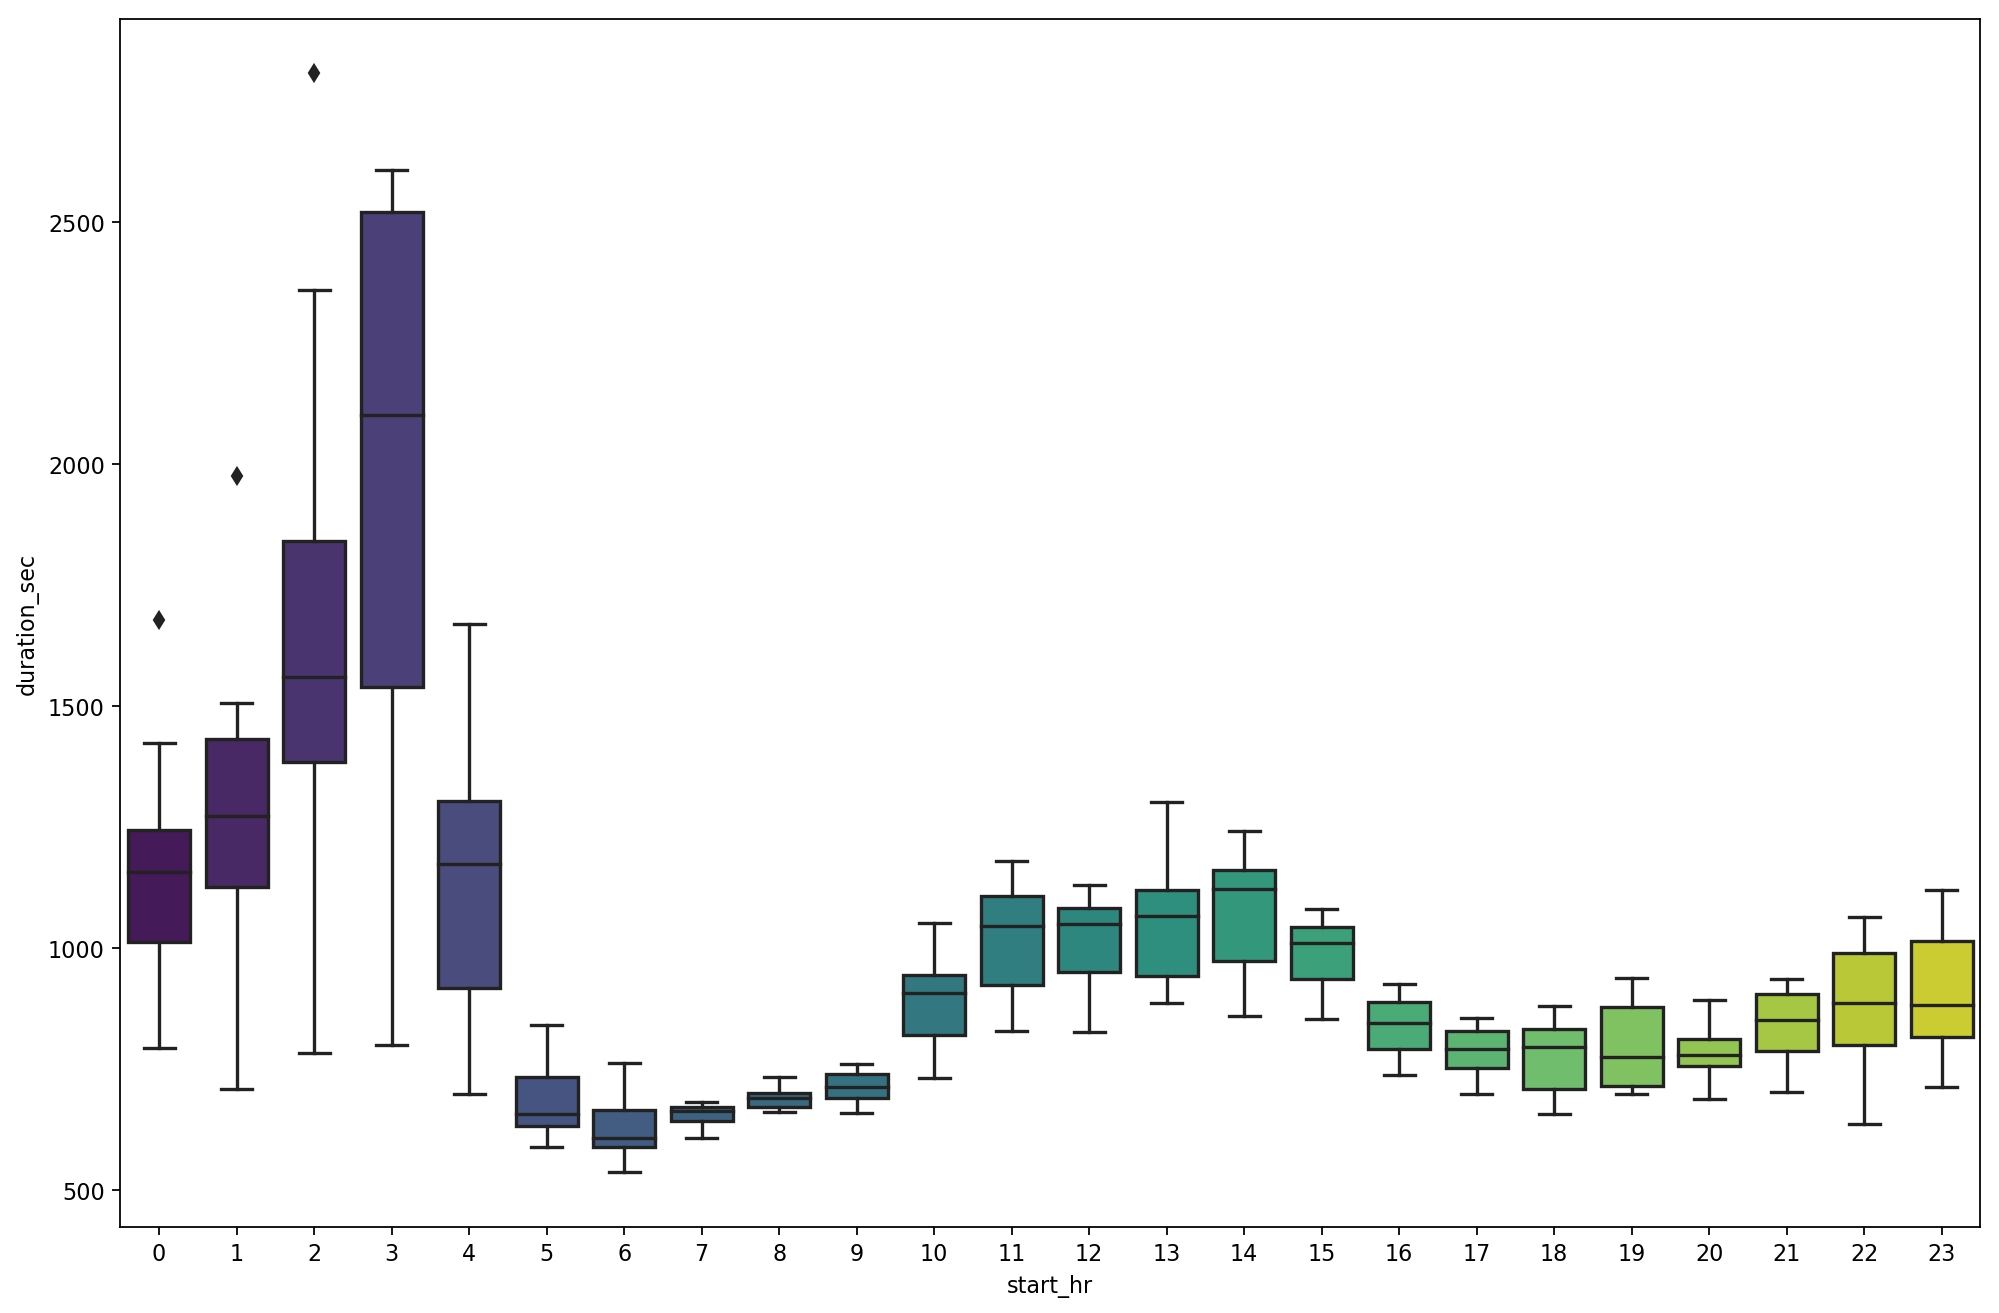

In [343]:
fig, ax = plt.subplots(figsize = (15,10), dpi = 80)
sns.boxplot(x = "start_hr", y = "duration_sec", data = df.groupby(["start_hr", "month_year"], as_index = False).mean(), palette = "viridis")

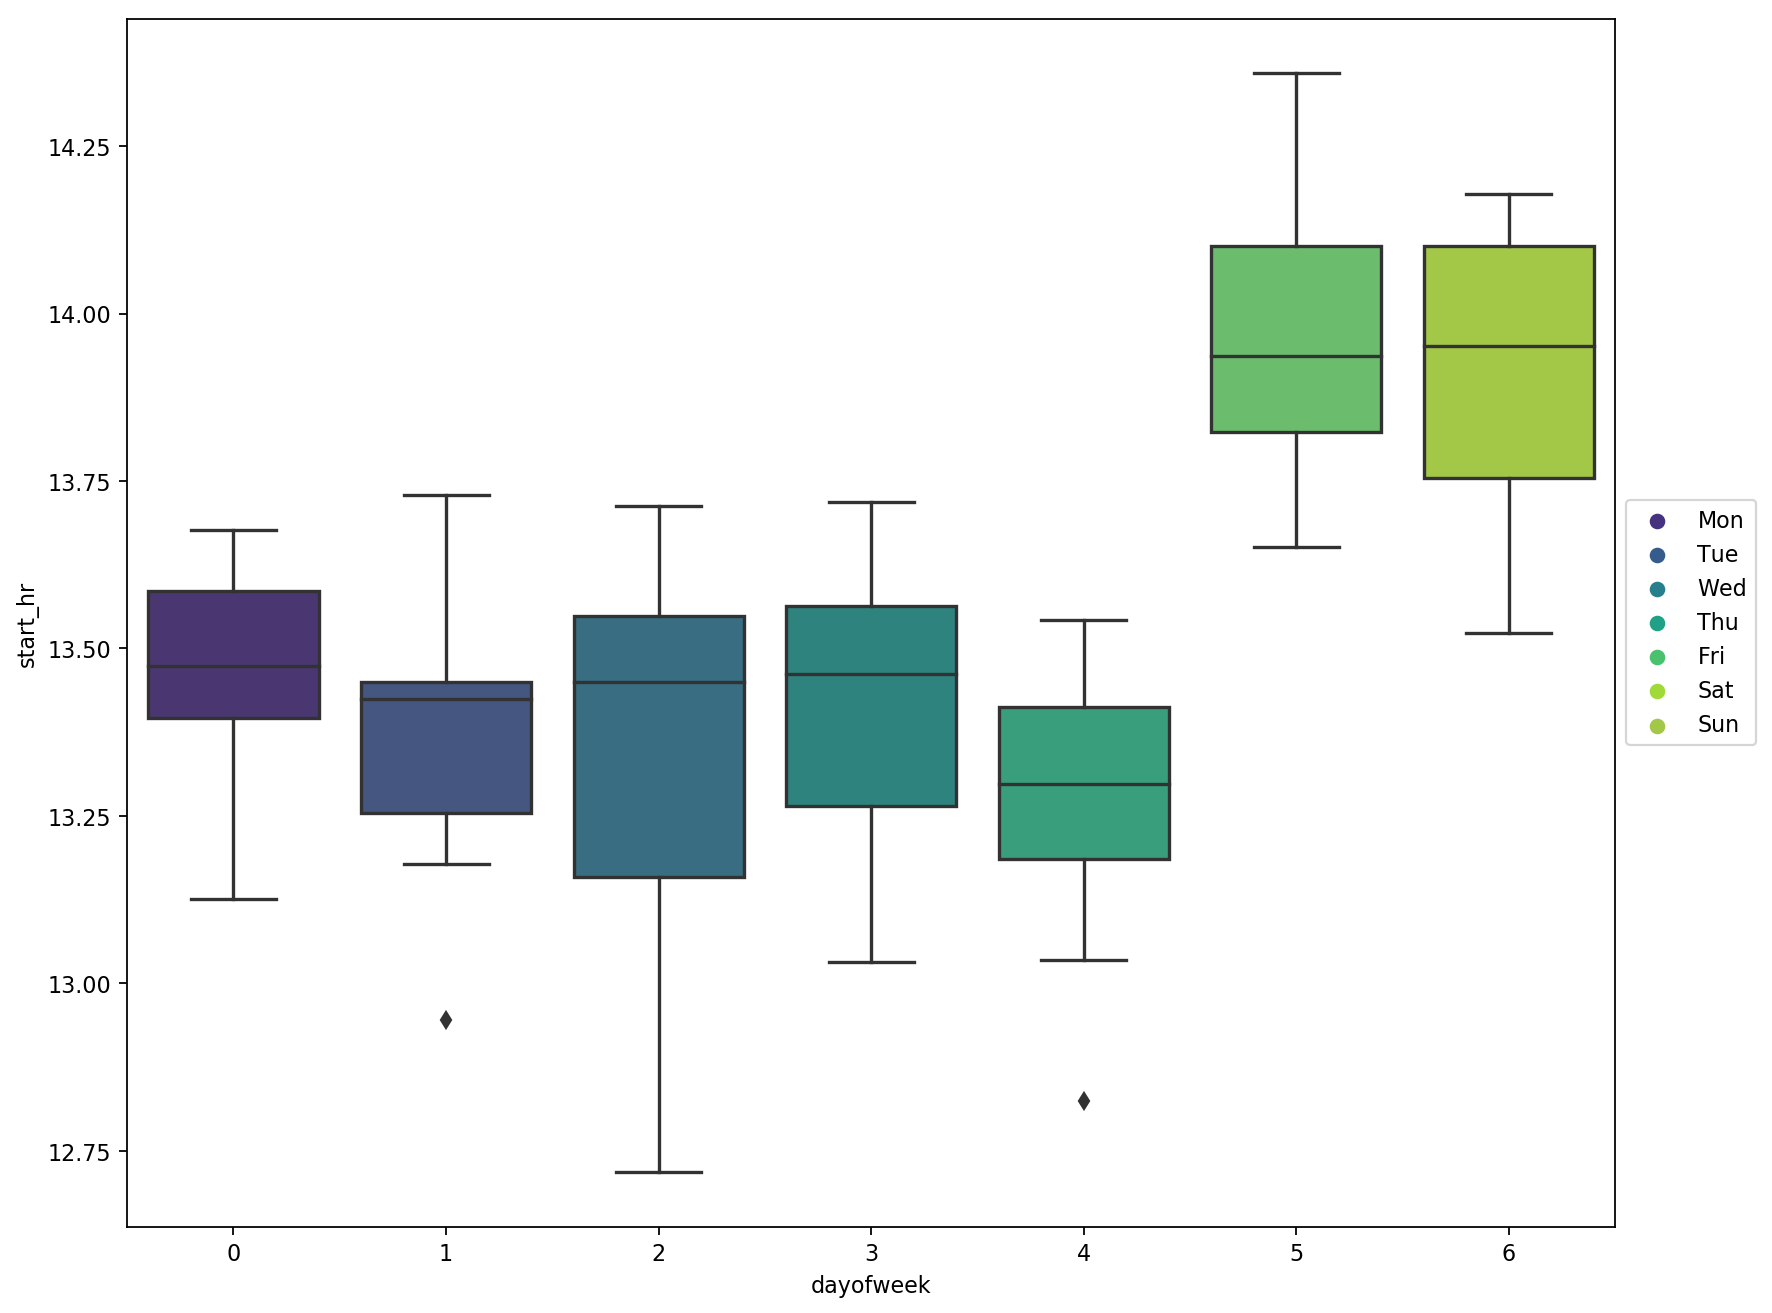

In [351]:
fig, ax = plt.subplots(figsize = (15,10), dpi = 80)
sns.boxplot(x = "dayofweek", y = "start_hr", data = df.groupby(["dayofweek", "month_year"], as_index = False).mean(), palette = "viridis")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(legend_obj, days, loc='center left', bbox_to_anchor=(1, 0.5)) #misleading

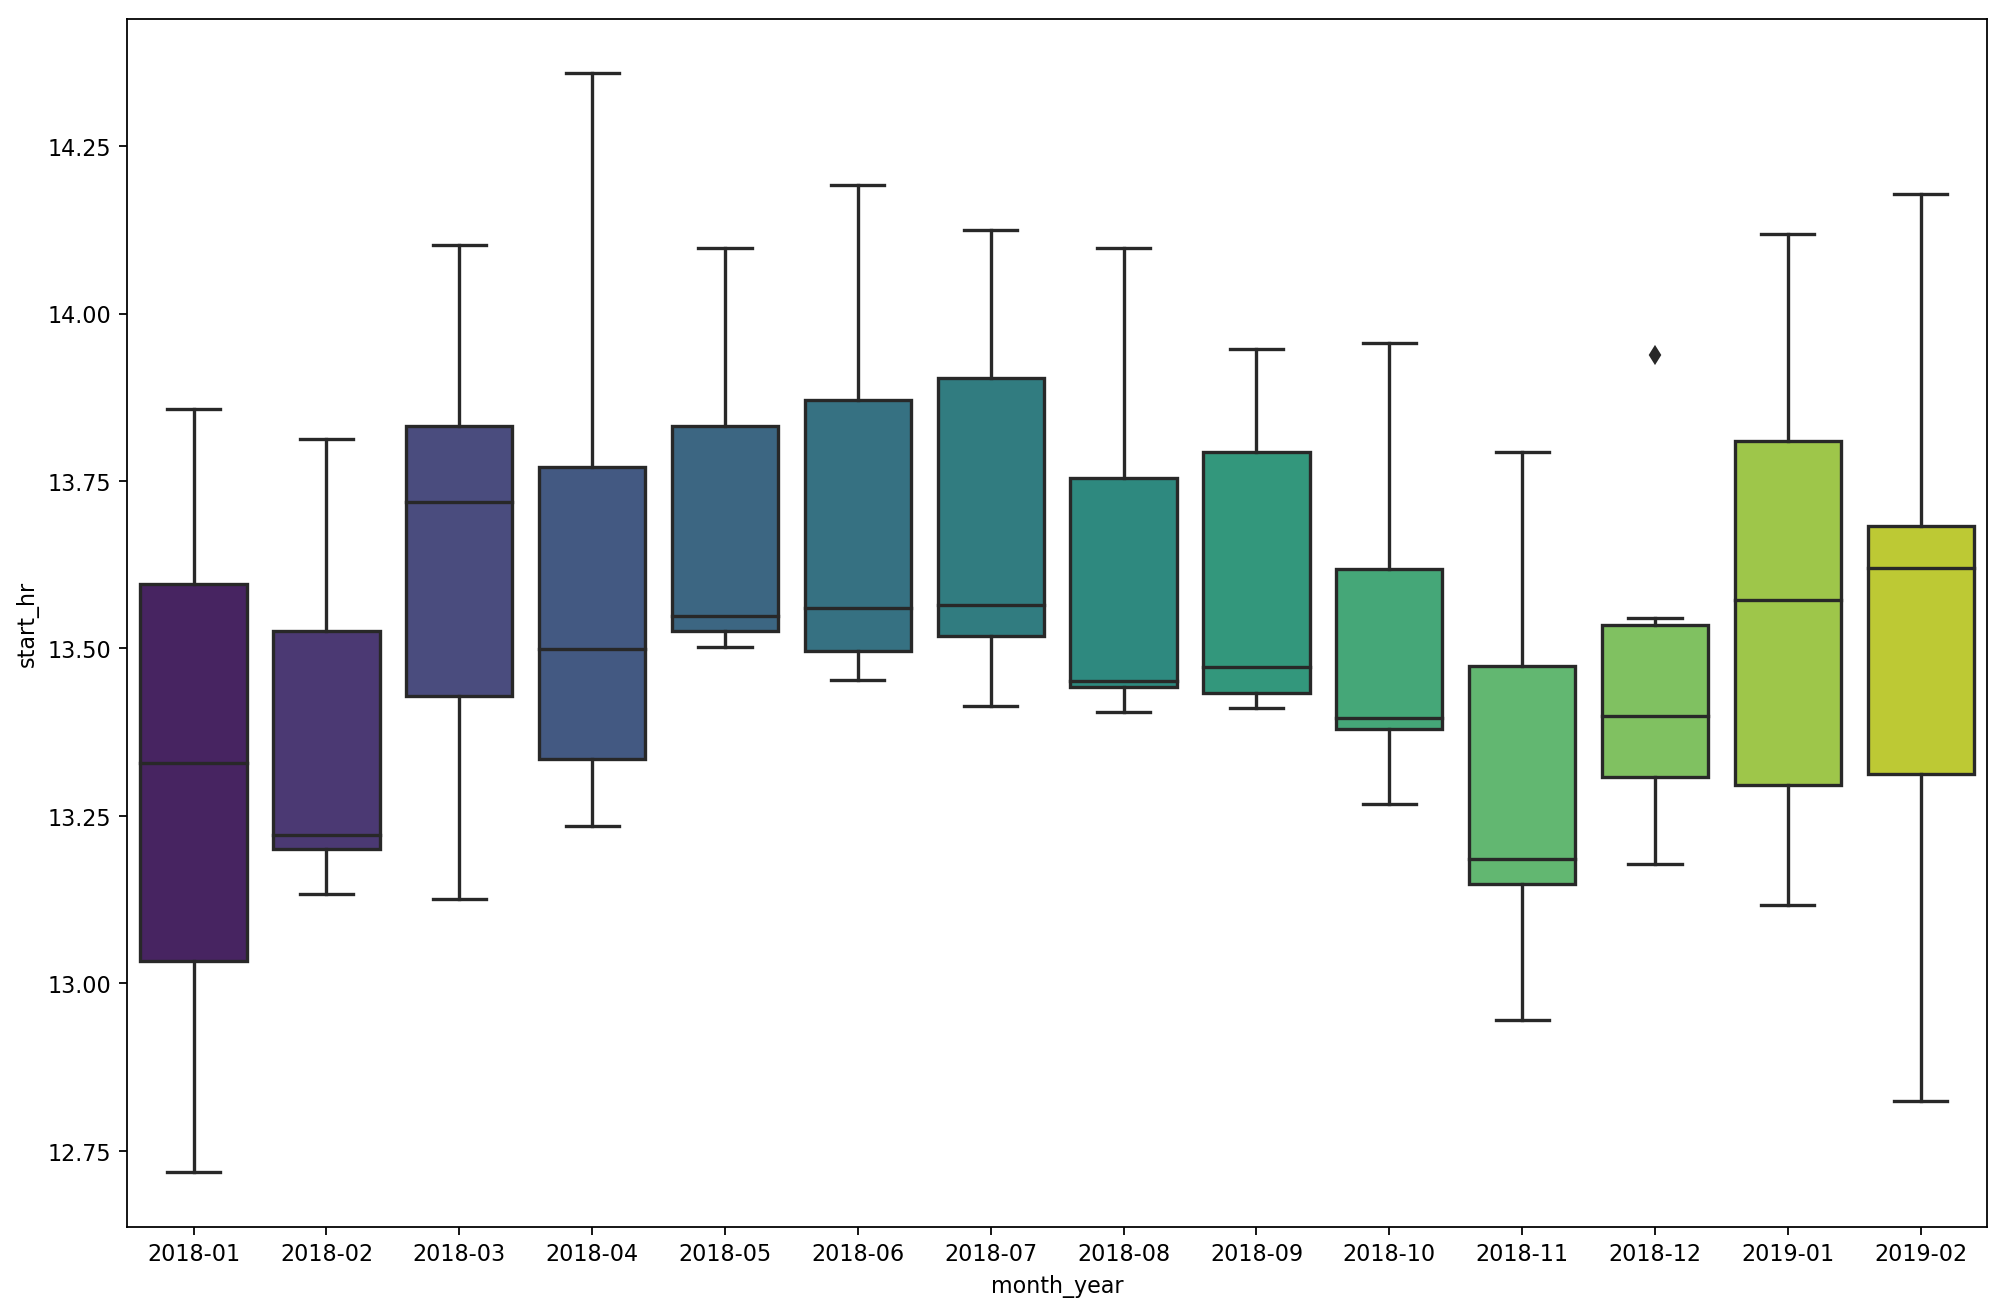

In [20]:
fig, ax = plt.subplots(figsize = (15,10), dpi = 80)
sns.boxplot(x = "month_year", y = "start_hr", data = df.groupby(["month_year","dayofweek"], as_index = False).mean(), palette = "viridis")


<a id='multi'></a>
### Multivariate Exploration
> Relationships

In [99]:
df_stations = df[["start_station_id_new", "start_station_name", "start_station_latitude", "start_station_longitude"]].drop_duplicates().copy()

In [6]:
df_stations.head(3)

,start_station_id_new,start_station_name,start_station_latitude,start_station_longitude
0,86_0,Market St at Dolores St,37.769305,-122.426826
1,316_0,San Salvador St at 1st St,37.330165,-121.885831
2,74_0,Laguna St at Hayes St,37.776435,-122.426244


In [7]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 2217967
Data columns (total 4 columns):
start_station_id_new       378 non-null object
start_station_name         378 non-null object
start_station_latitude     378 non-null float64
start_station_longitude    378 non-null float64
dtypes: float64(2), object(2)
memory usage: 14.8+ KB


In [8]:
df_trips = df[[ "start_station_latitude", "start_station_longitude",  "end_station_latitude", "end_station_longitude","start_station_id_new", "end_station_id_new"]].copy()

In [9]:
df_trips["cnt"] = 1

In [10]:
df_trips_grp = df_trips.groupby([x for x in df_trips.columns[:-1]], as_index = False).sum().sort_values("cnt", ascending = False)

In [11]:
df_trips_grp.head()

,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,start_station_id_new,end_station_id_new,cnt
26195,37.795392,-122.394203,37.804770,-122.403234,15_0,6_0,8352
28572,37.804770,-122.403234,37.794130,-122.394430,6_0,16_0,5403
16283,37.775880,-122.393170,37.795392,-122.394203,81_0,15_0,5238
29456,37.808894,-122.256460,37.809013,-122.268247,196_0,182_0,4607
29574,37.809013,-122.268247,37.808894,-122.256460,182_0,196_0,4355


In [103]:
df_trips_grp.to_csv("grps.csv", index = False)

<a id='conclusion'></a>
## Summary and Conclusions

**Discussed questions:**
><ol>
>    <li><p><b>Question</b></p></li>
> Answer 
>    <li><p><b>Question</b></p></li>
> Answer
></ol>

**Limitations due to the cleaning process in the used datasets:**

><ol>
    ><li><p>Describing limitations to the original dataset</li>
></ol>

**Summary**
><ol>
>  Summary and Conclusions
</ol>